In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Install once (outside Kaggle cell if needed)
# pip install scienceplots

import matplotlib.pyplot as plt
import matplotlib as mpl

try:
    import scienceplots

    plt.style.use(["science", "no-latex"])
except ImportError:
    print("scienceplots not installed, falling back to manual style.")

# Font configuration
mpl.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Times New Roman", "Times", "STIXGeneral"],
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 11,
        "figure.dpi": 300,
    }
)

In [3]:
plt.style.use(["science"])
mpl.rcParams["text.usetex"] = True

# Manual - fallback
plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Times New Roman", "Times"],
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 11,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": False,
        "figure.dpi": 300,
        "savefig.dpi": 300,
    }
)

In [4]:
# Colorblind safe
COLORBLIND = [
    "#000000",  # black
    "#E69F00",  # orange
    "#56B4E9",  # sky blue
    "#009E73",  # bluish green
    "#F0E442",  # yellow
    "#0072B2",  # blue
    "#D55E00",  # vermillion
    "#CC79A7",  # reddish purple
]

In [5]:
OUT_DIR = 'figures-refactored/'
os.makedirs(OUT_DIR, exist_ok=True)

In [6]:
# Resuable axis cleanup helper
def clean_axis(ax, grid_axis=None):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    if grid_axis:
        ax.grid(axis=grid_axis, linestyle="--", alpha=0.4)
    else:
        ax.grid(False)

In [7]:
# # Line Plot
# def plot_graduates_enrolled(YEARS, graduates, enrolled, title, filename):
#     fig, ax = plt.subplots(figsize=(7.5, 4.8))

#     ax.plot(
#         YEARS,
#         graduates,
#         marker="o",
#         linewidth=2,
#         color=COLORBLIND[1],
#         label="Graduates",
#     )
#     ax.plot(
#         YEARS, enrolled, marker="o", linewidth=2, color=COLORBLIND[5], label="Enrolled"
#     )

#     ax.set_xlabel("Academic Year")
#     ax.set_ylabel("Number of Students")
#     ax.set_title(title)

#     clean_axis(ax, grid_axis="y")
#     ax.legend(frameon=False)

#     fig.tight_layout()
#     fig.savefig(os.path.join(OUT_DIR, f"{filename}.pdf"), bbox_inches="tight")
#     fig.savefig(os.path.join(OUT_DIR, f"{filename}.png"), bbox_inches="tight")
#     plt.show()

In [8]:
# # Horizontal bar
# def plot_horizontal_bar(labels, values, xlabel, title, filename):
#     fig, ax = plt.subplots(figsize=(7.5, 5))

#     y_pos = np.arange(len(labels))
#     ax.barh(y_pos, values, color=COLORBLIND[3], edgecolor="black", linewidth=0.5)

#     ax.set_yticks(y_pos)
#     ax.set_yticklabels(labels)
#     ax.invert_yaxis()

#     ax.set_xlabel(xlabel)
#     ax.set_title(title)

#     for i, v in enumerate(values):
#         ax.text(v + max(values) * 0.01, i, f"{v:.1f}%", va="center", fontsize=11)

#     clean_axis(ax, grid_axis="x")

#     fig.tight_layout()
#     fig.savefig(os.path.join(OUT_DIR, f"{filename}.pdf"), bbox_inches="tight")
#     fig.savefig(os.path.join(OUT_DIR,f"{filename}.png"), bbox_inches="tight")
#     plt.show()

In [9]:
# # Scatter plot
# def plot_scatter(x, y, labels, xlabel, ylabel, title, filename):
#     fig, ax = plt.subplots(figsize=(6.5, 5))

#     for i, label in enumerate(labels):
#         ax.scatter(
#             x[i],
#             y[i],
#             s=90,
#             color=COLORBLIND[i % len(COLORBLIND)],
#             edgecolor="black",
#             linewidth=0.6,
#             label=label,
#         )

#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.set_title(title)

#     clean_axis(ax)
#     ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")

#     fig.tight_layout()
#     fig.savefig(os.path.join(OUT_DIR, f"{filename}.pdf"), bbox_inches="tight")
#     fig.savefig(os.path.join(OUT_DIR, f"{filename}.png"), bbox_inches="tight")
#     plt.show()

In [10]:
# df = pd.read_csv("/kaggle/input/hahe-statistics-all-programmes/hahe_all_21_24.csv")
df = pd.read_csv("./hahe_all_21_24.csv")
YEARS = ["2020-2021", "2021-2022", "2022-2023", "2023-2024"]
METRICS = ["enrolled", "graduate", "active", "registered"]

In [11]:
from typing import List
import matplotlib.pyplot as plt


def plot_stats_by_major(
    program_themes: List[str],
    df,
    years,
):
    # ------------------------------------------------------------------
    # 1. Filter programmes
    # ------------------------------------------------------------------
    theme_regex = "|".join(program_themes)
    major_name = program_themes[0].title()

    df_filtered = df[df["program"].str.contains(theme_regex, na=False, regex=True)]

    programs_num = df_filtered.groupby("institution")["program"].nunique().sum()

    print(f"The number of {major_name} themed departments is {programs_num}")

    # ------------------------------------------------------------------
    # 2. Aggregate statistics (vectorized)
    # ------------------------------------------------------------------
    summary = (
        df_filtered.groupby("academic_year", as_index=False)[
            ["graduate", "enrolled", "active", "registered"]
        ]
        .sum()
        .set_index("academic_year")
        .reindex(years)
    )

    # ------------------------------------------------------------------
    # 3. Plot 1: Graduates vs Enrolled
    # ------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(7.5, 4.8))

    ax.plot(
        years,
        summary["graduate"],
        marker="o",
        linewidth=2,
        color=COLORBLIND[1],
        label="Graduates",
    )
    ax.plot(
        years,
        summary["enrolled"],
        marker="o",
        linewidth=2,
        color=COLORBLIND[5],
        label="Enrolled",
    )

    ax.set_xlabel("Academic Year")
    ax.set_ylabel("Number of Students")
    ax.set_title(f"{major_name} — Graduates and Enrolled")

    clean_axis(ax, grid_axis="y")
    ax.legend(frameon=False)

    fig.tight_layout()
    fig.savefig(
        os.path.join(OUT_DIR, f"{major_name.lower()}_active_registered.pdf"),
        bbox_inches="tight",
    )
    fig.savefig(
        os.path.join(OUT_DIR, f"{major_name.lower()}_active_registered.png"),
        bbox_inches="tight",
    )
    plt.show()

    # ------------------------------------------------------------------
    # 4. Plot 2: Active vs Registered
    # ------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(7.5, 4.8))

    ax.plot(
        years,
        summary["active"],
        marker="o",
        linewidth=2,
        color=COLORBLIND[3],
        label="Active",
    )
    ax.plot(
        years,
        summary["registered"],
        marker="o",
        linewidth=2,
        color=COLORBLIND[0],
        label="Registered",
    )

    ax.set_xlabel("Academic Year")
    ax.set_ylabel("Number of Students")
    ax.set_title(f"{major_name} — Active and Registered")

    clean_axis(ax, grid_axis="y")
    ax.legend(frameon=False)

    fig.tight_layout()
    fig.savefig(
        os.path.join(OUT_DIR, f"{major_name.lower()}_active_registered.pdf"),
        bbox_inches="tight",
    )
    fig.savefig(
        os.path.join(OUT_DIR, f"{major_name.lower()}_active_registered.png"),
        bbox_inches="tight",
    )
    plt.show()

In [12]:
import matplotlib.pyplot as plt

plt.rcParams.update({"text.usetex": True})

The number of Law themed departments is 3


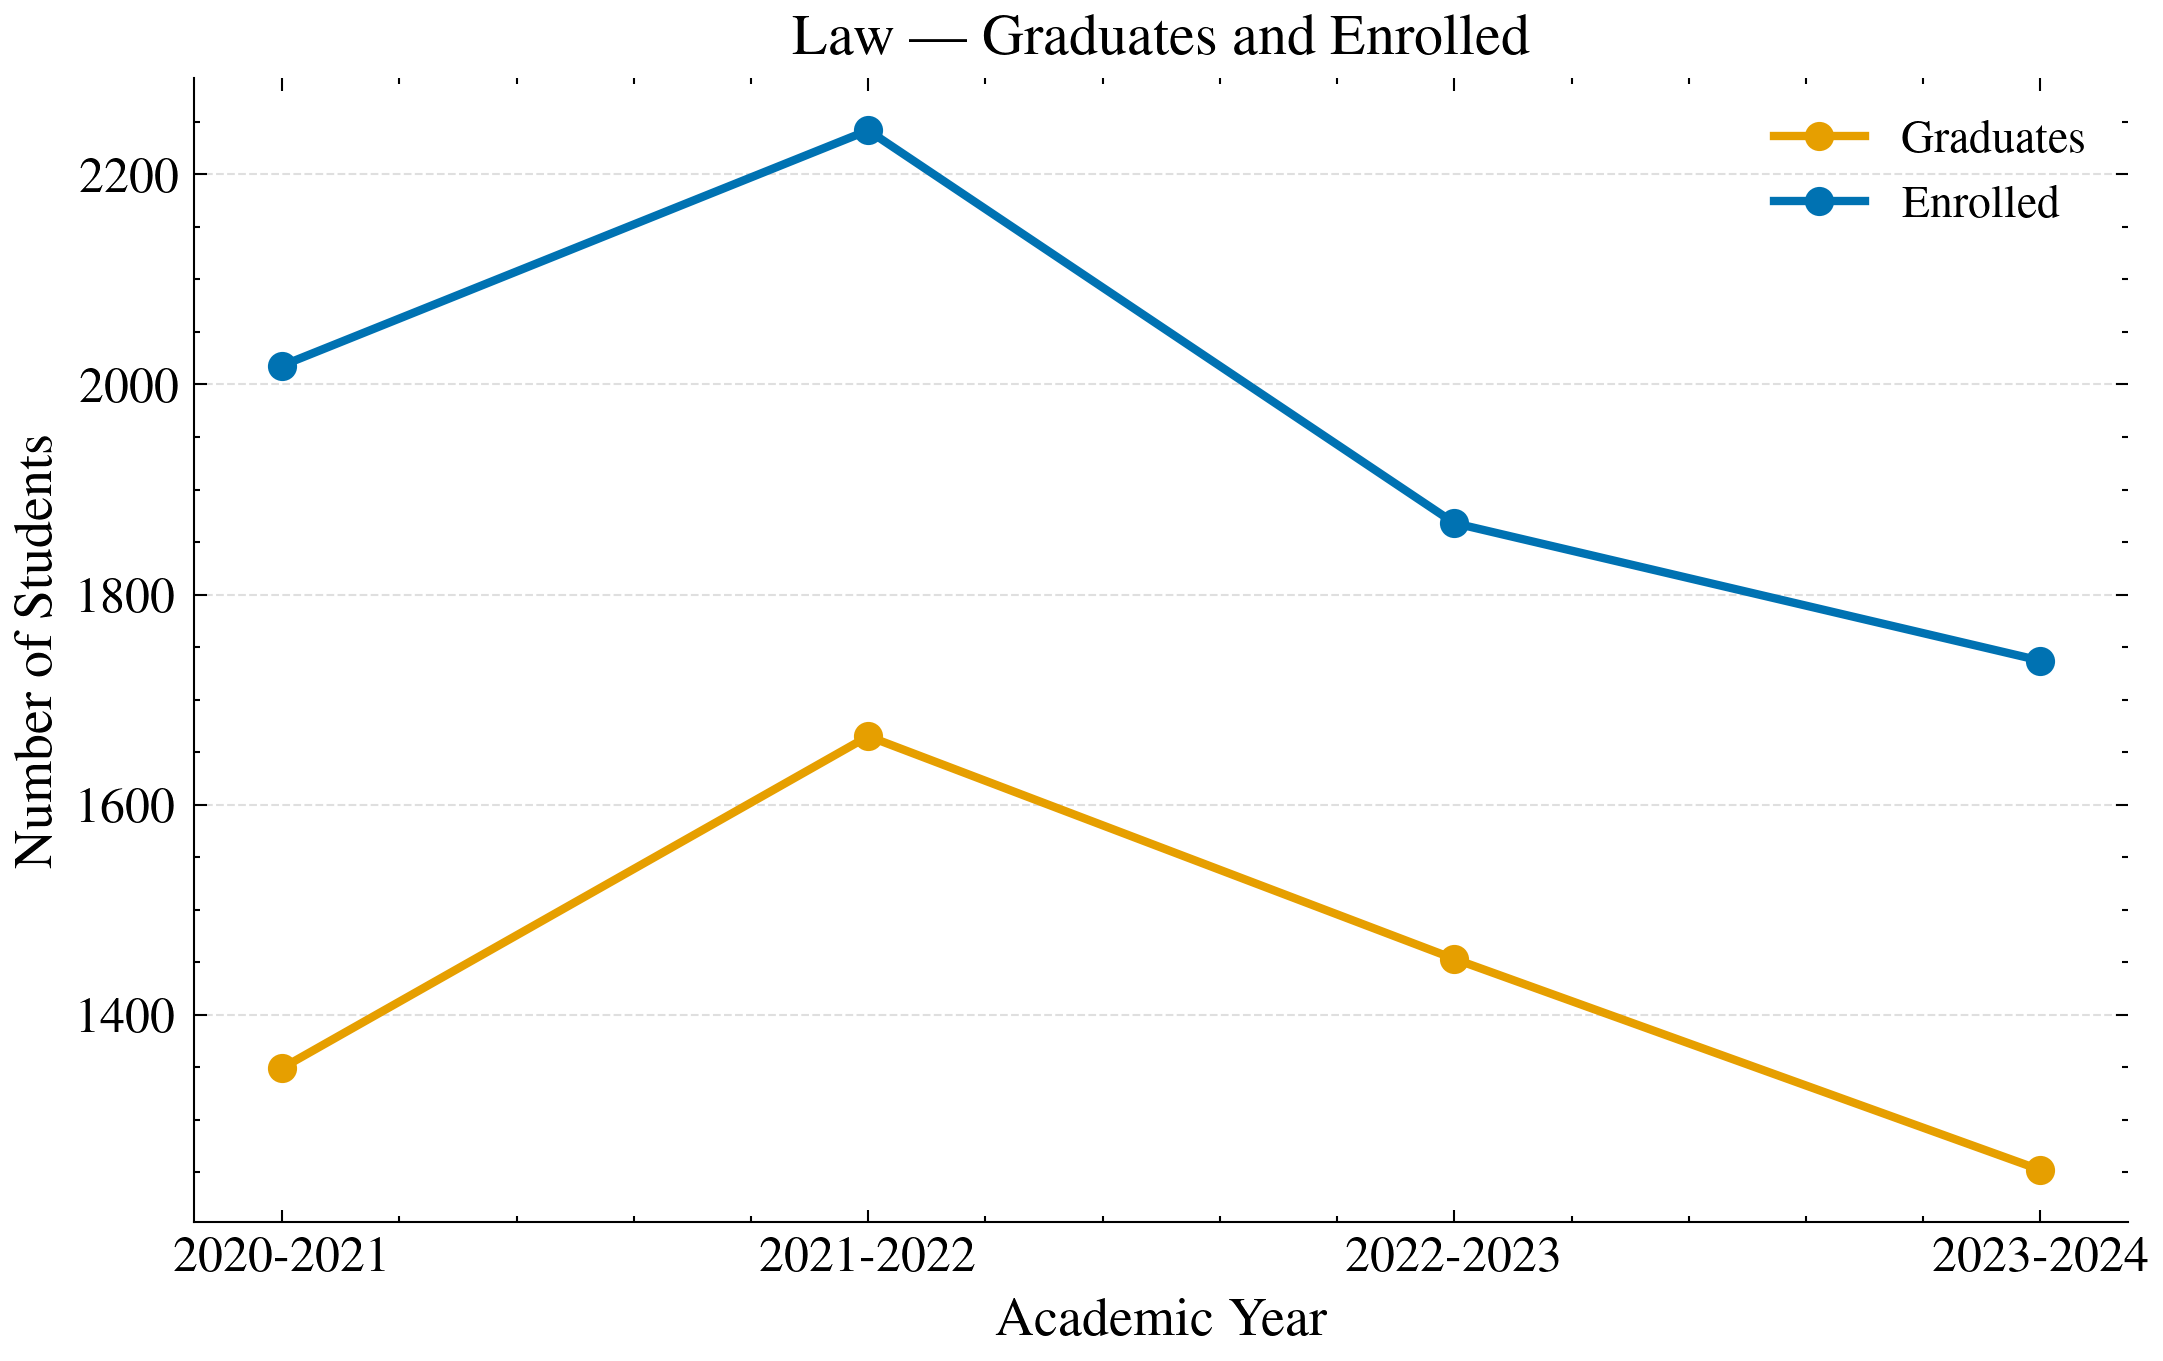

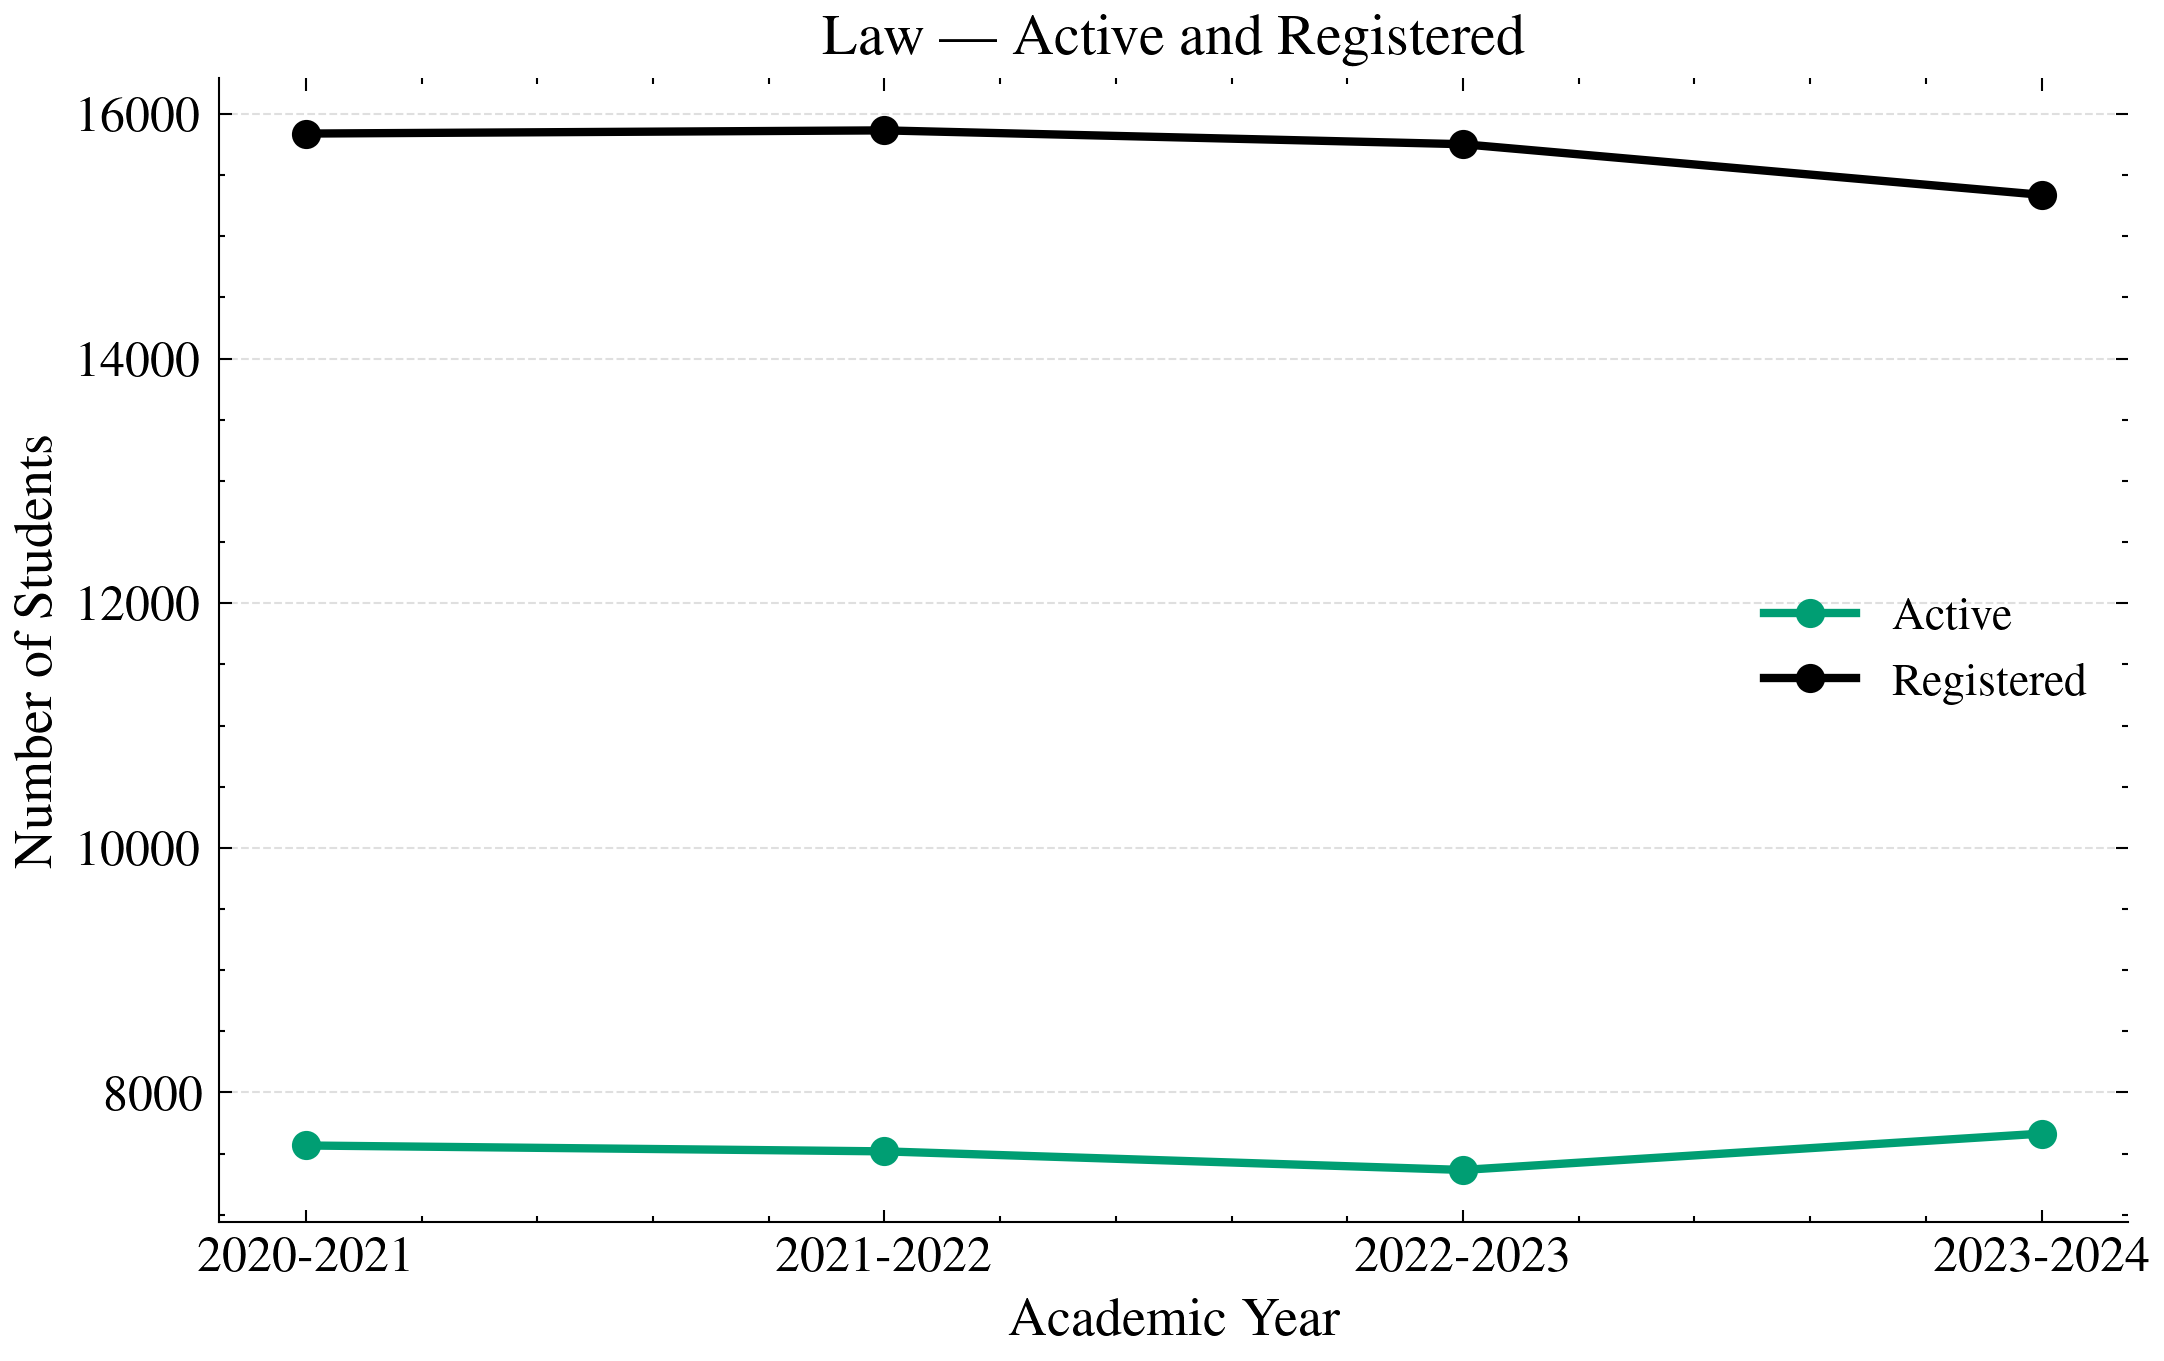

The number of Informatics themed departments is 30


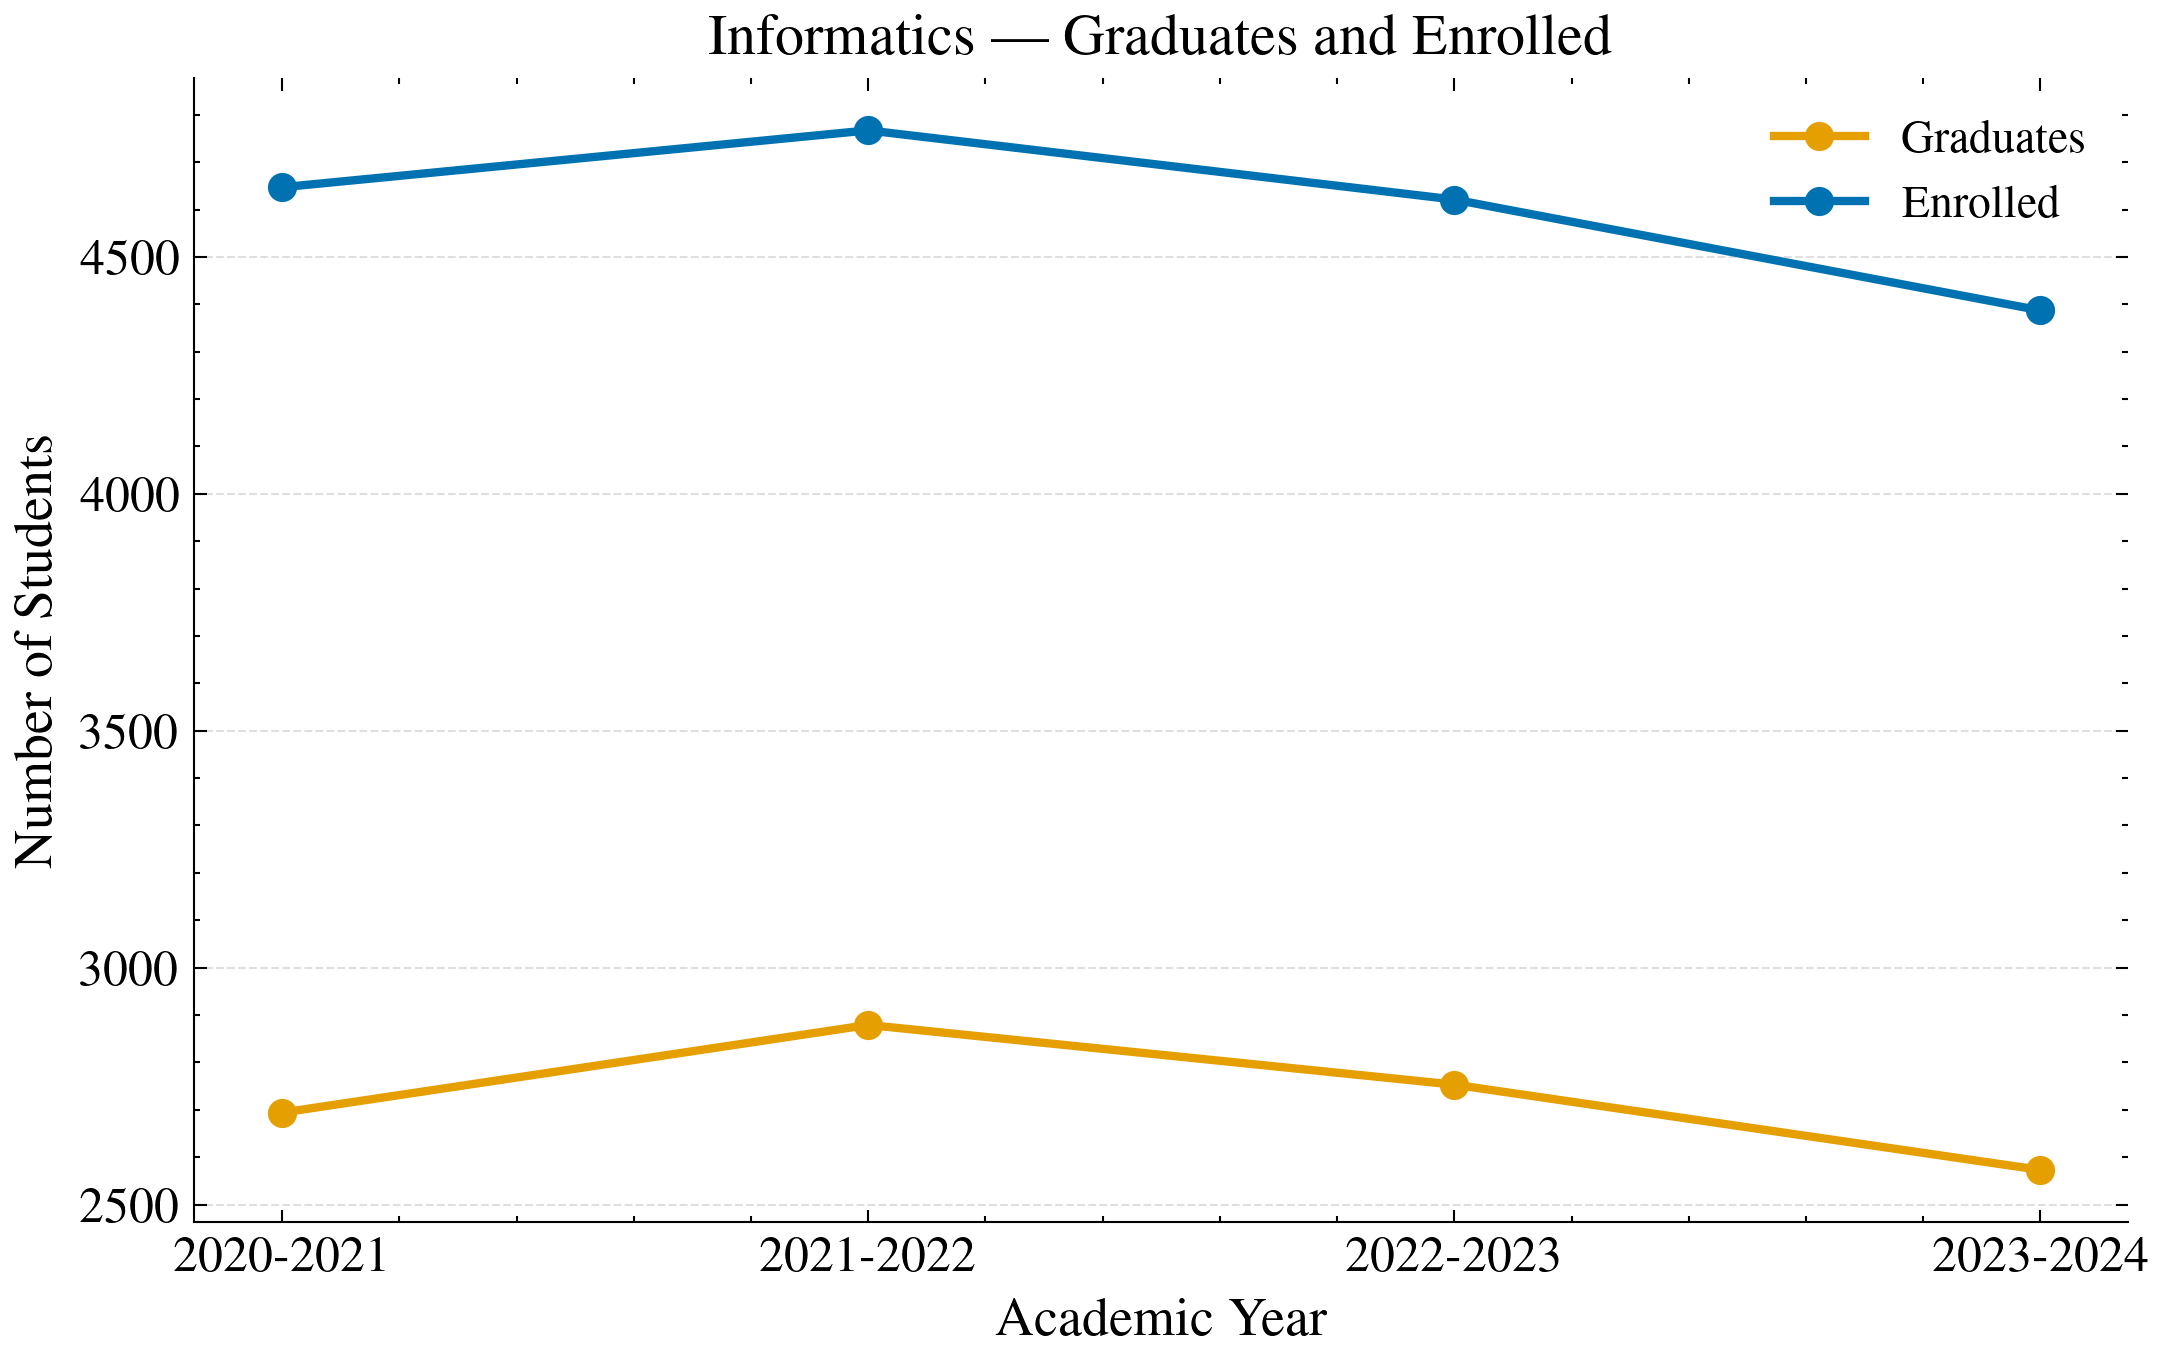

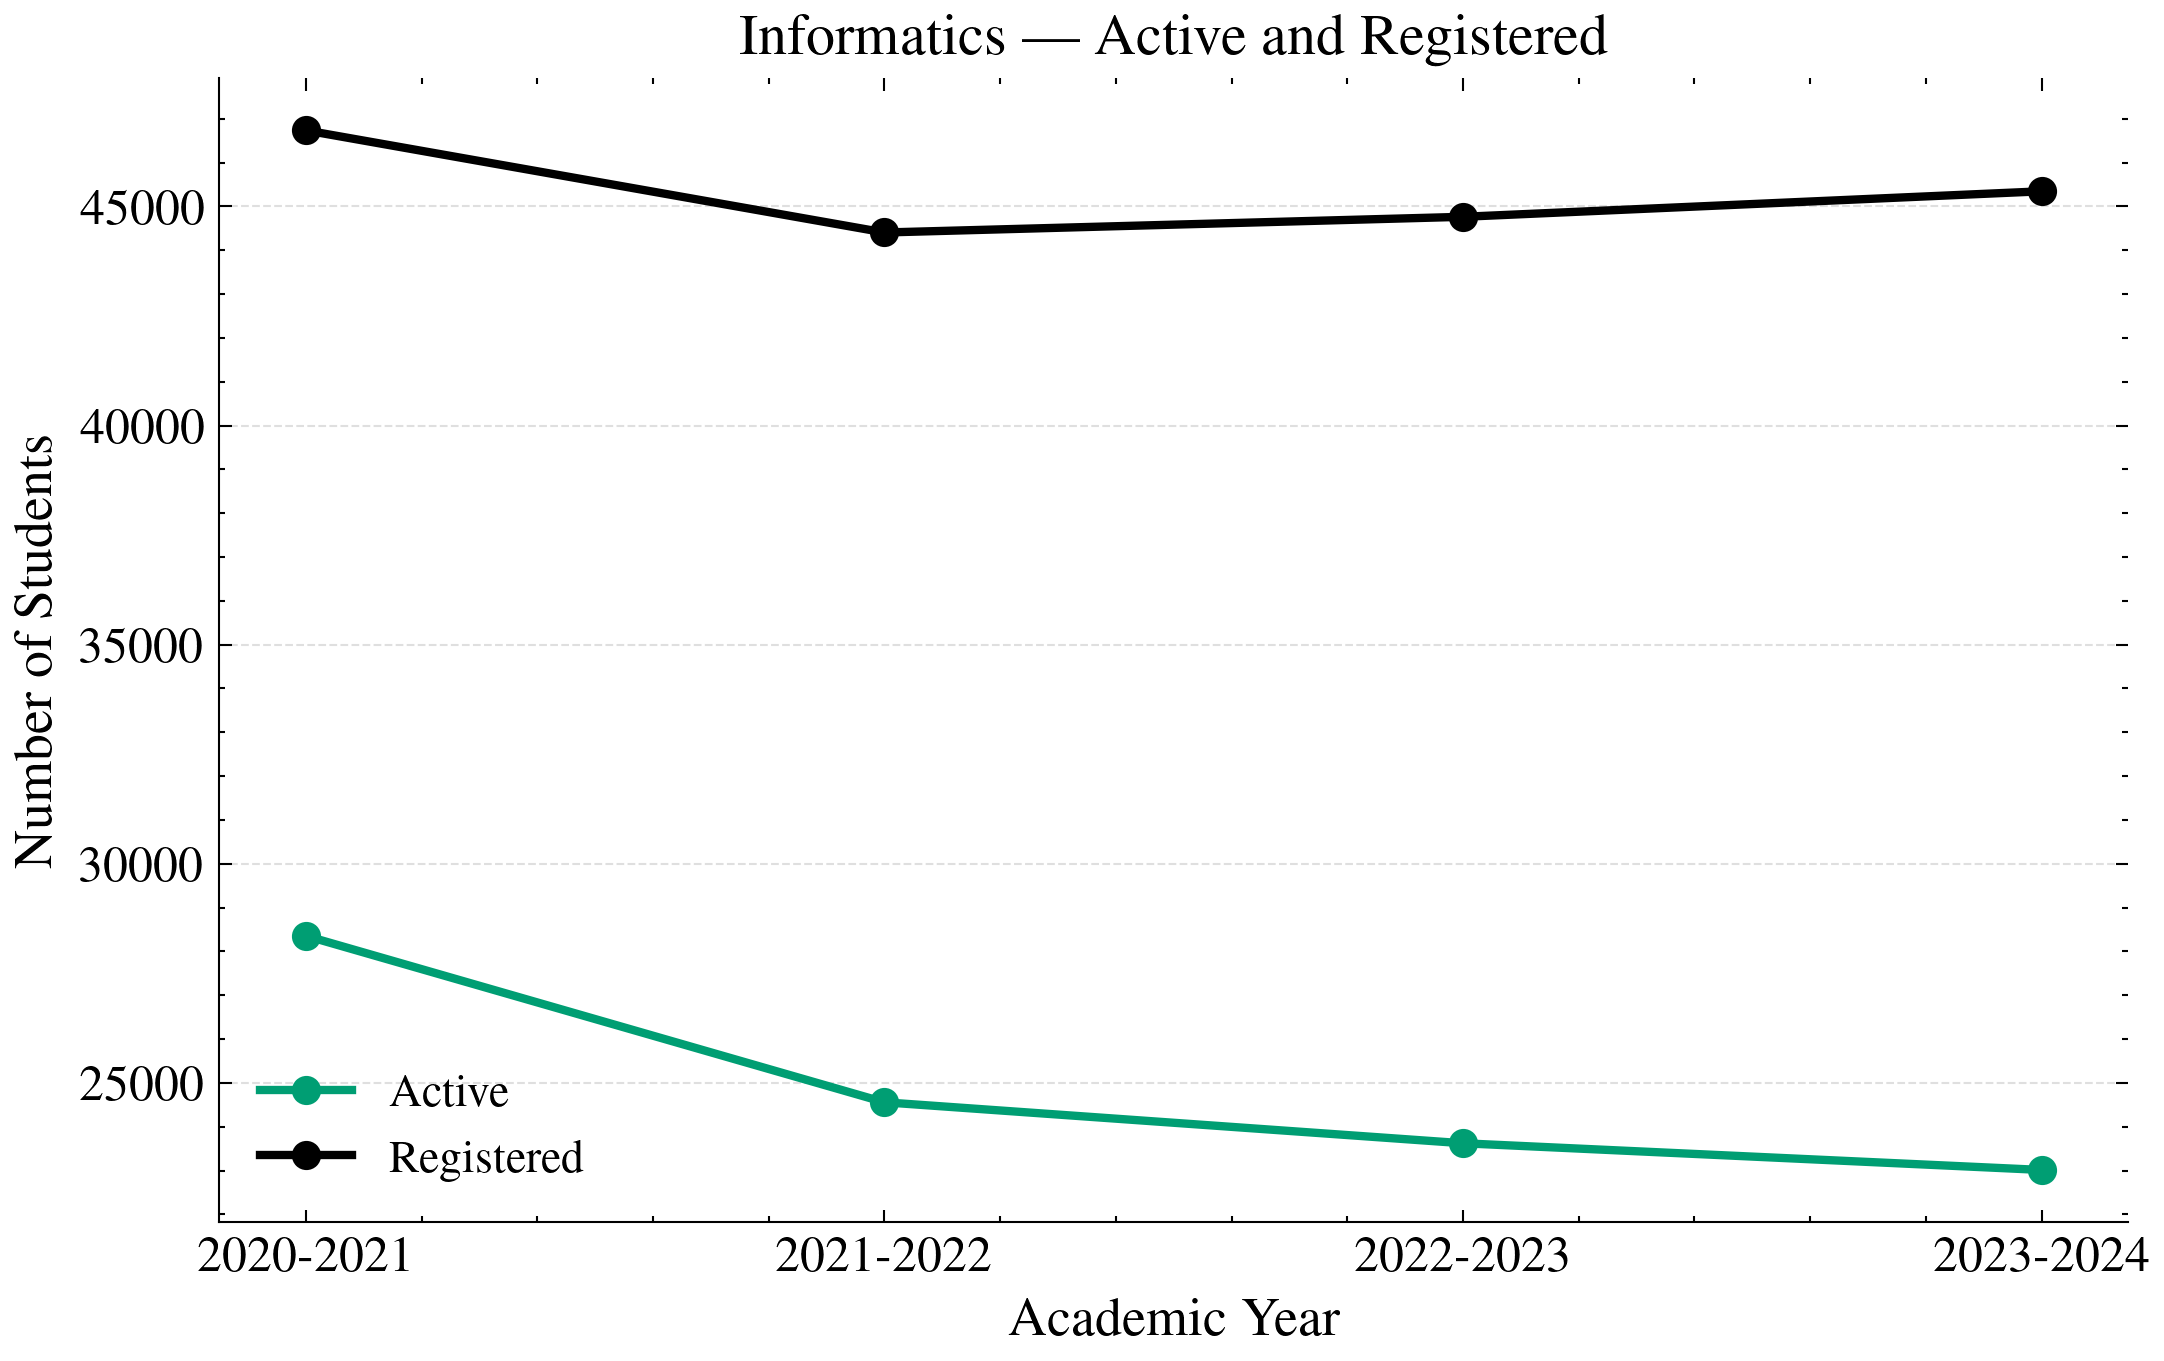

The number of Medicine themed departments is 10


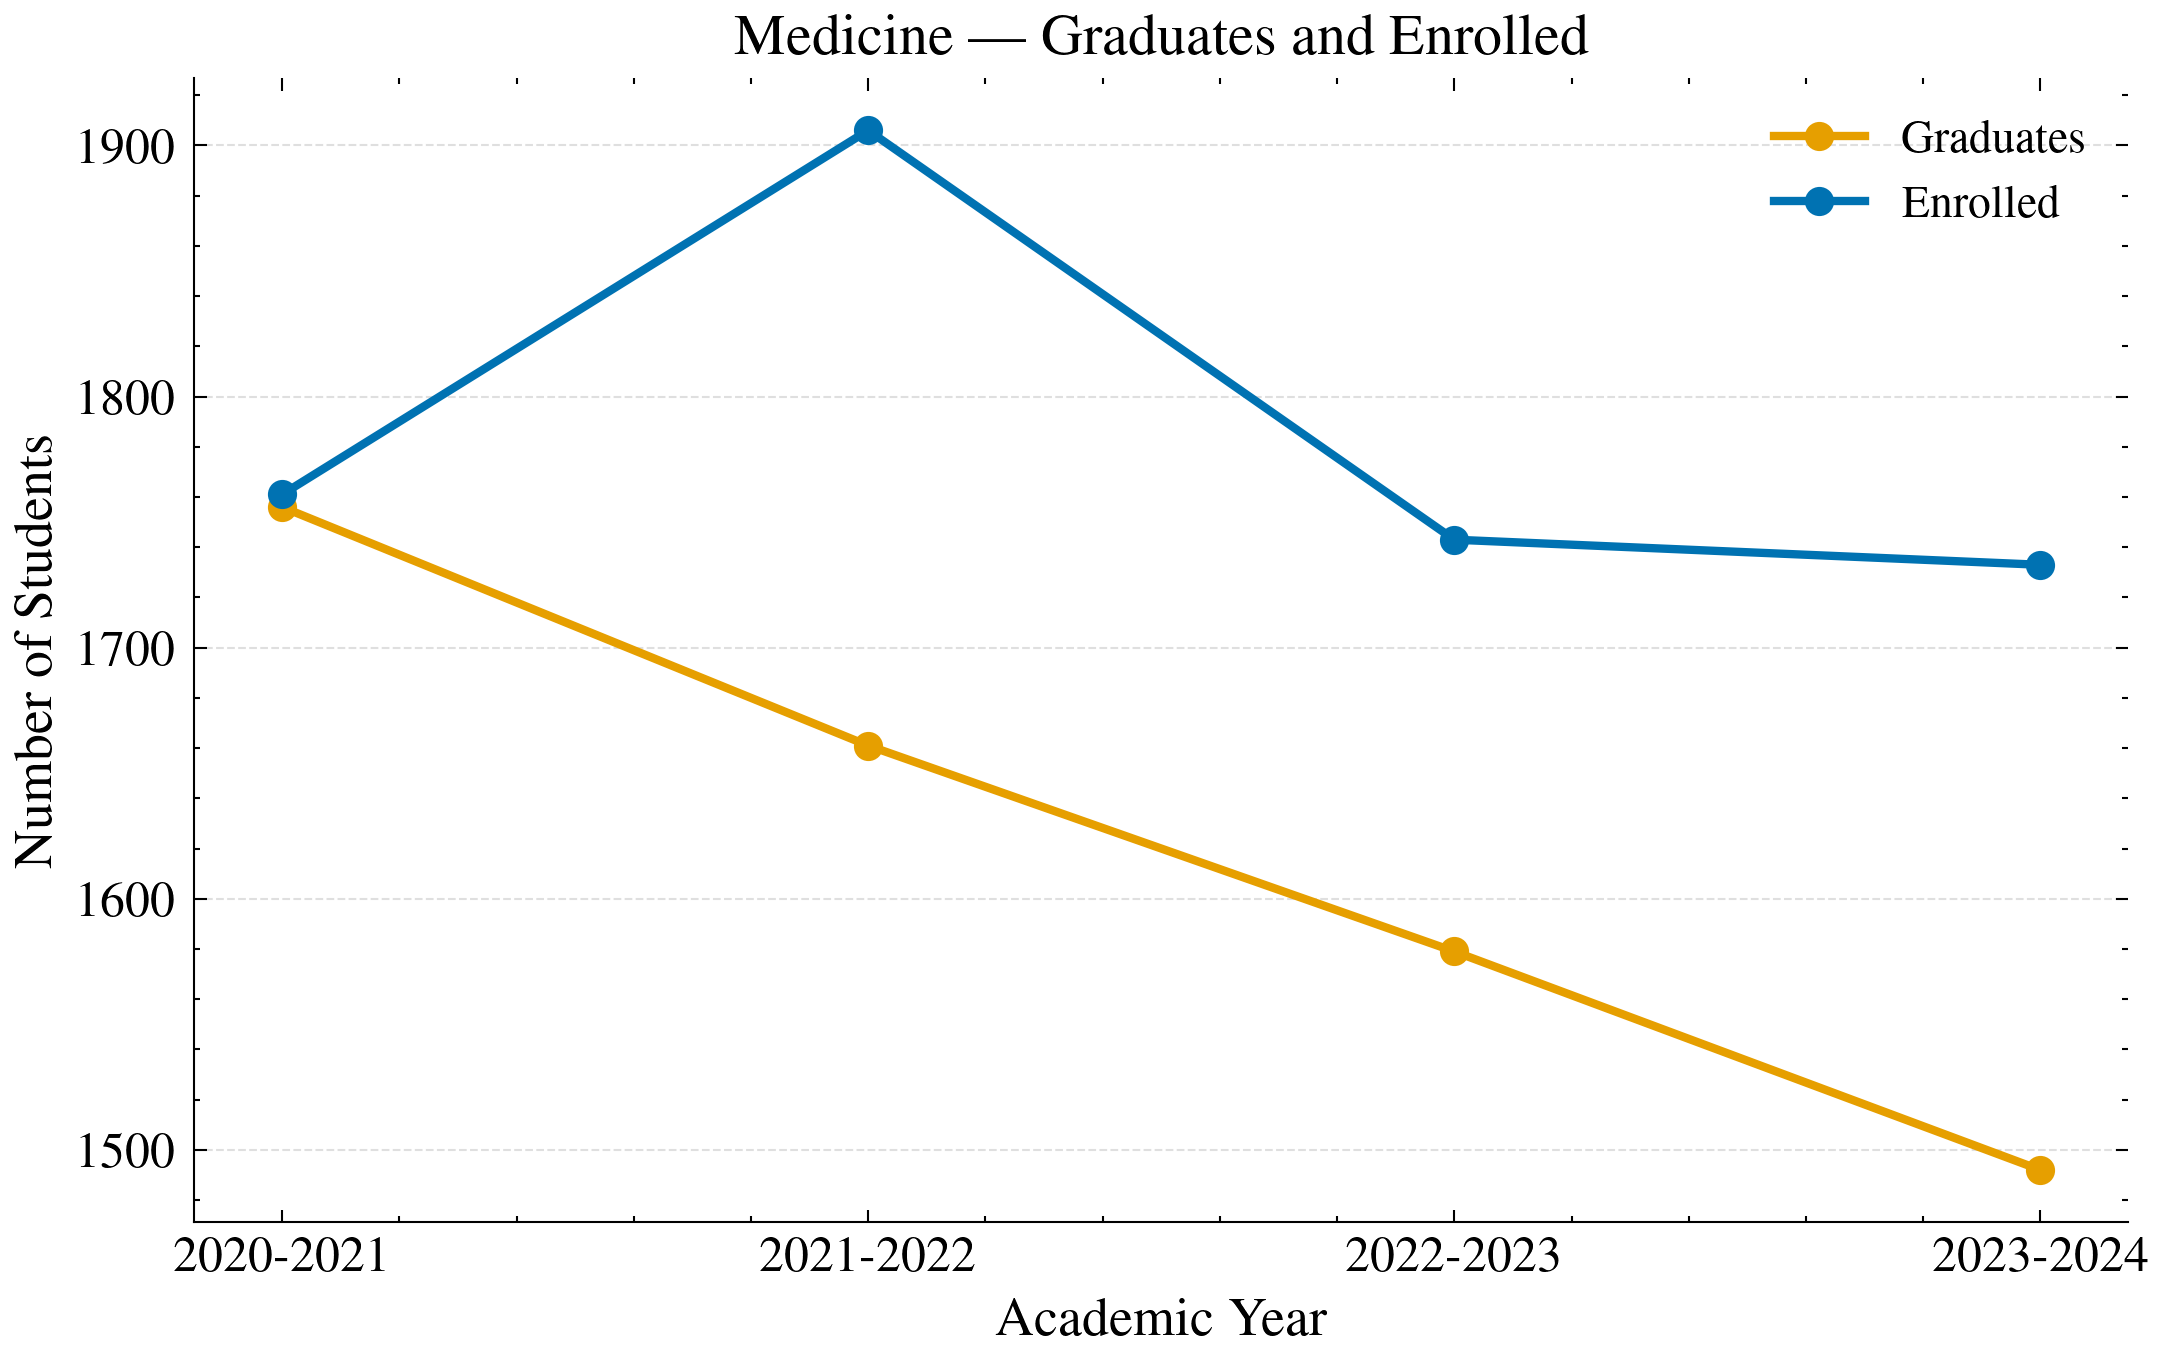

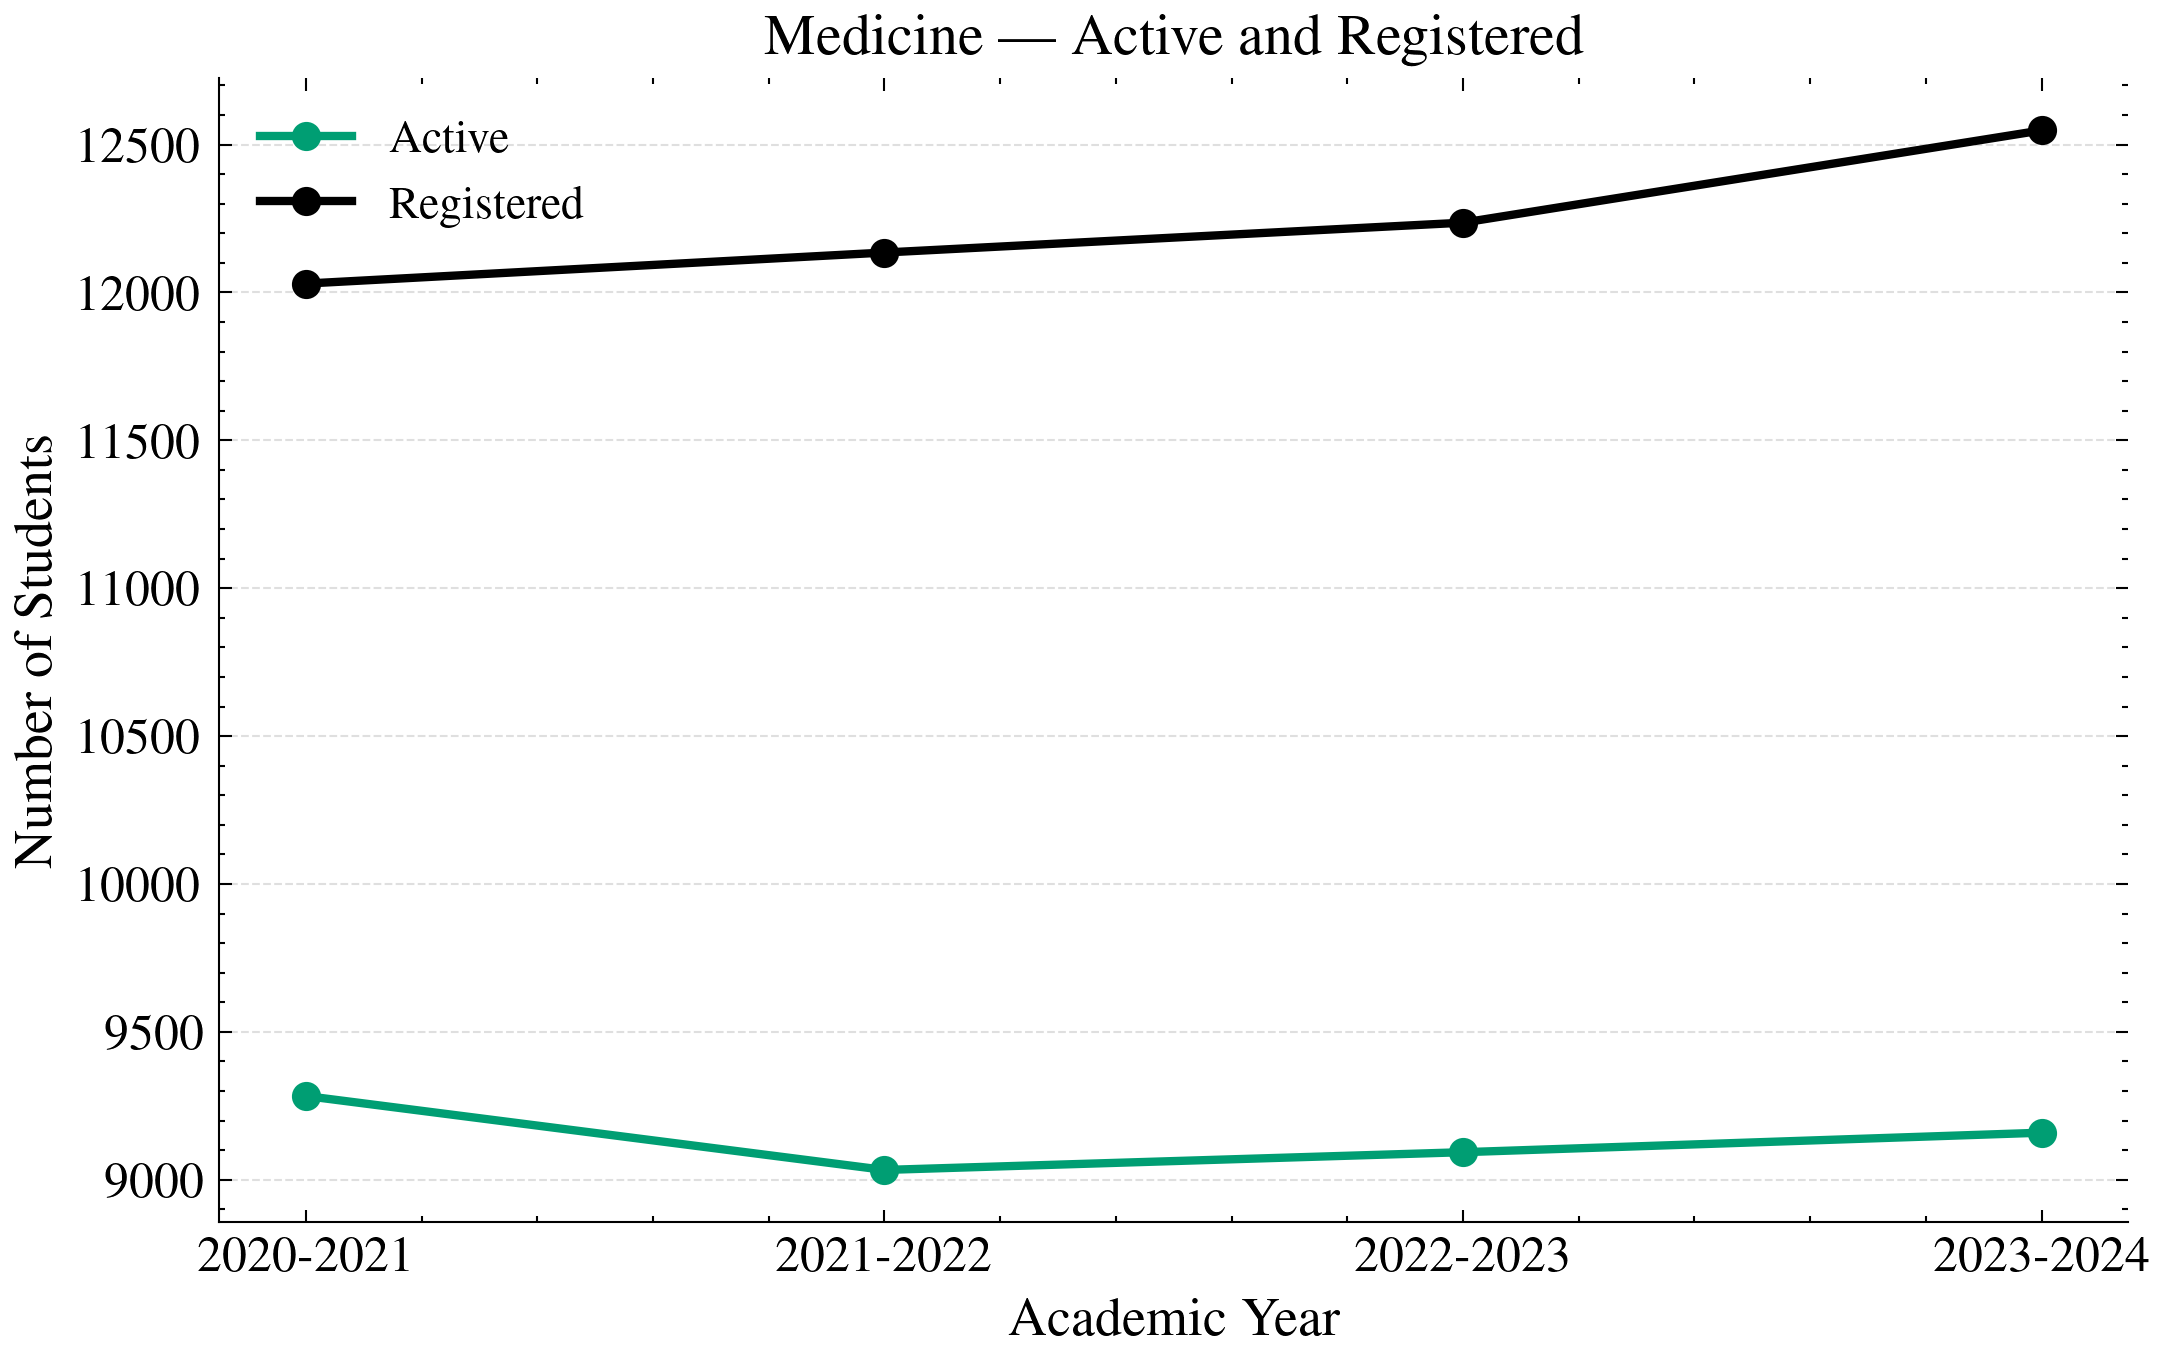

The number of Engineering themed departments is 110


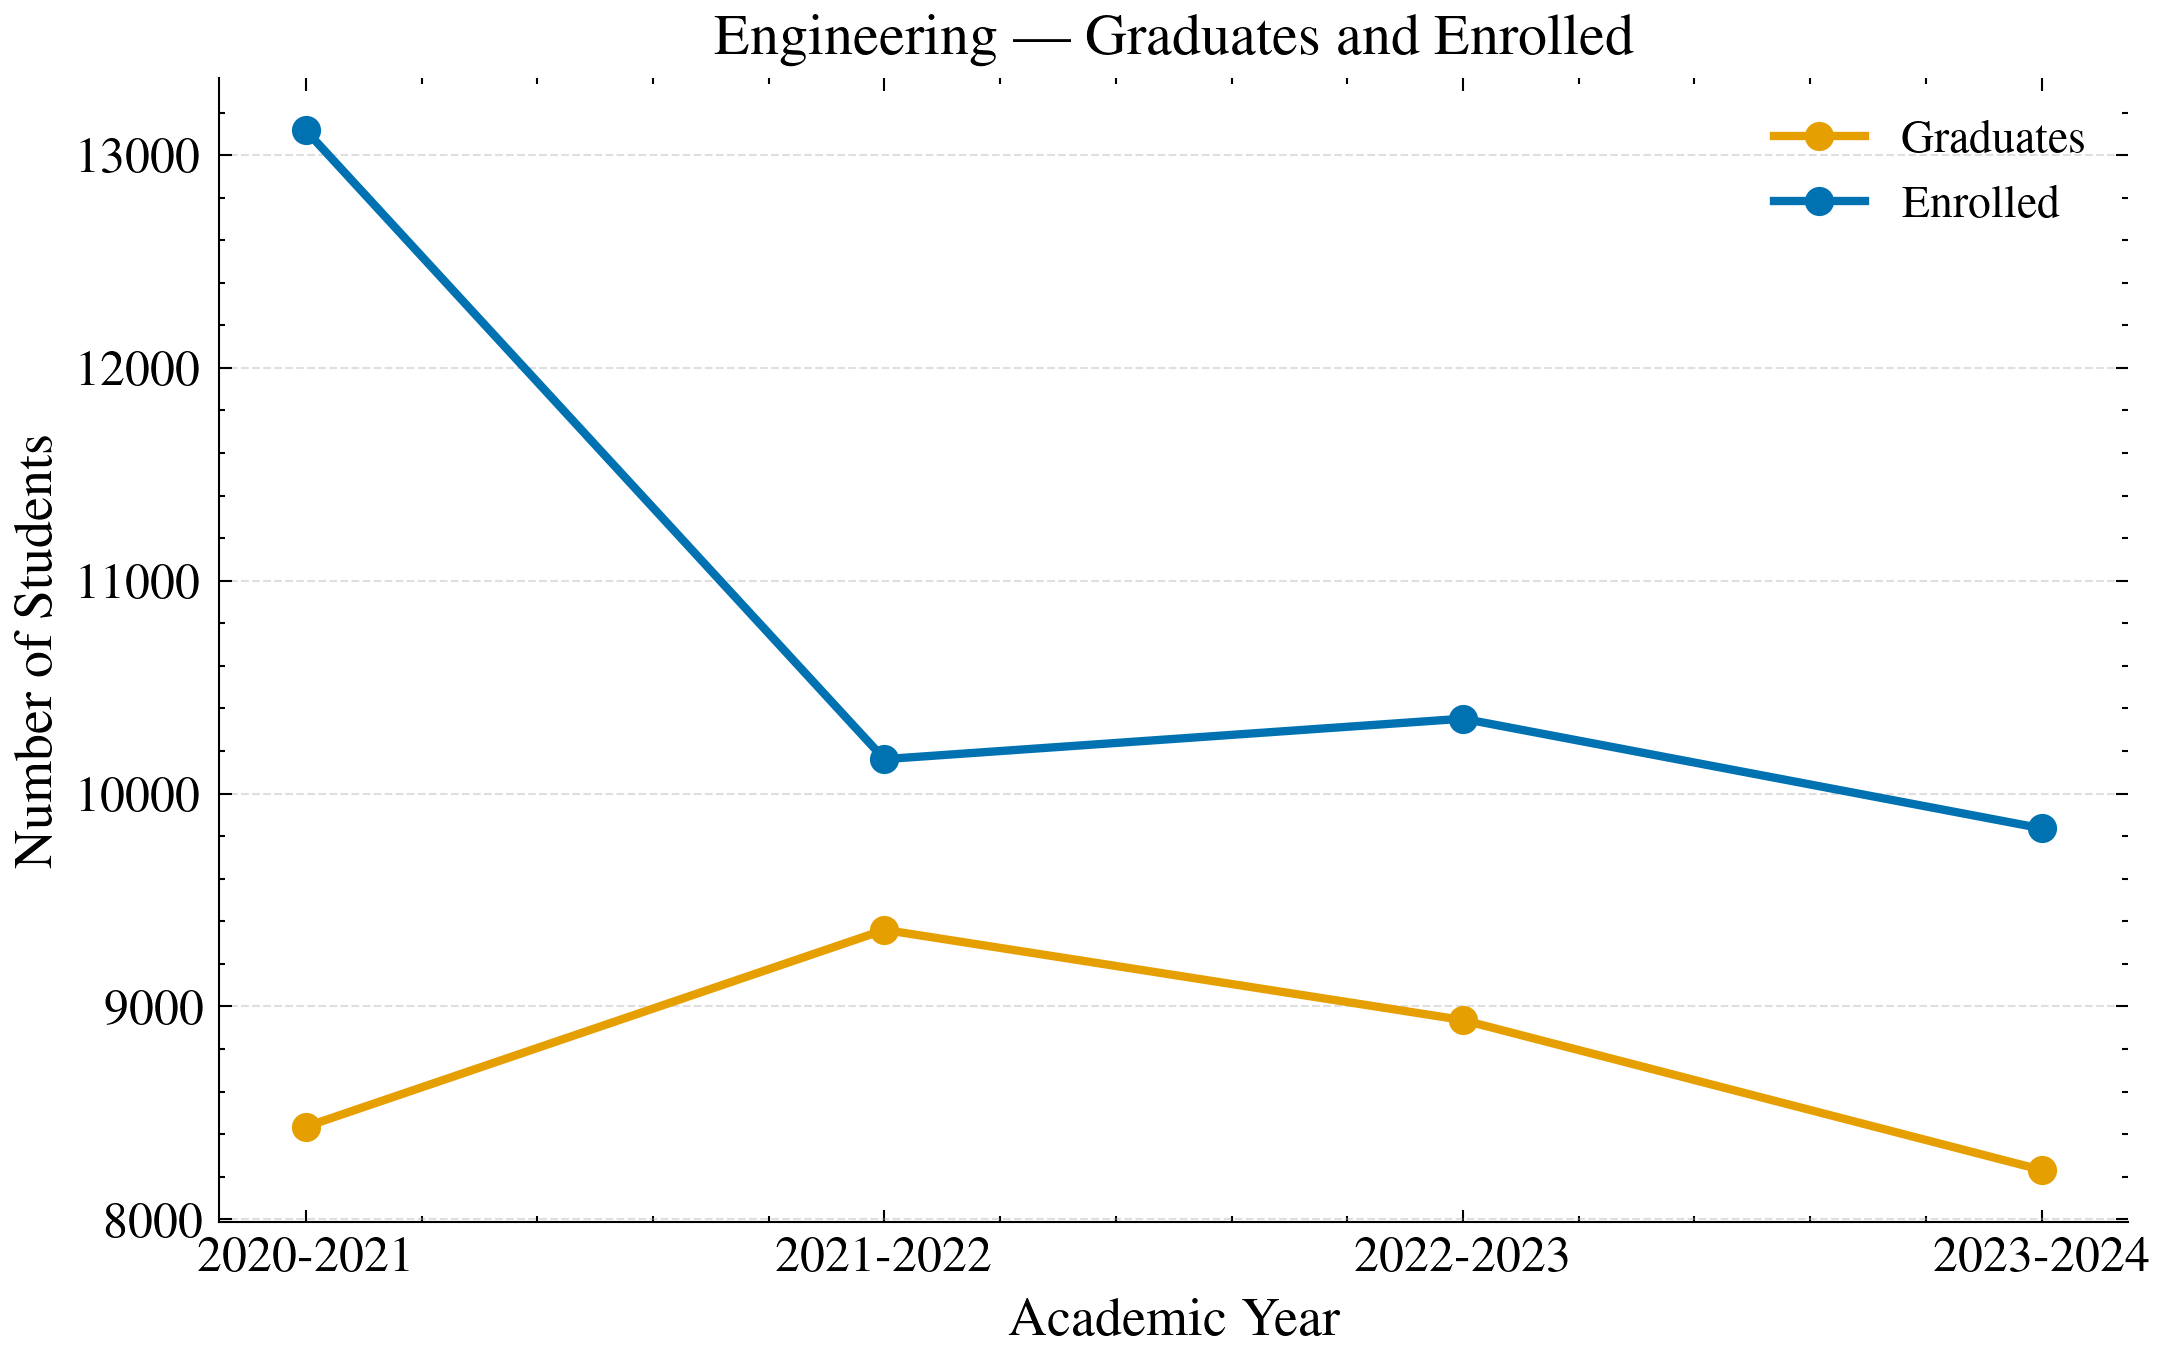

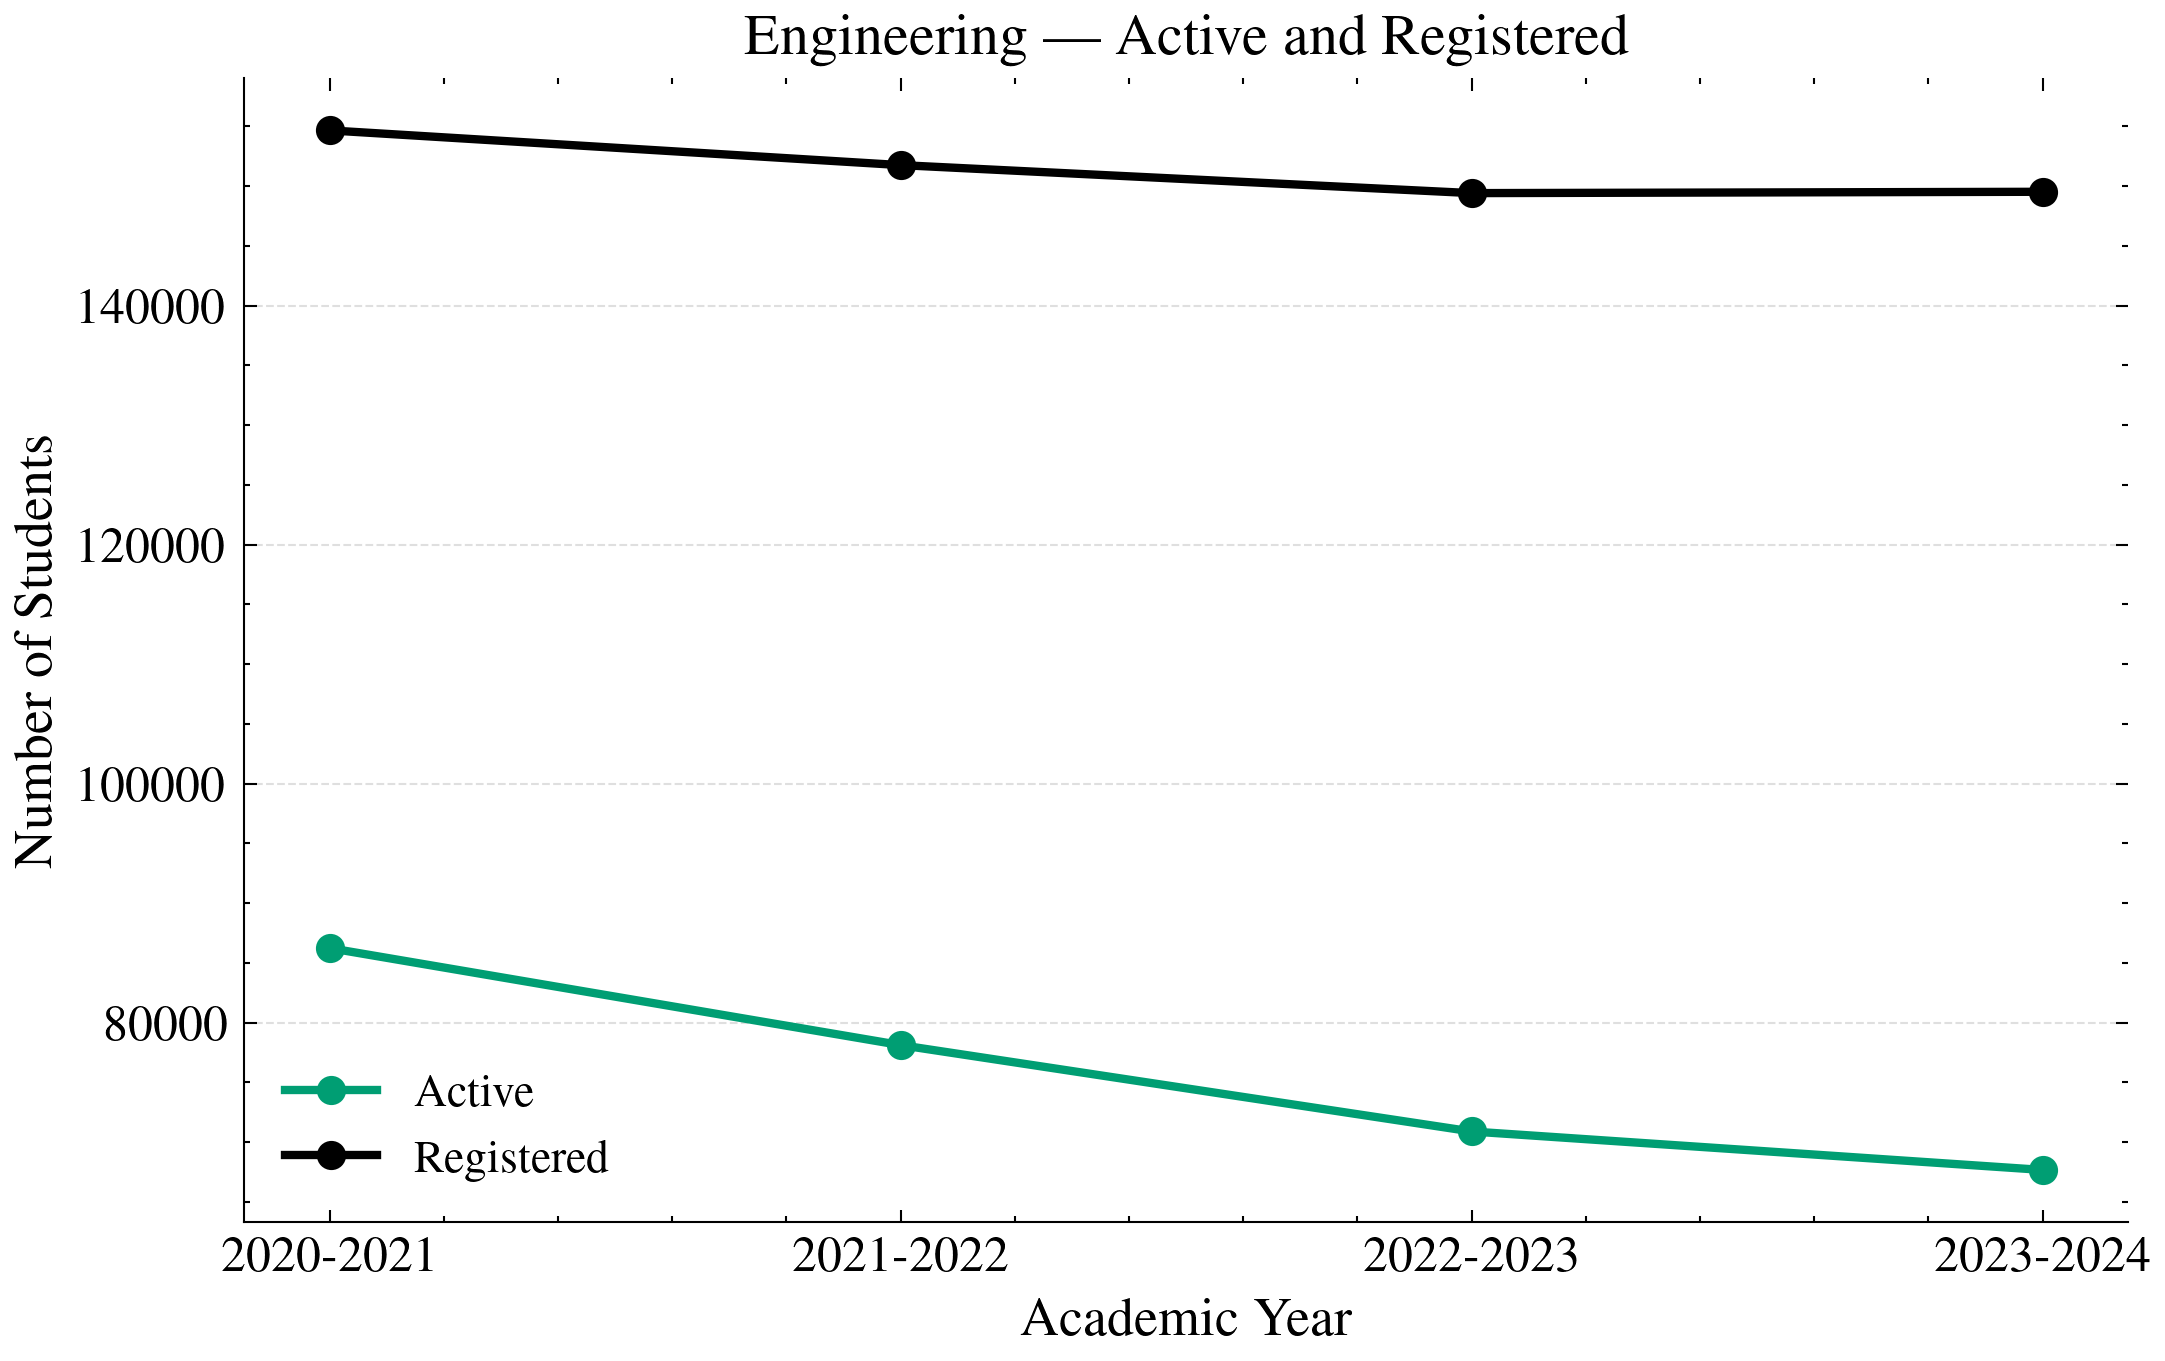

The number of Business themed departments is 26


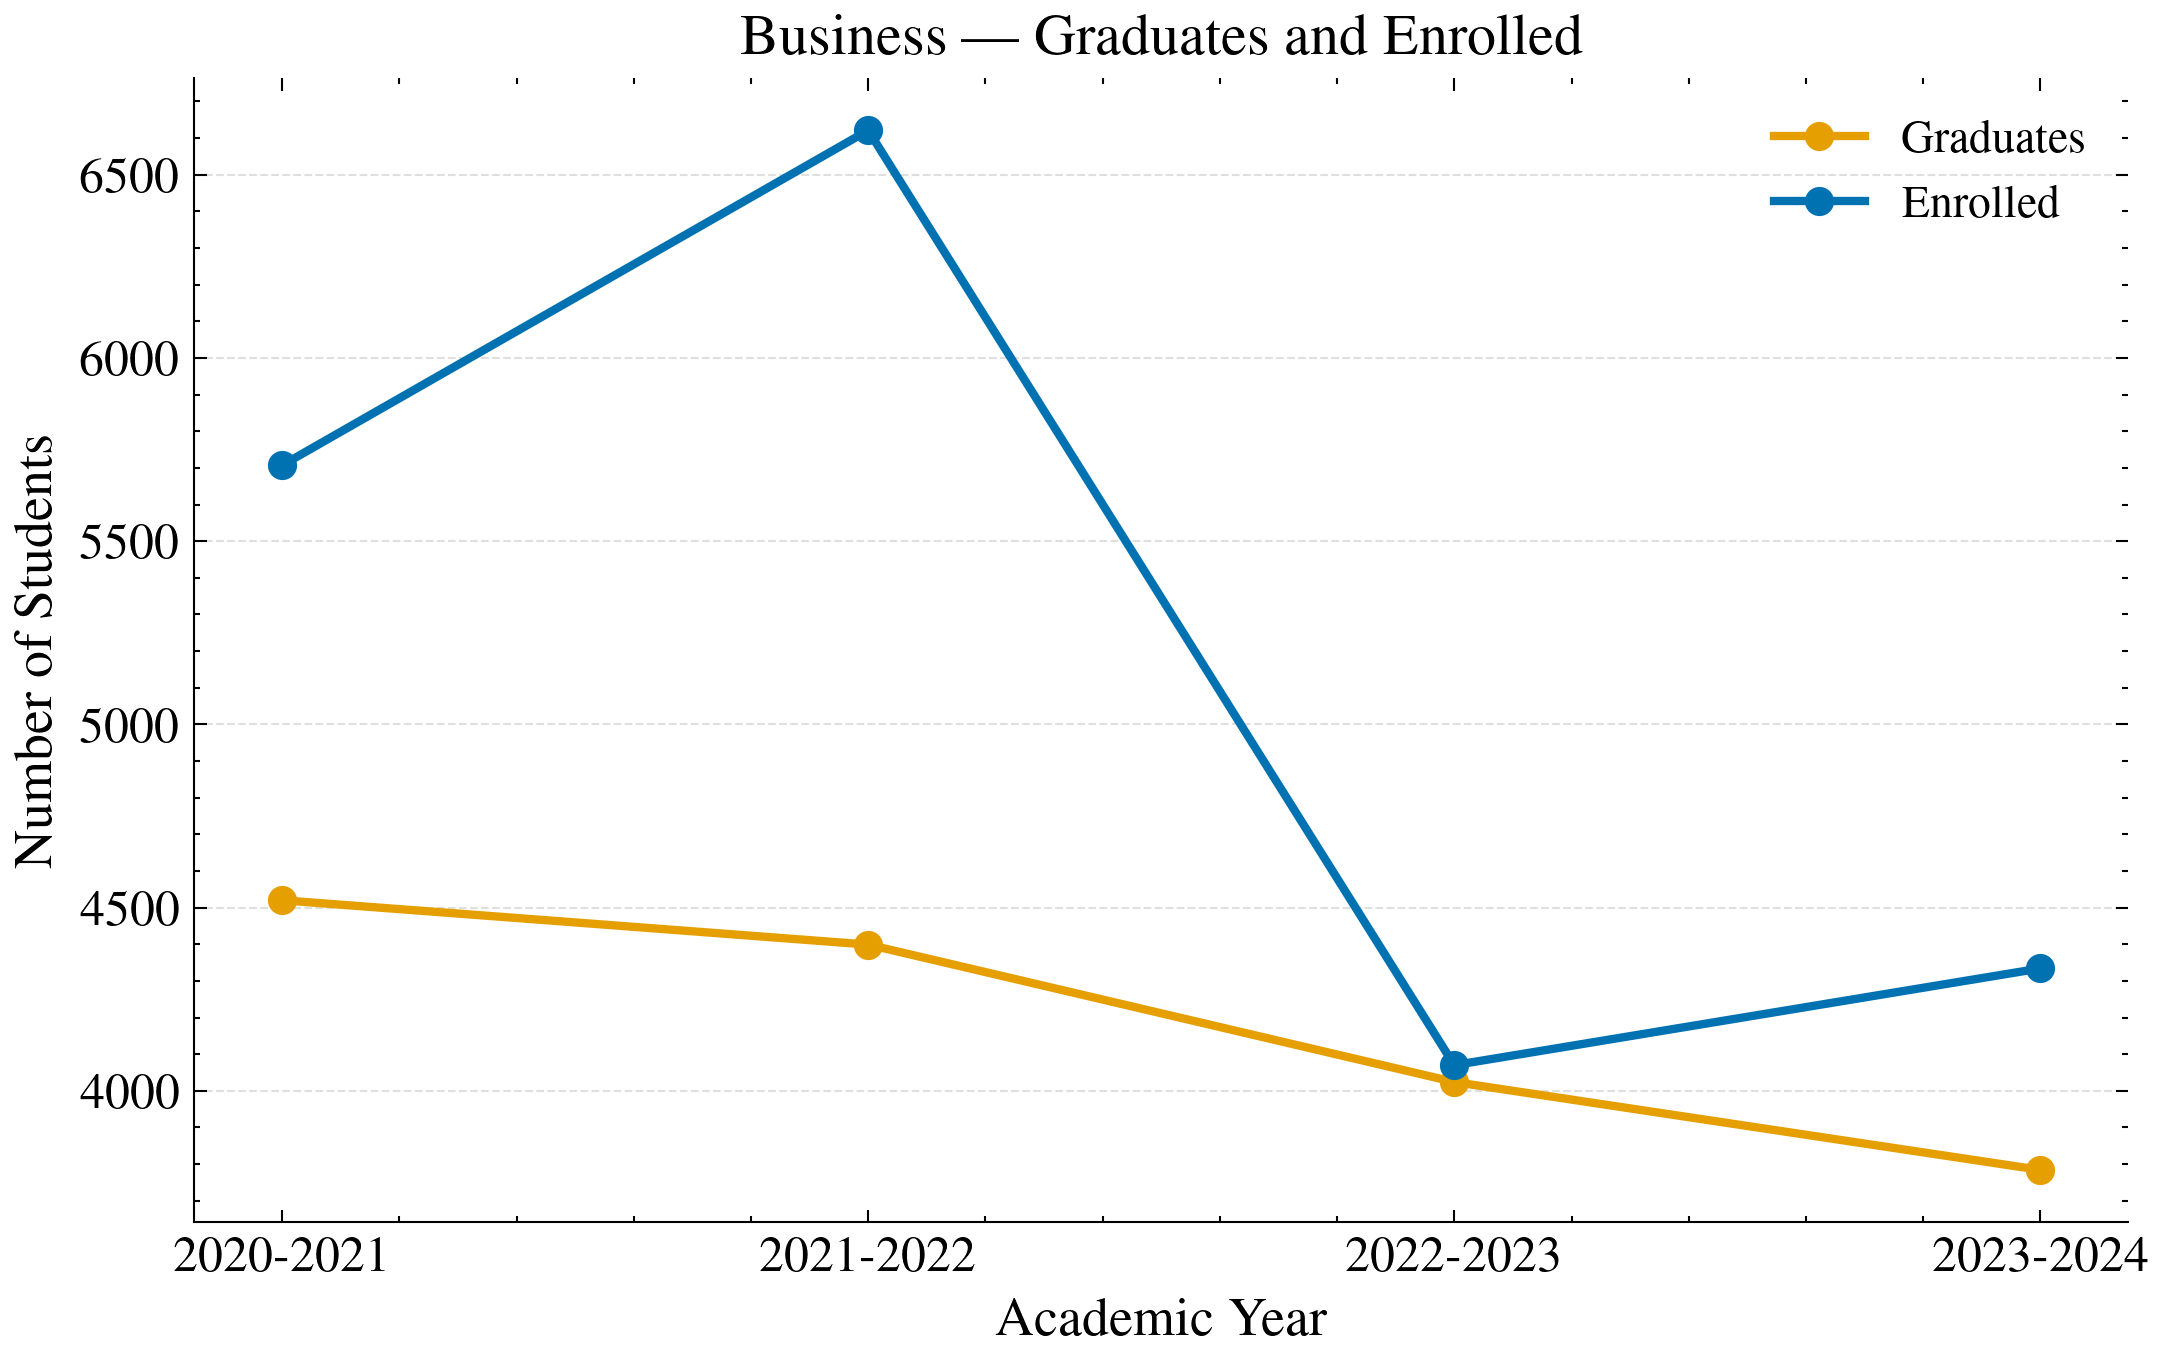

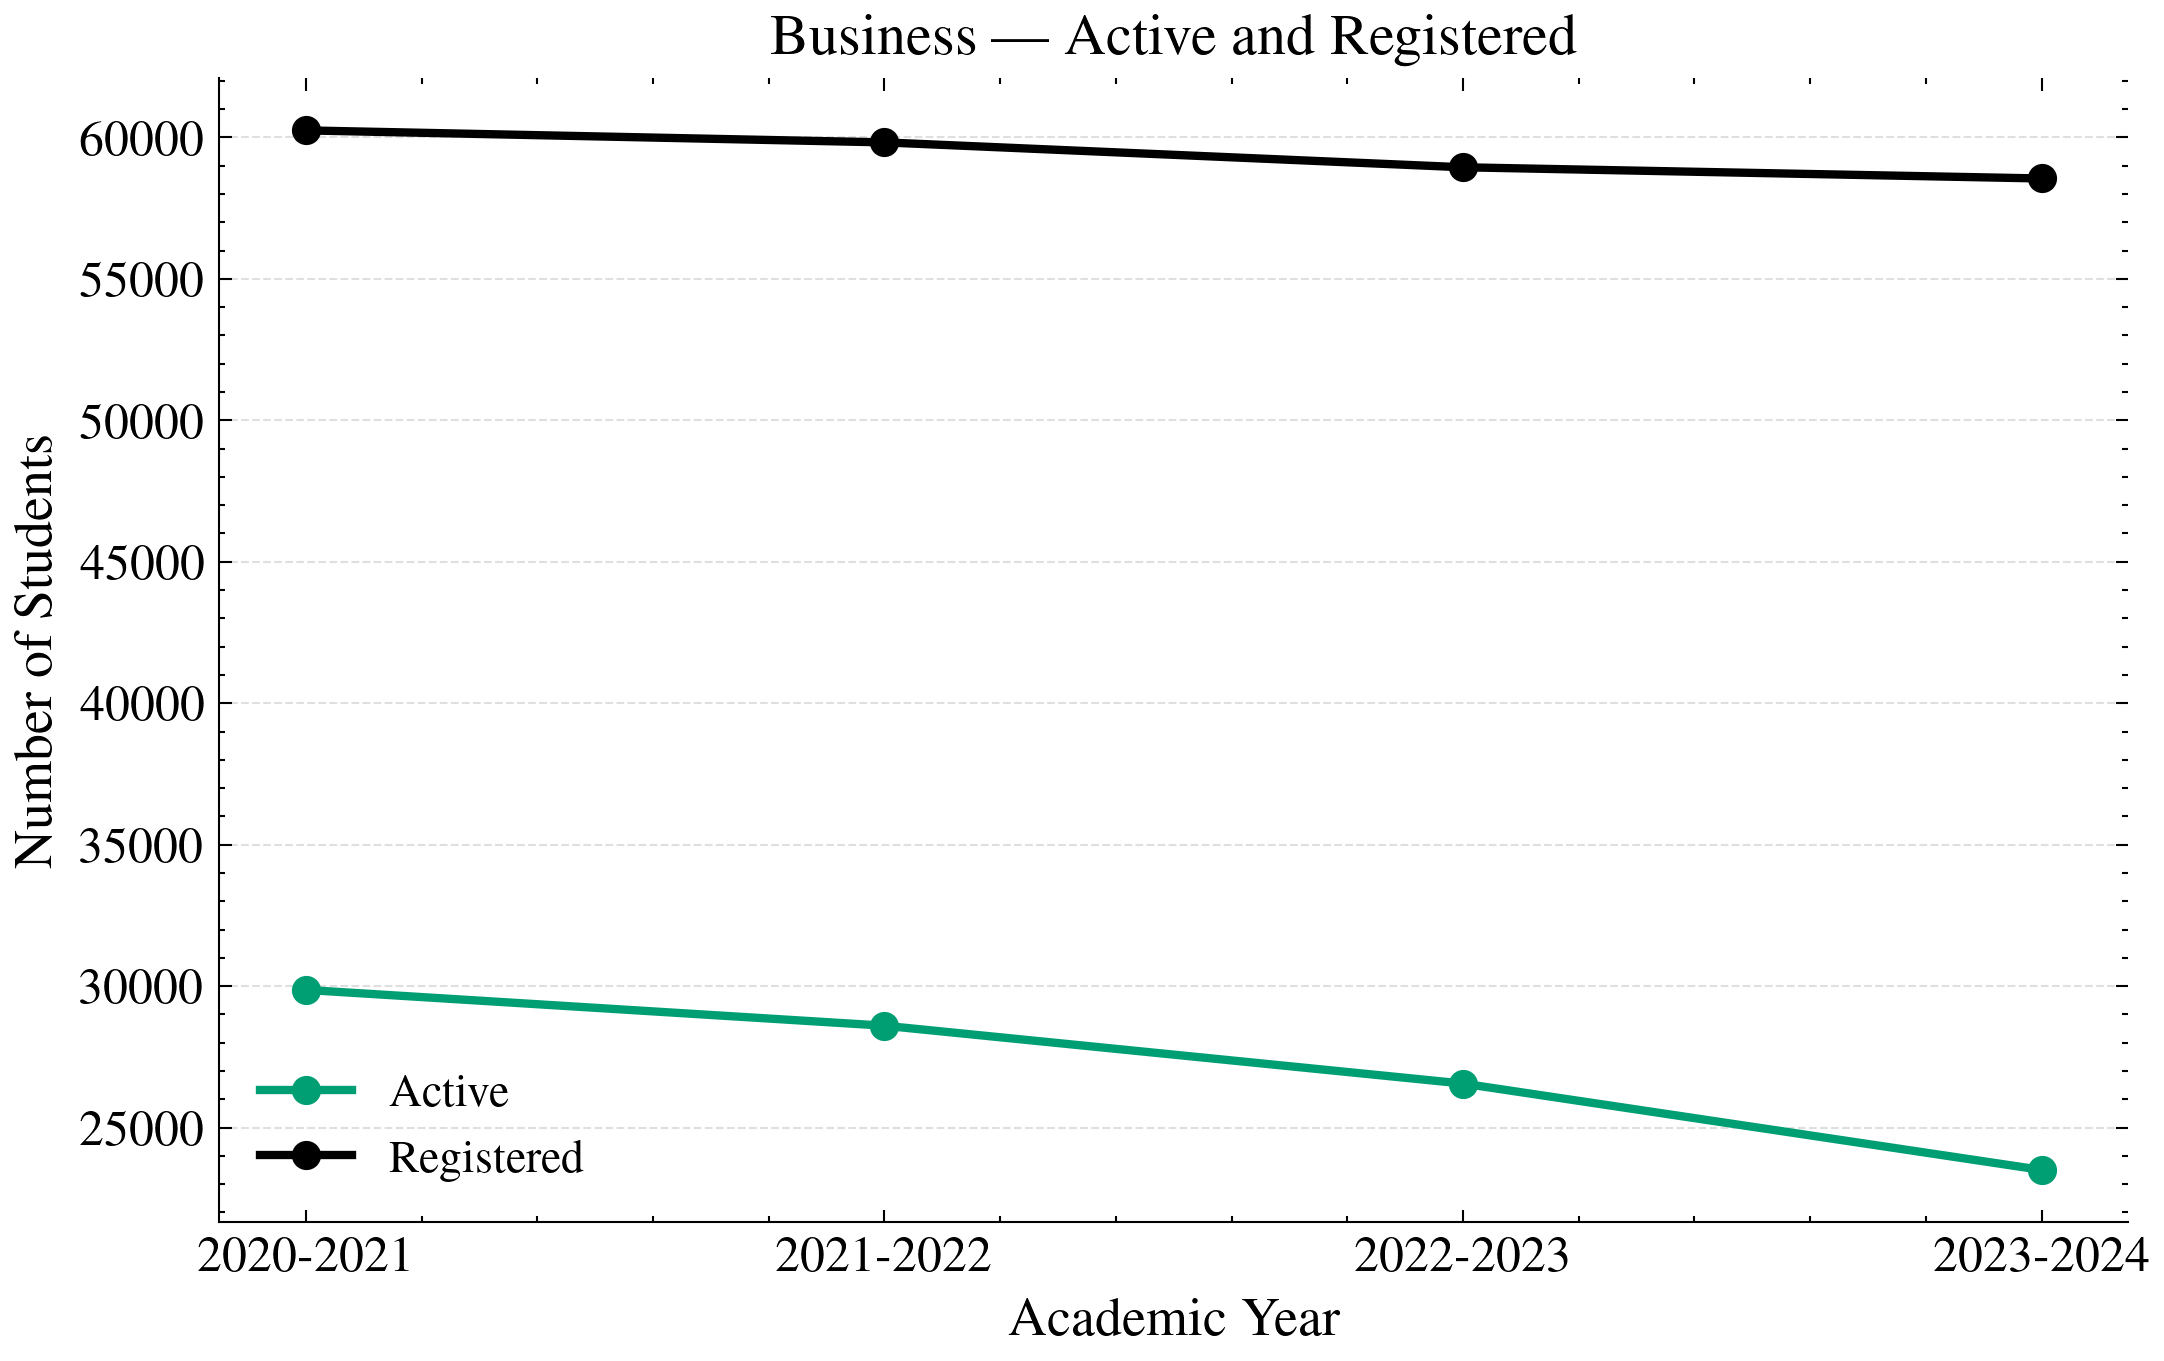

The number of Marketing themed departments is 2


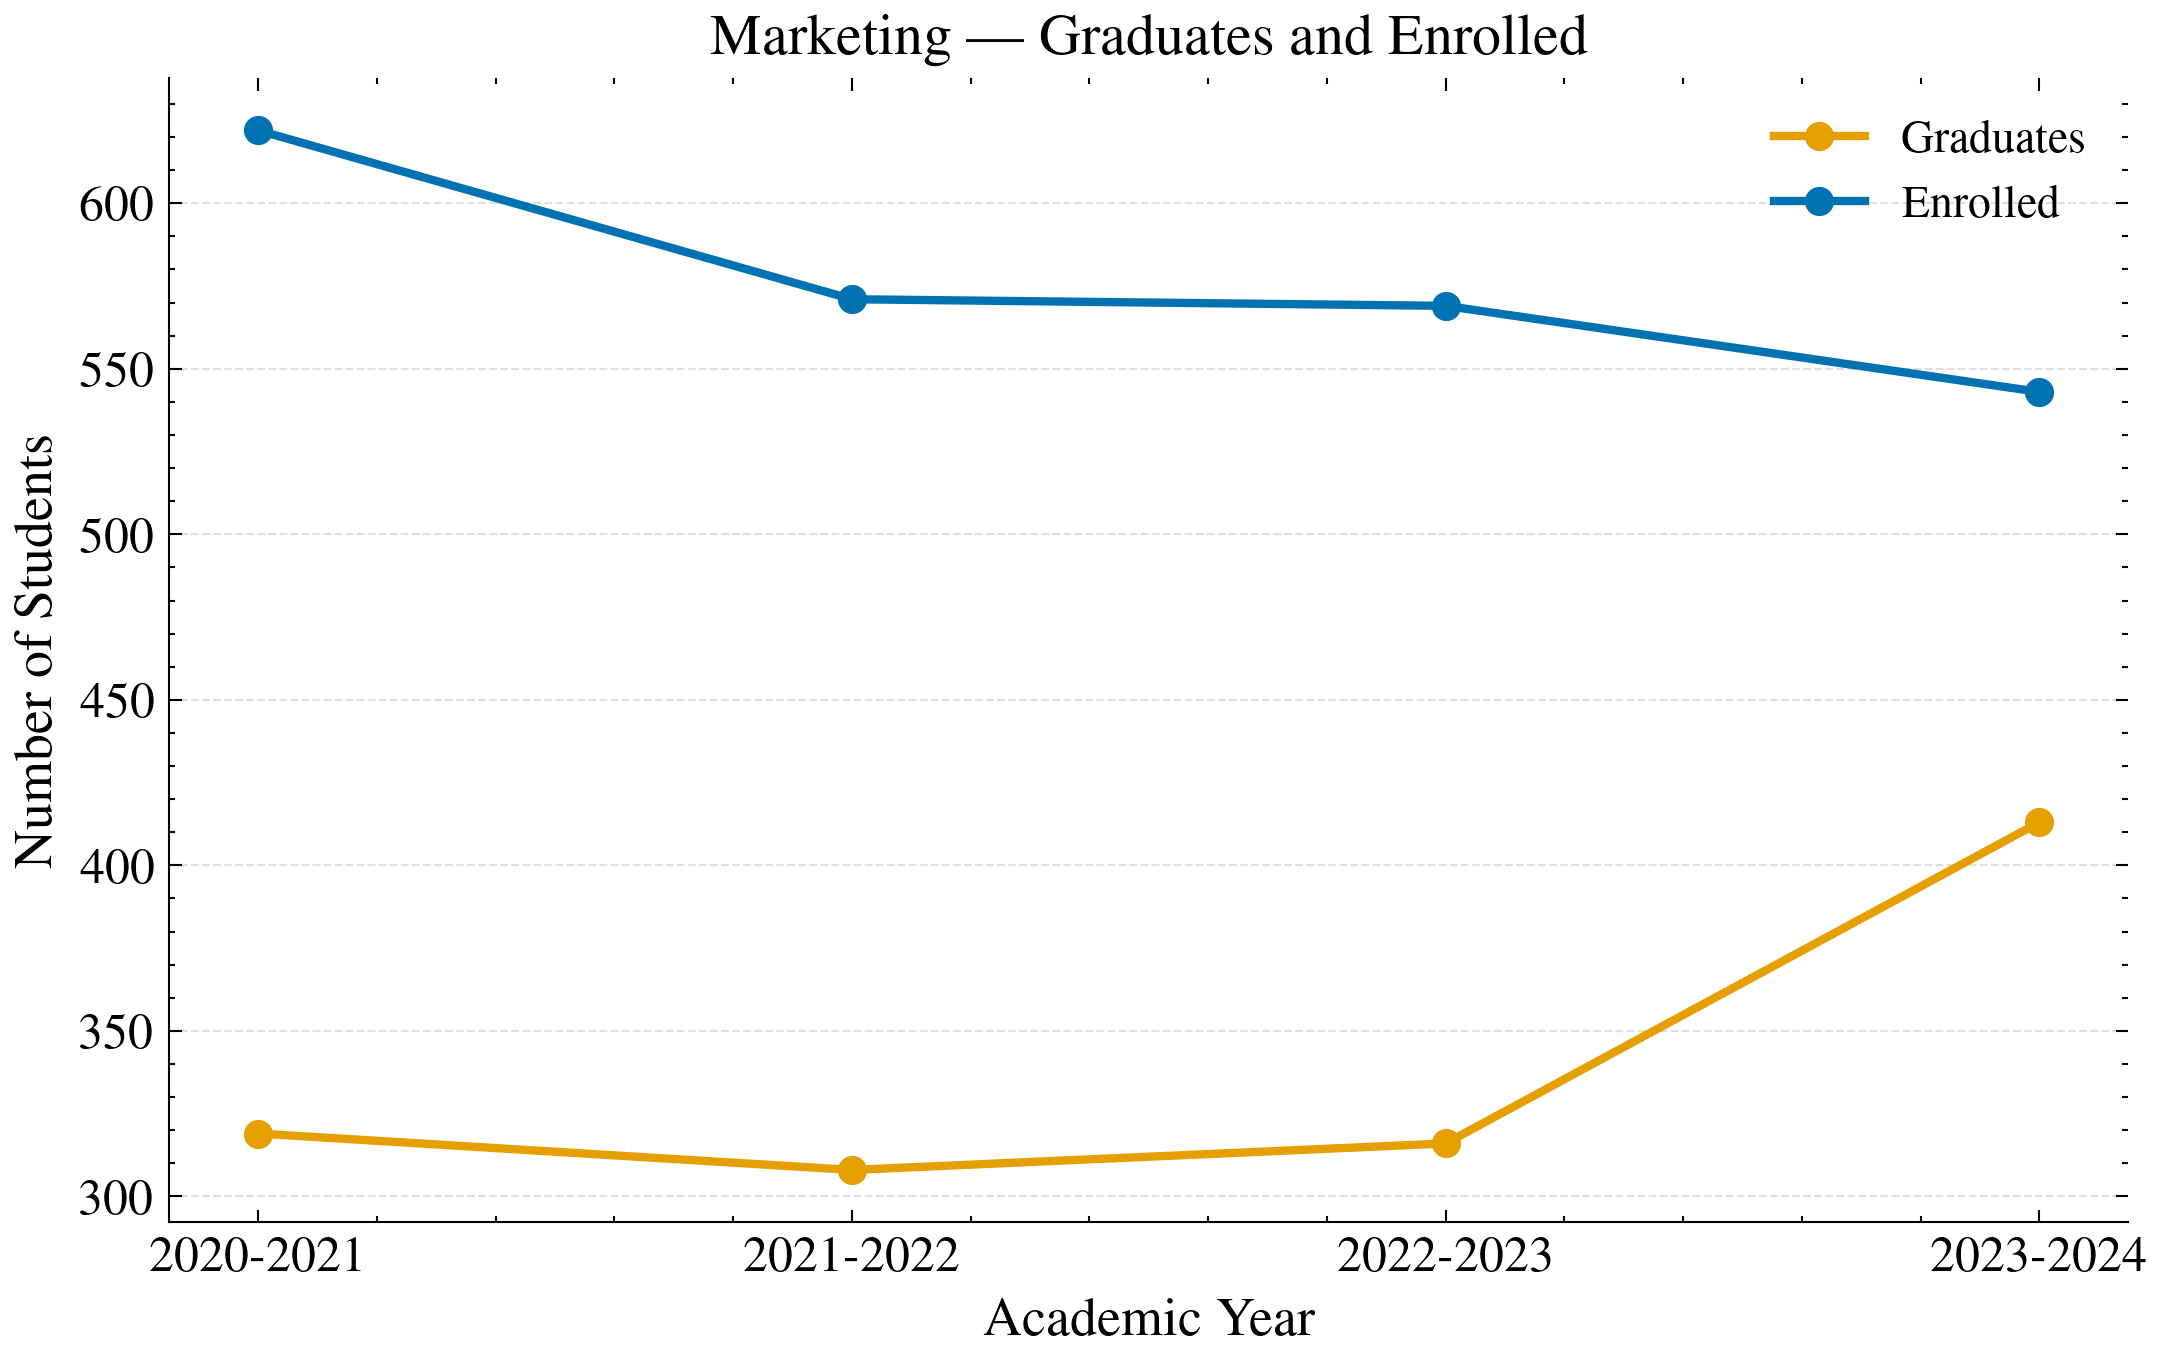

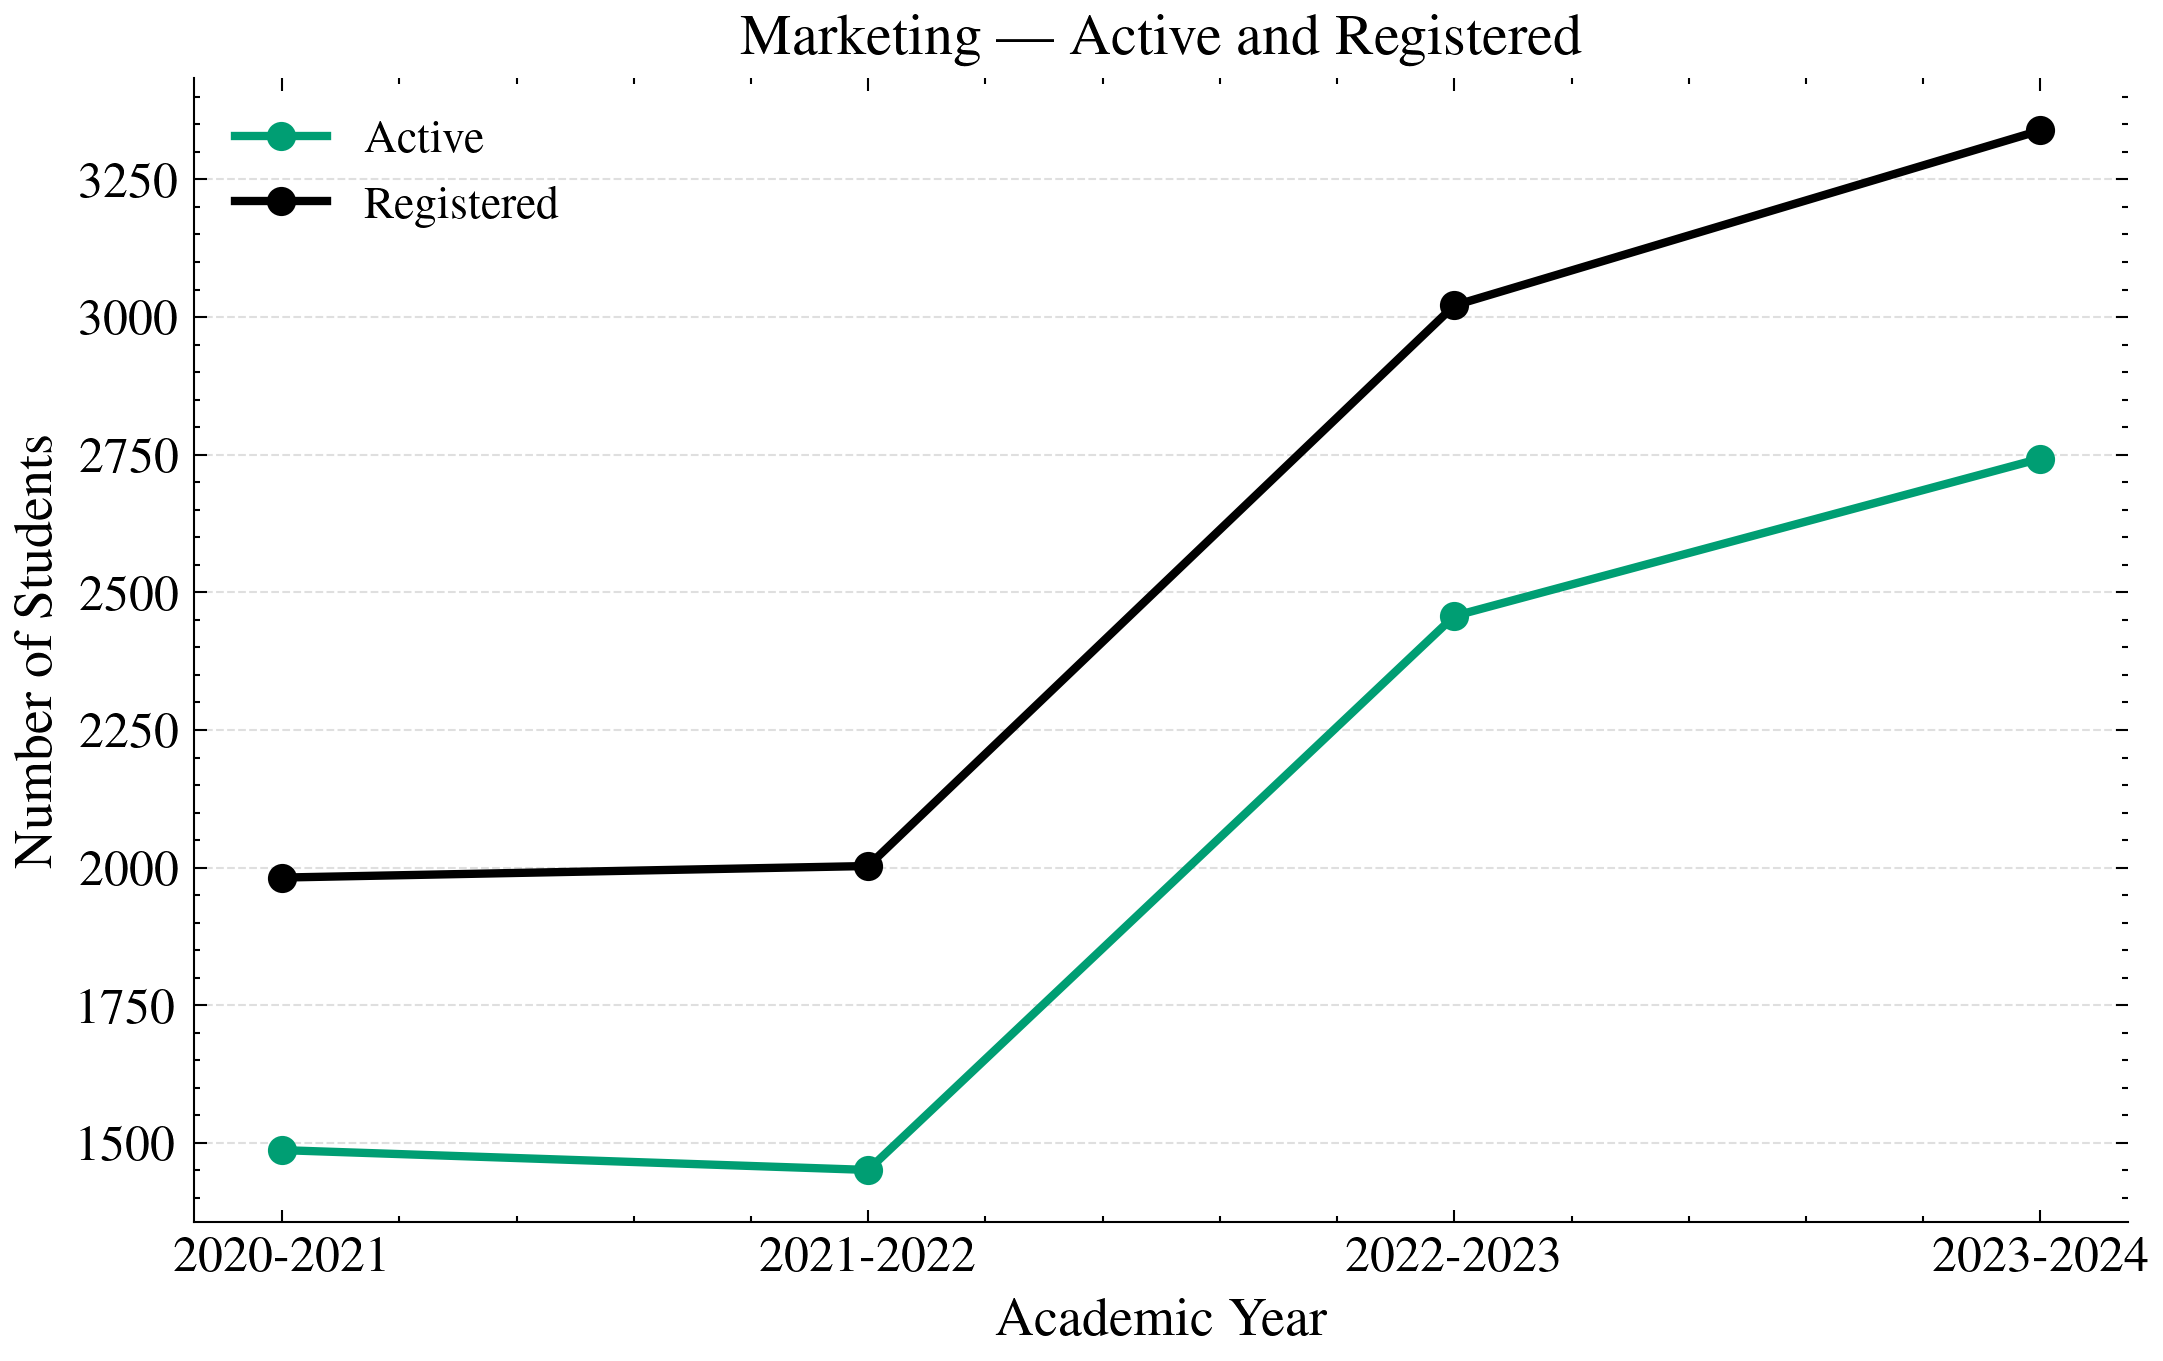

The number of Literature themed departments is 11


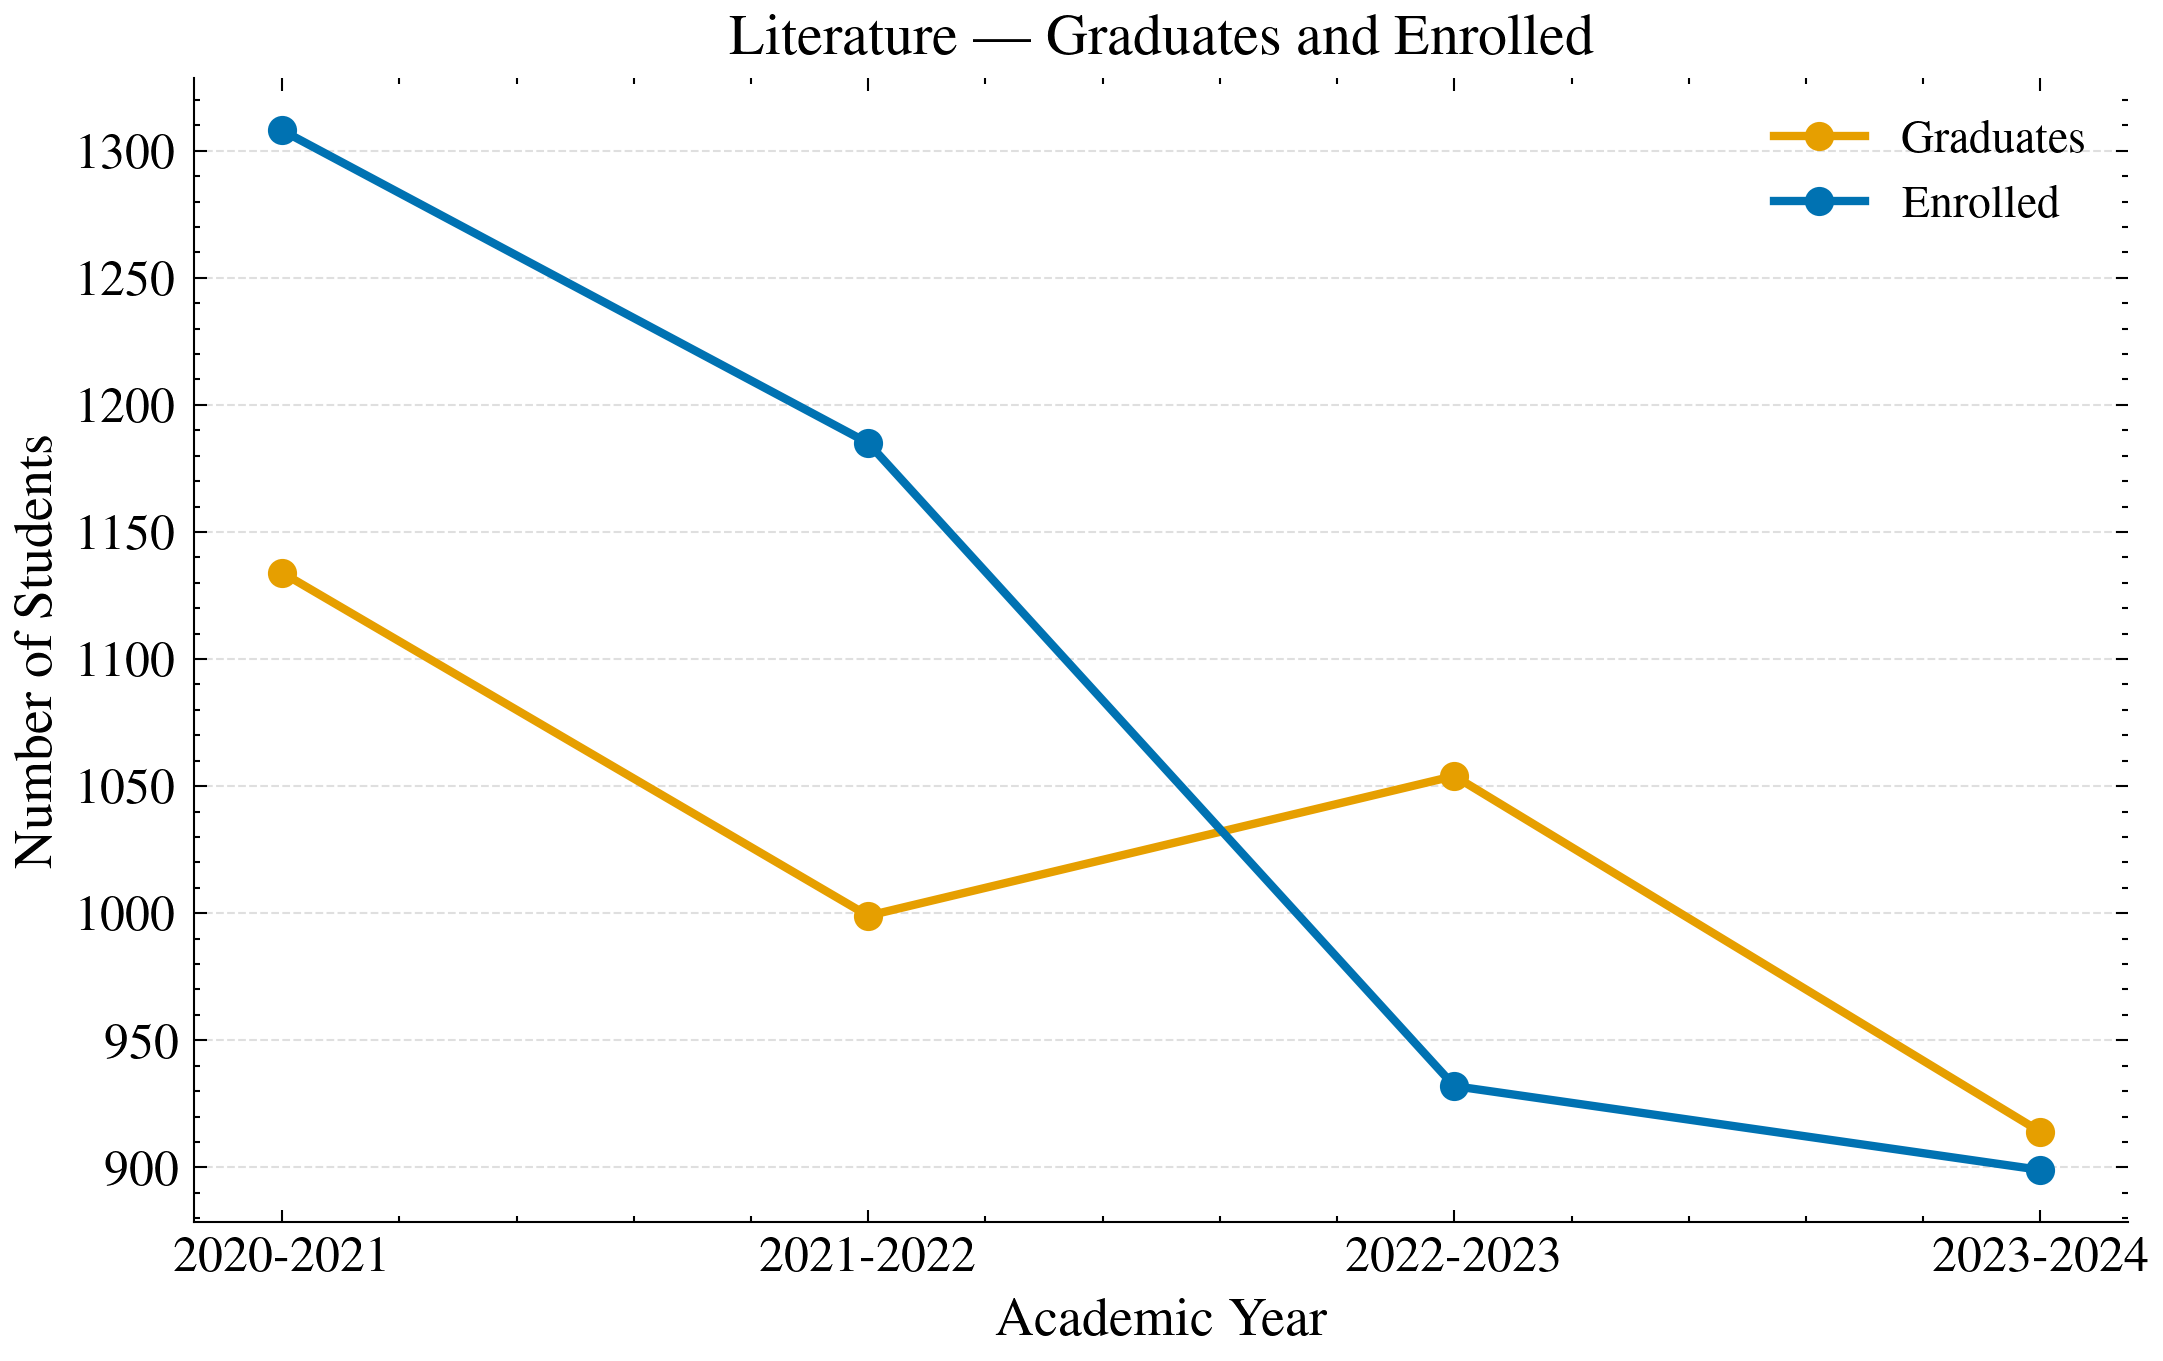

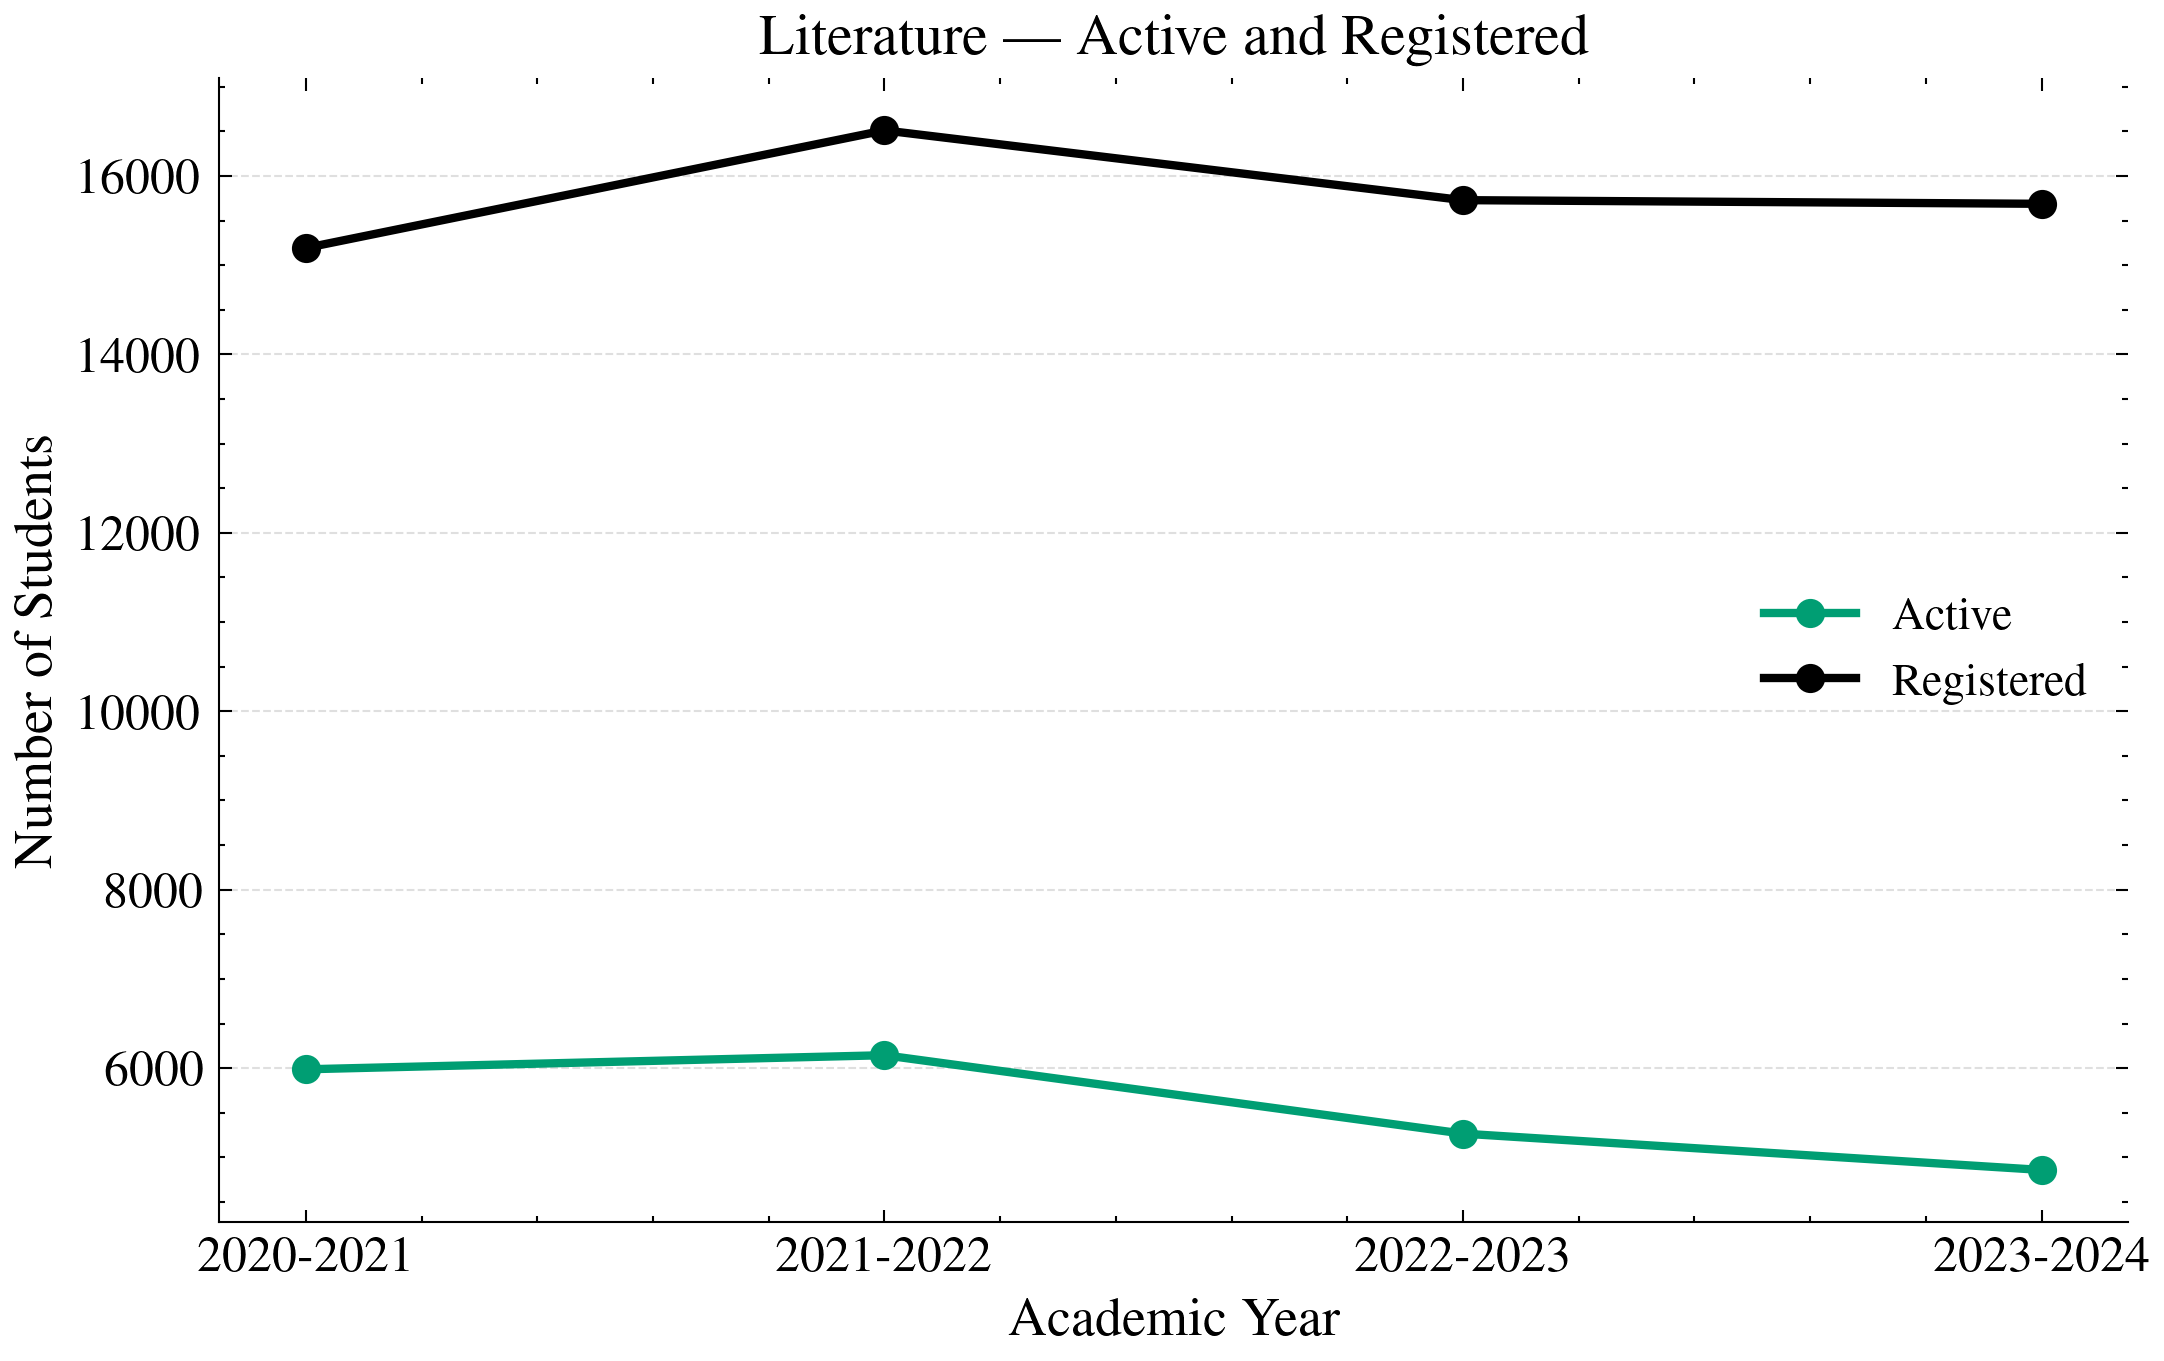

The number of Psychology themed departments is 8


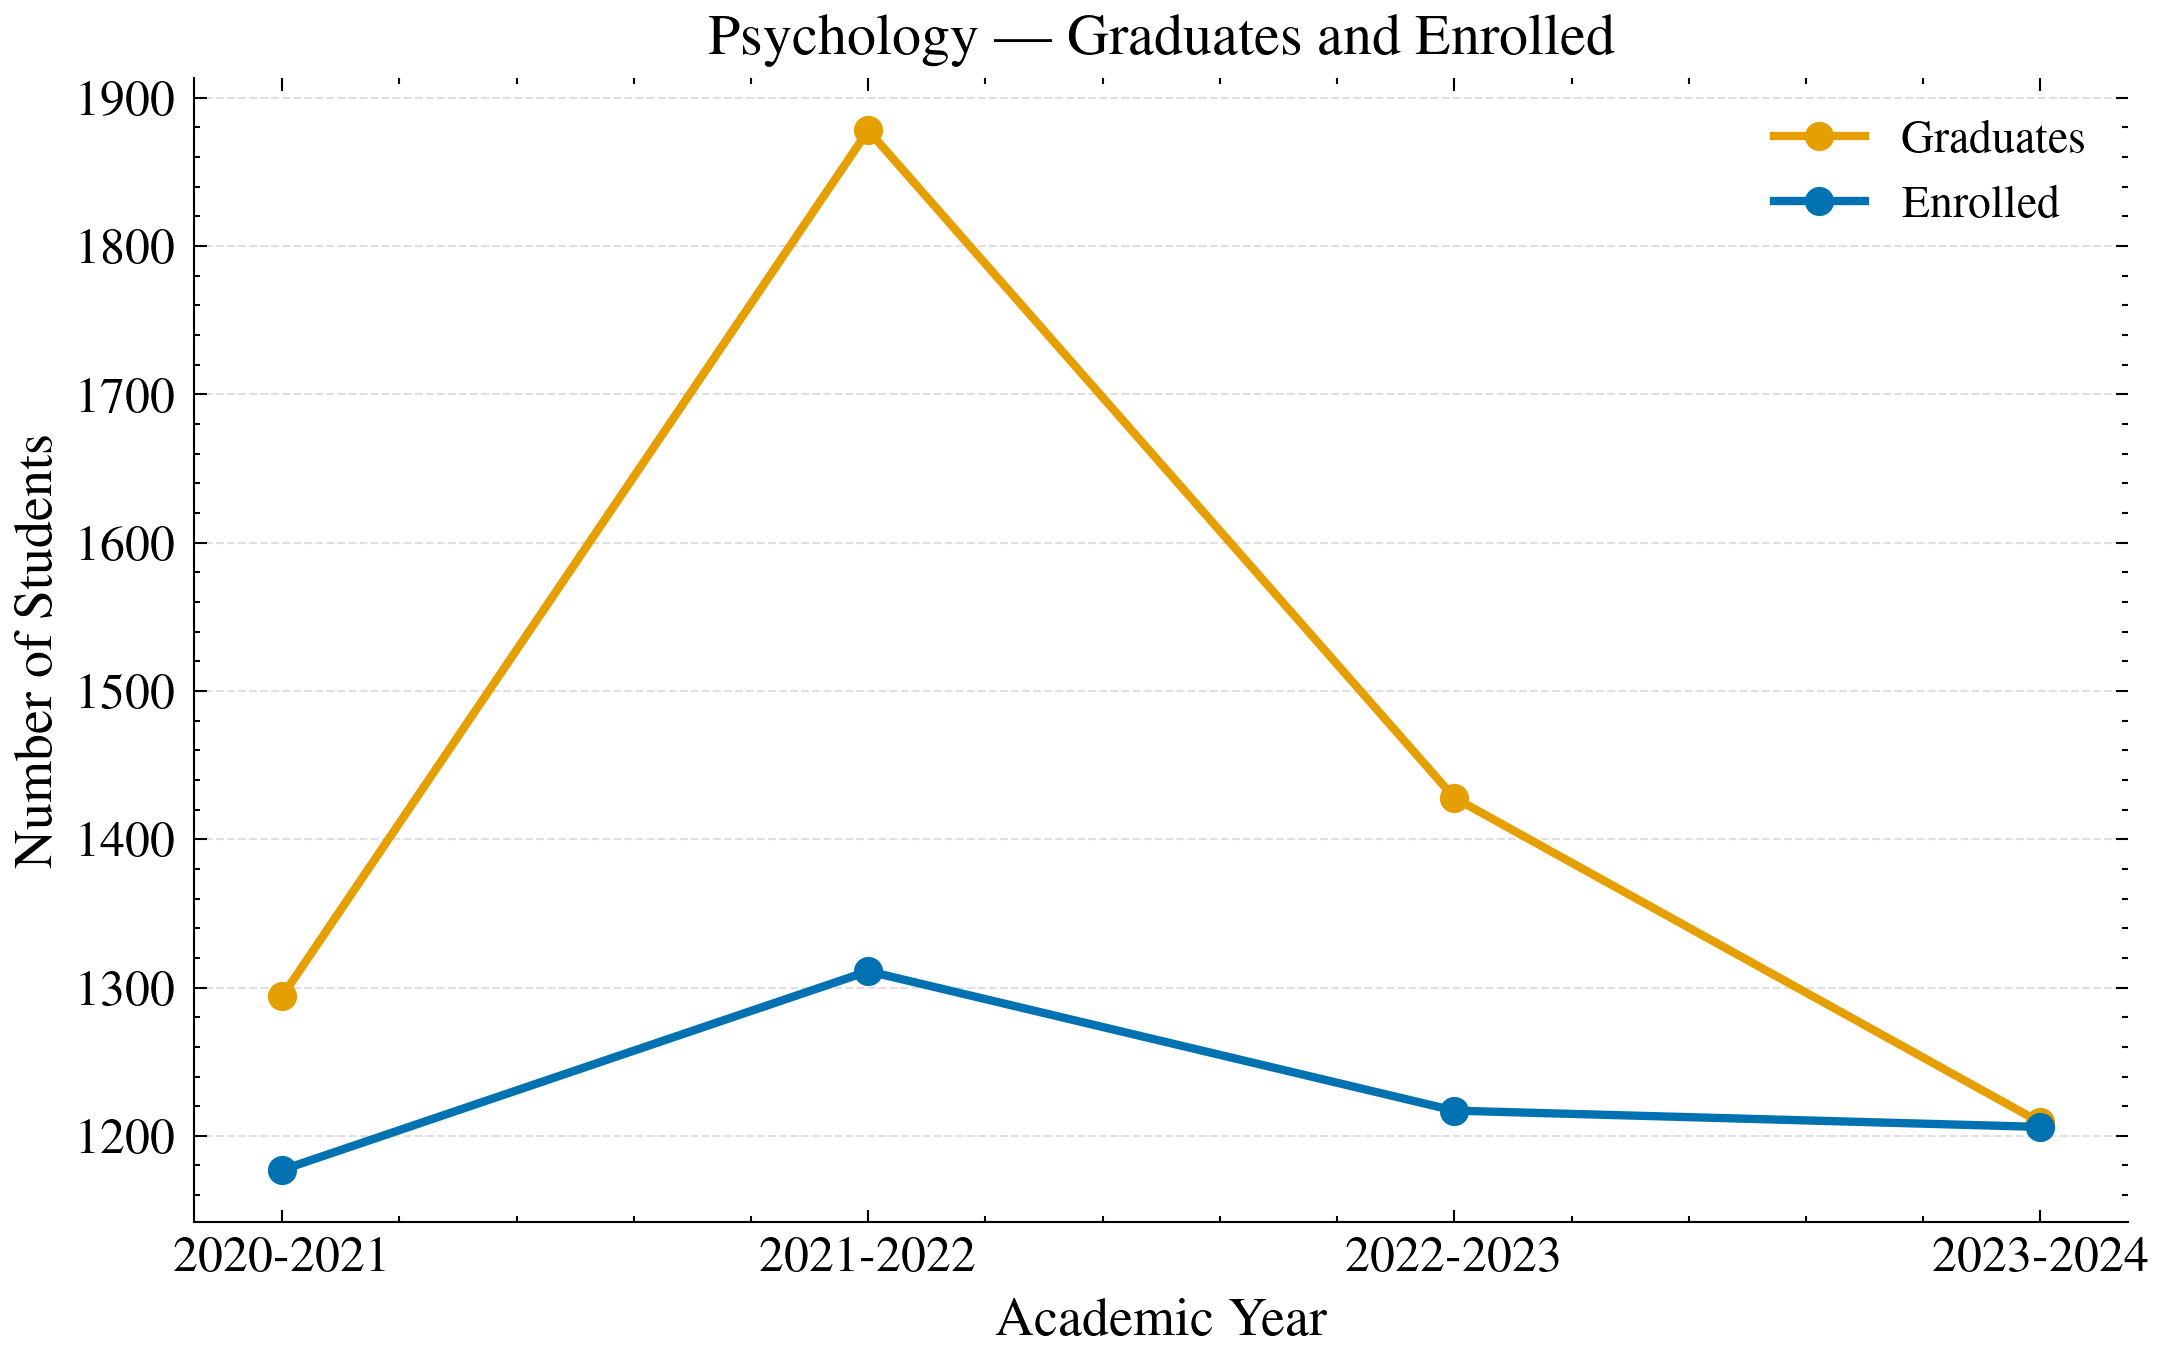

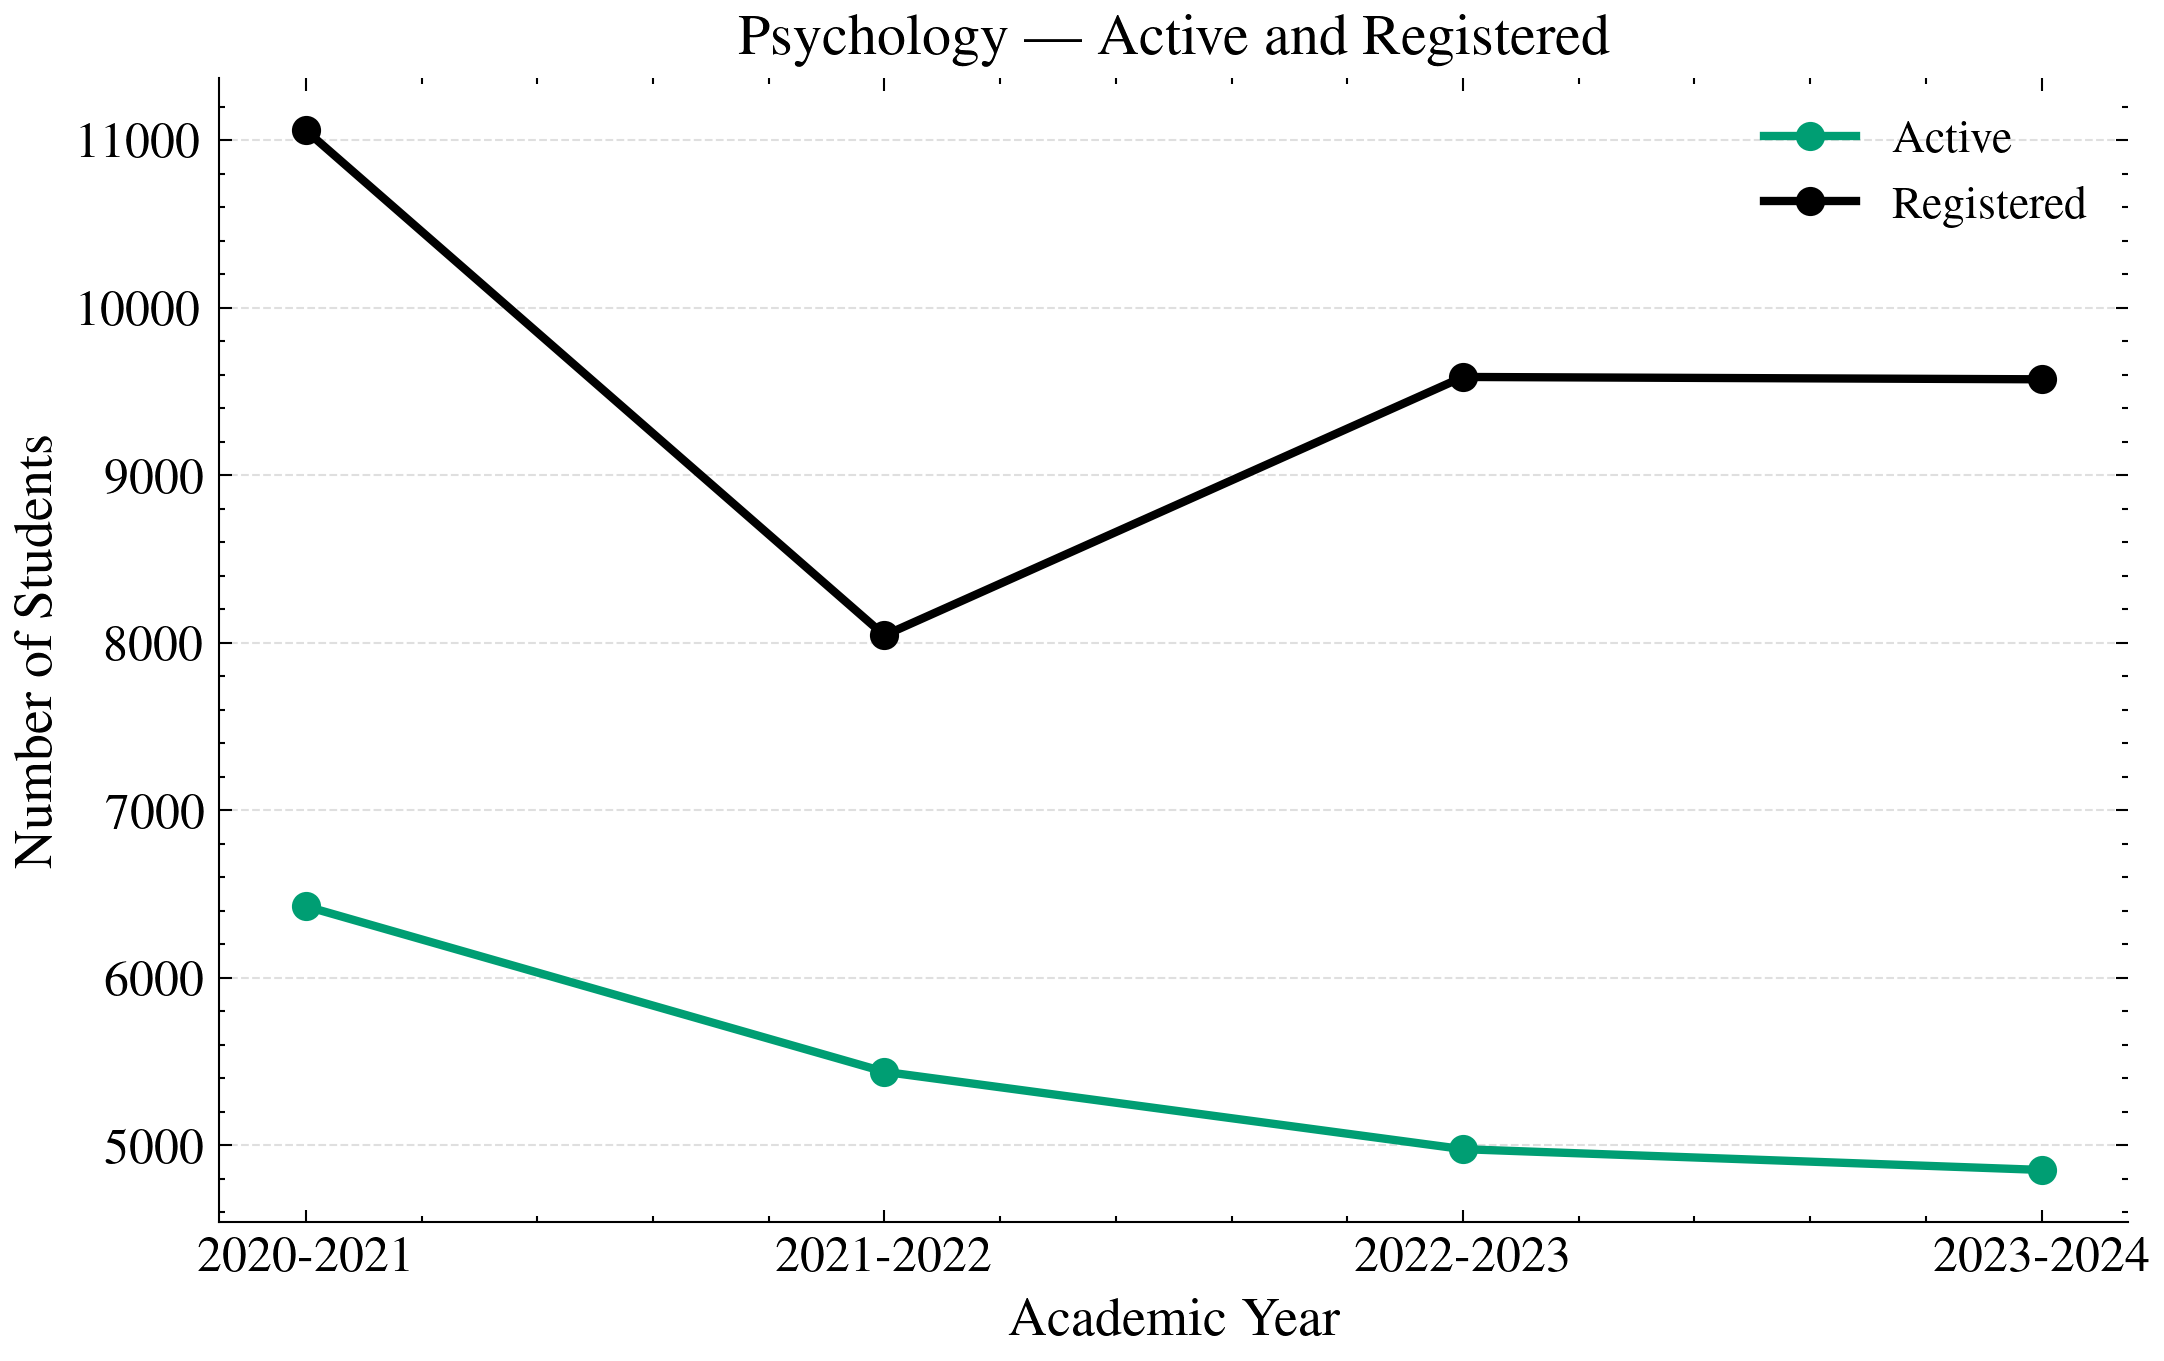

The number of Economics themed departments is 38


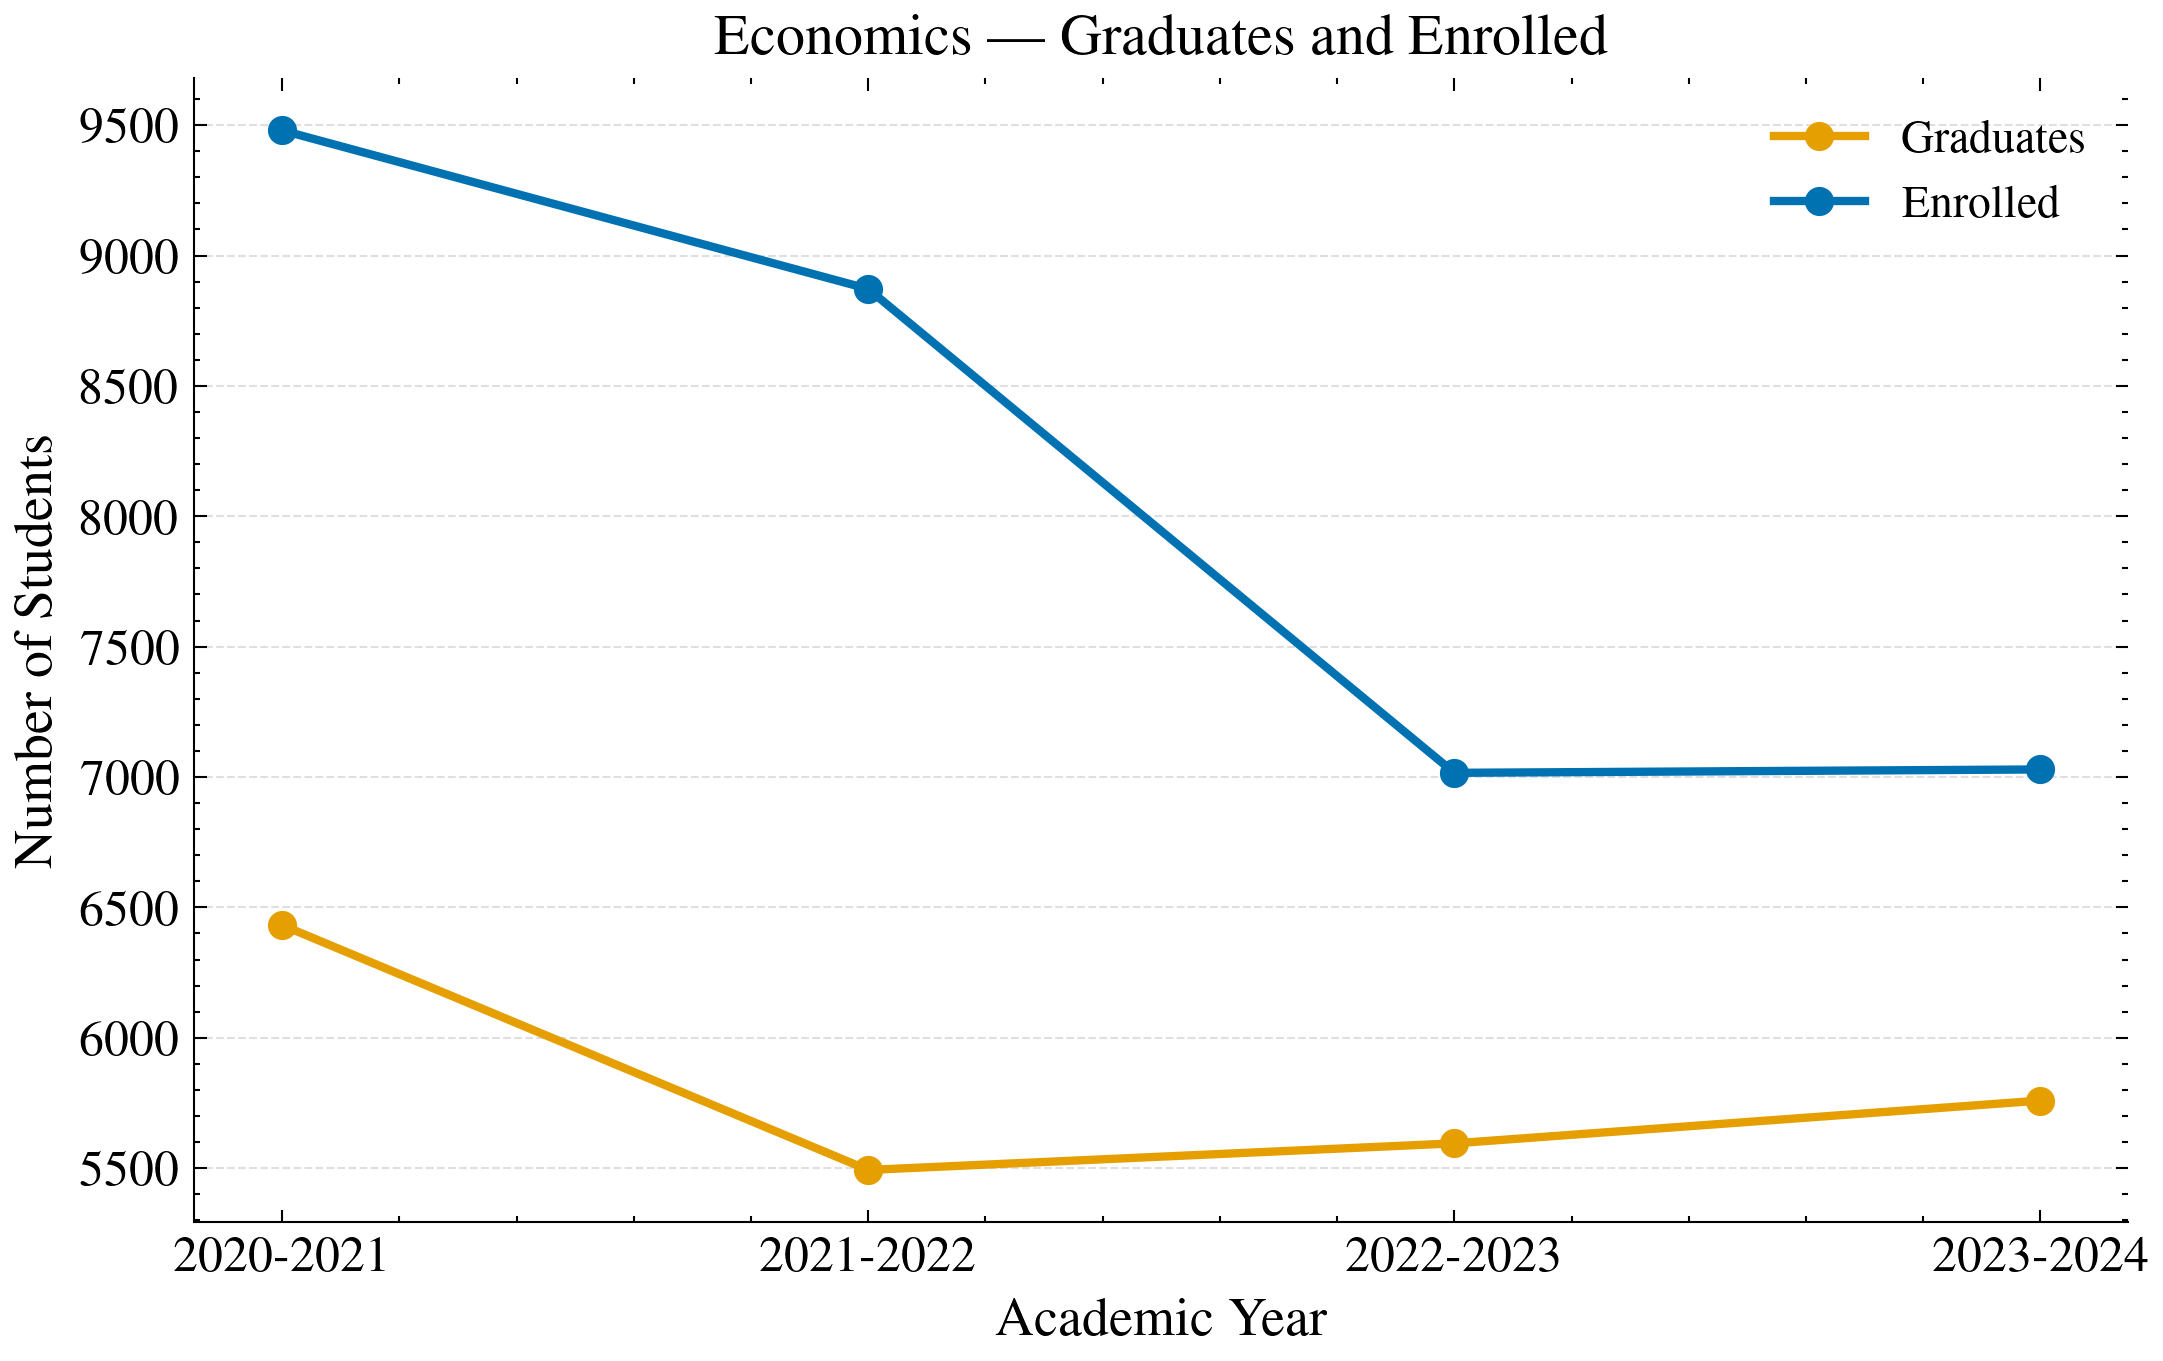

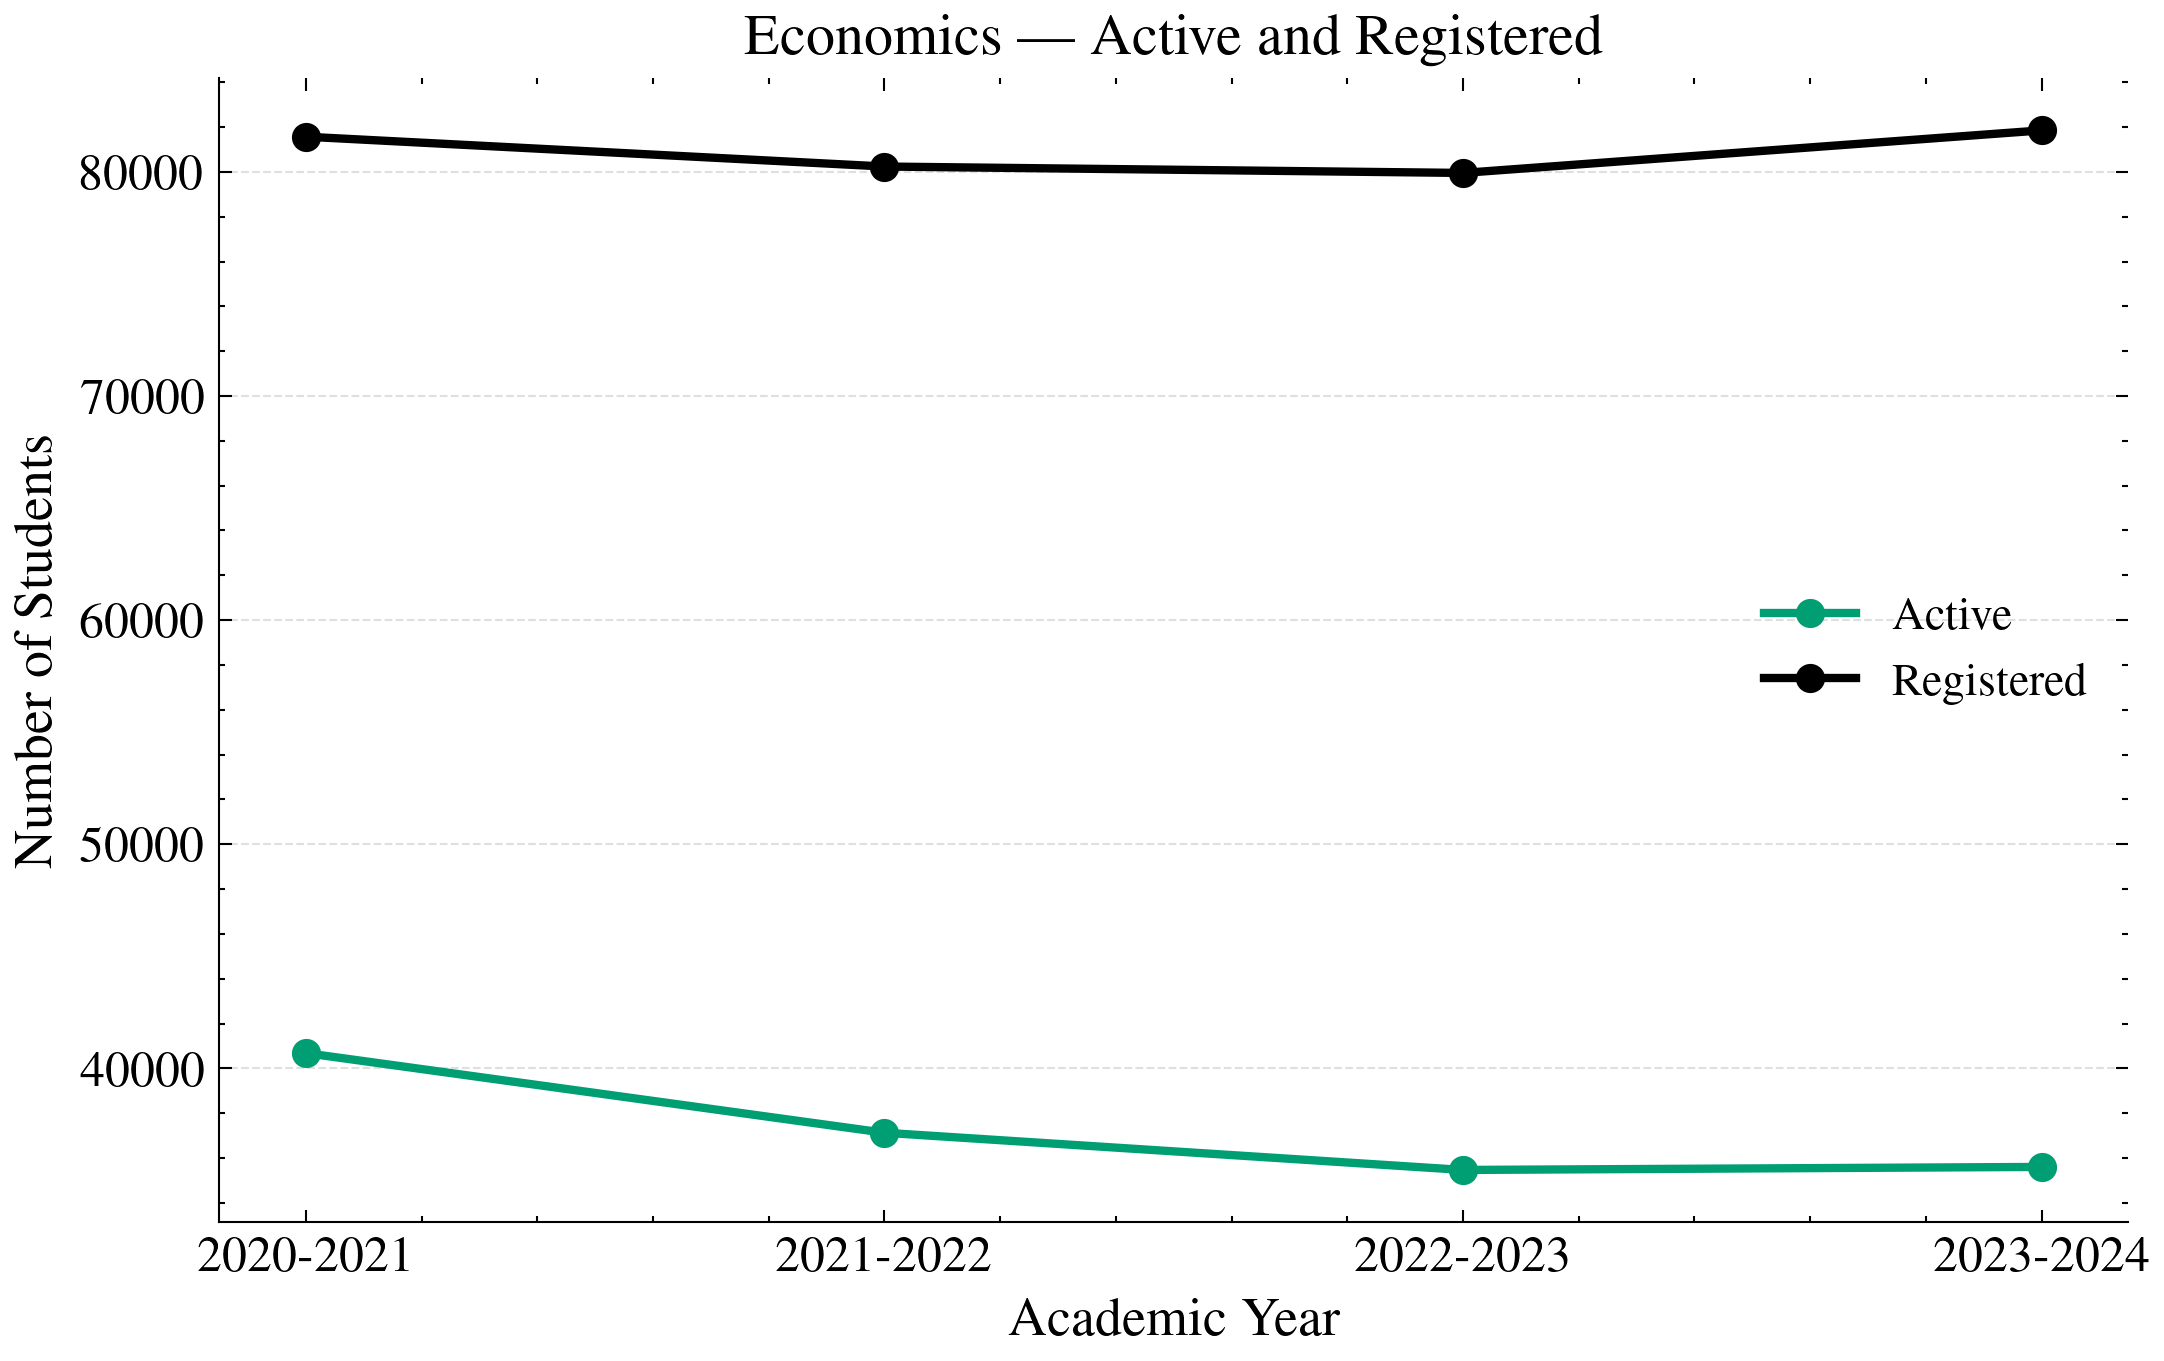

The number of Military Sciences themed departments is 3


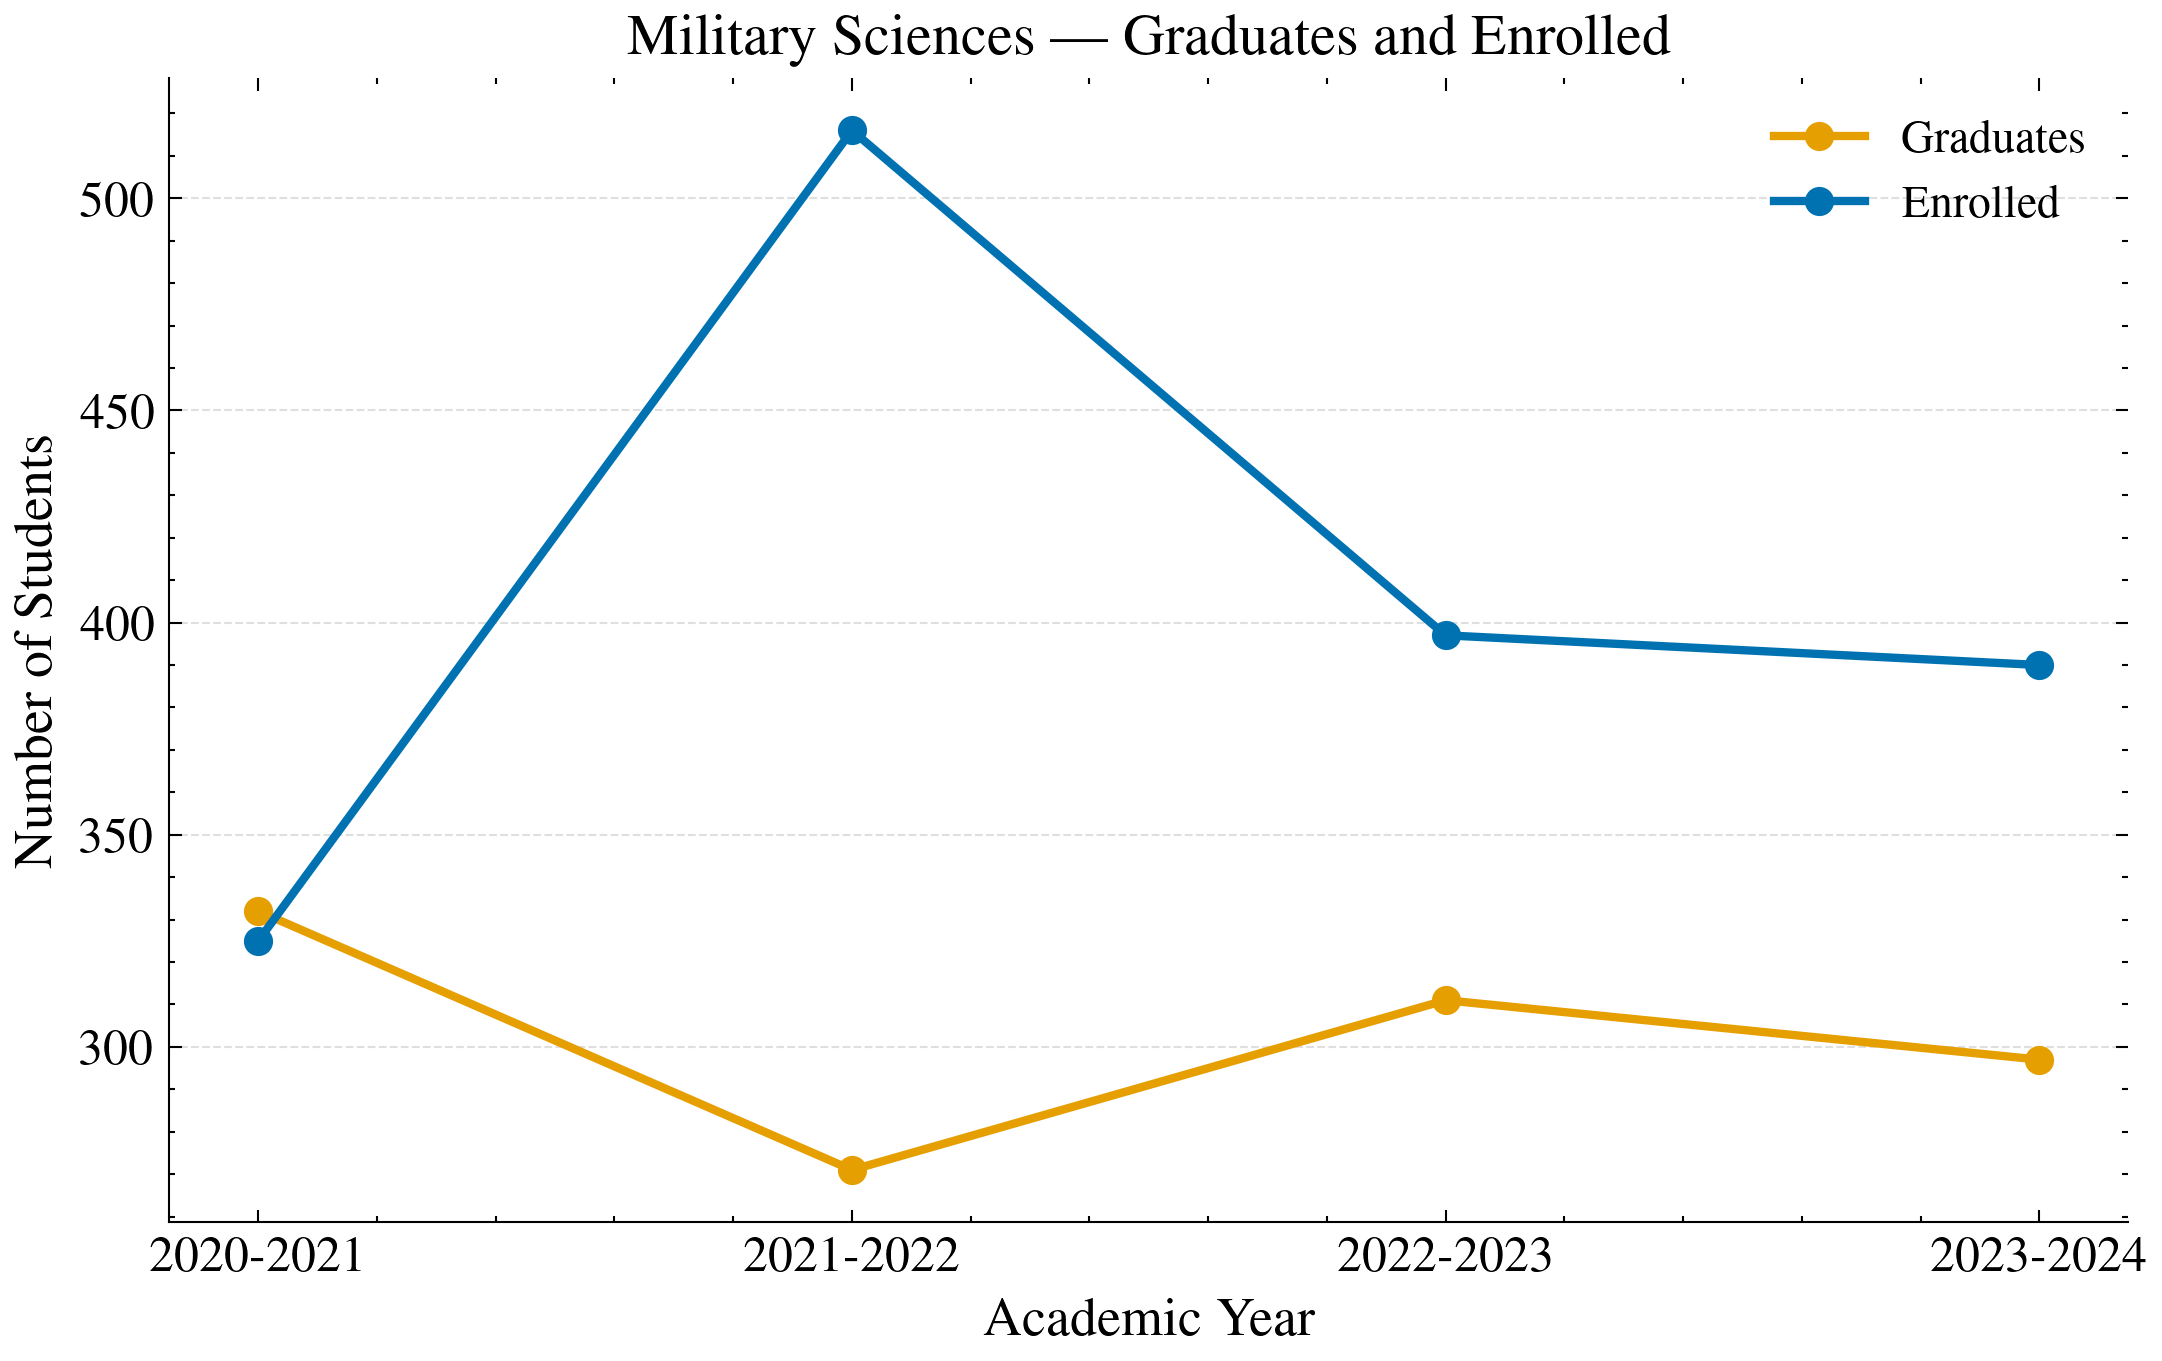

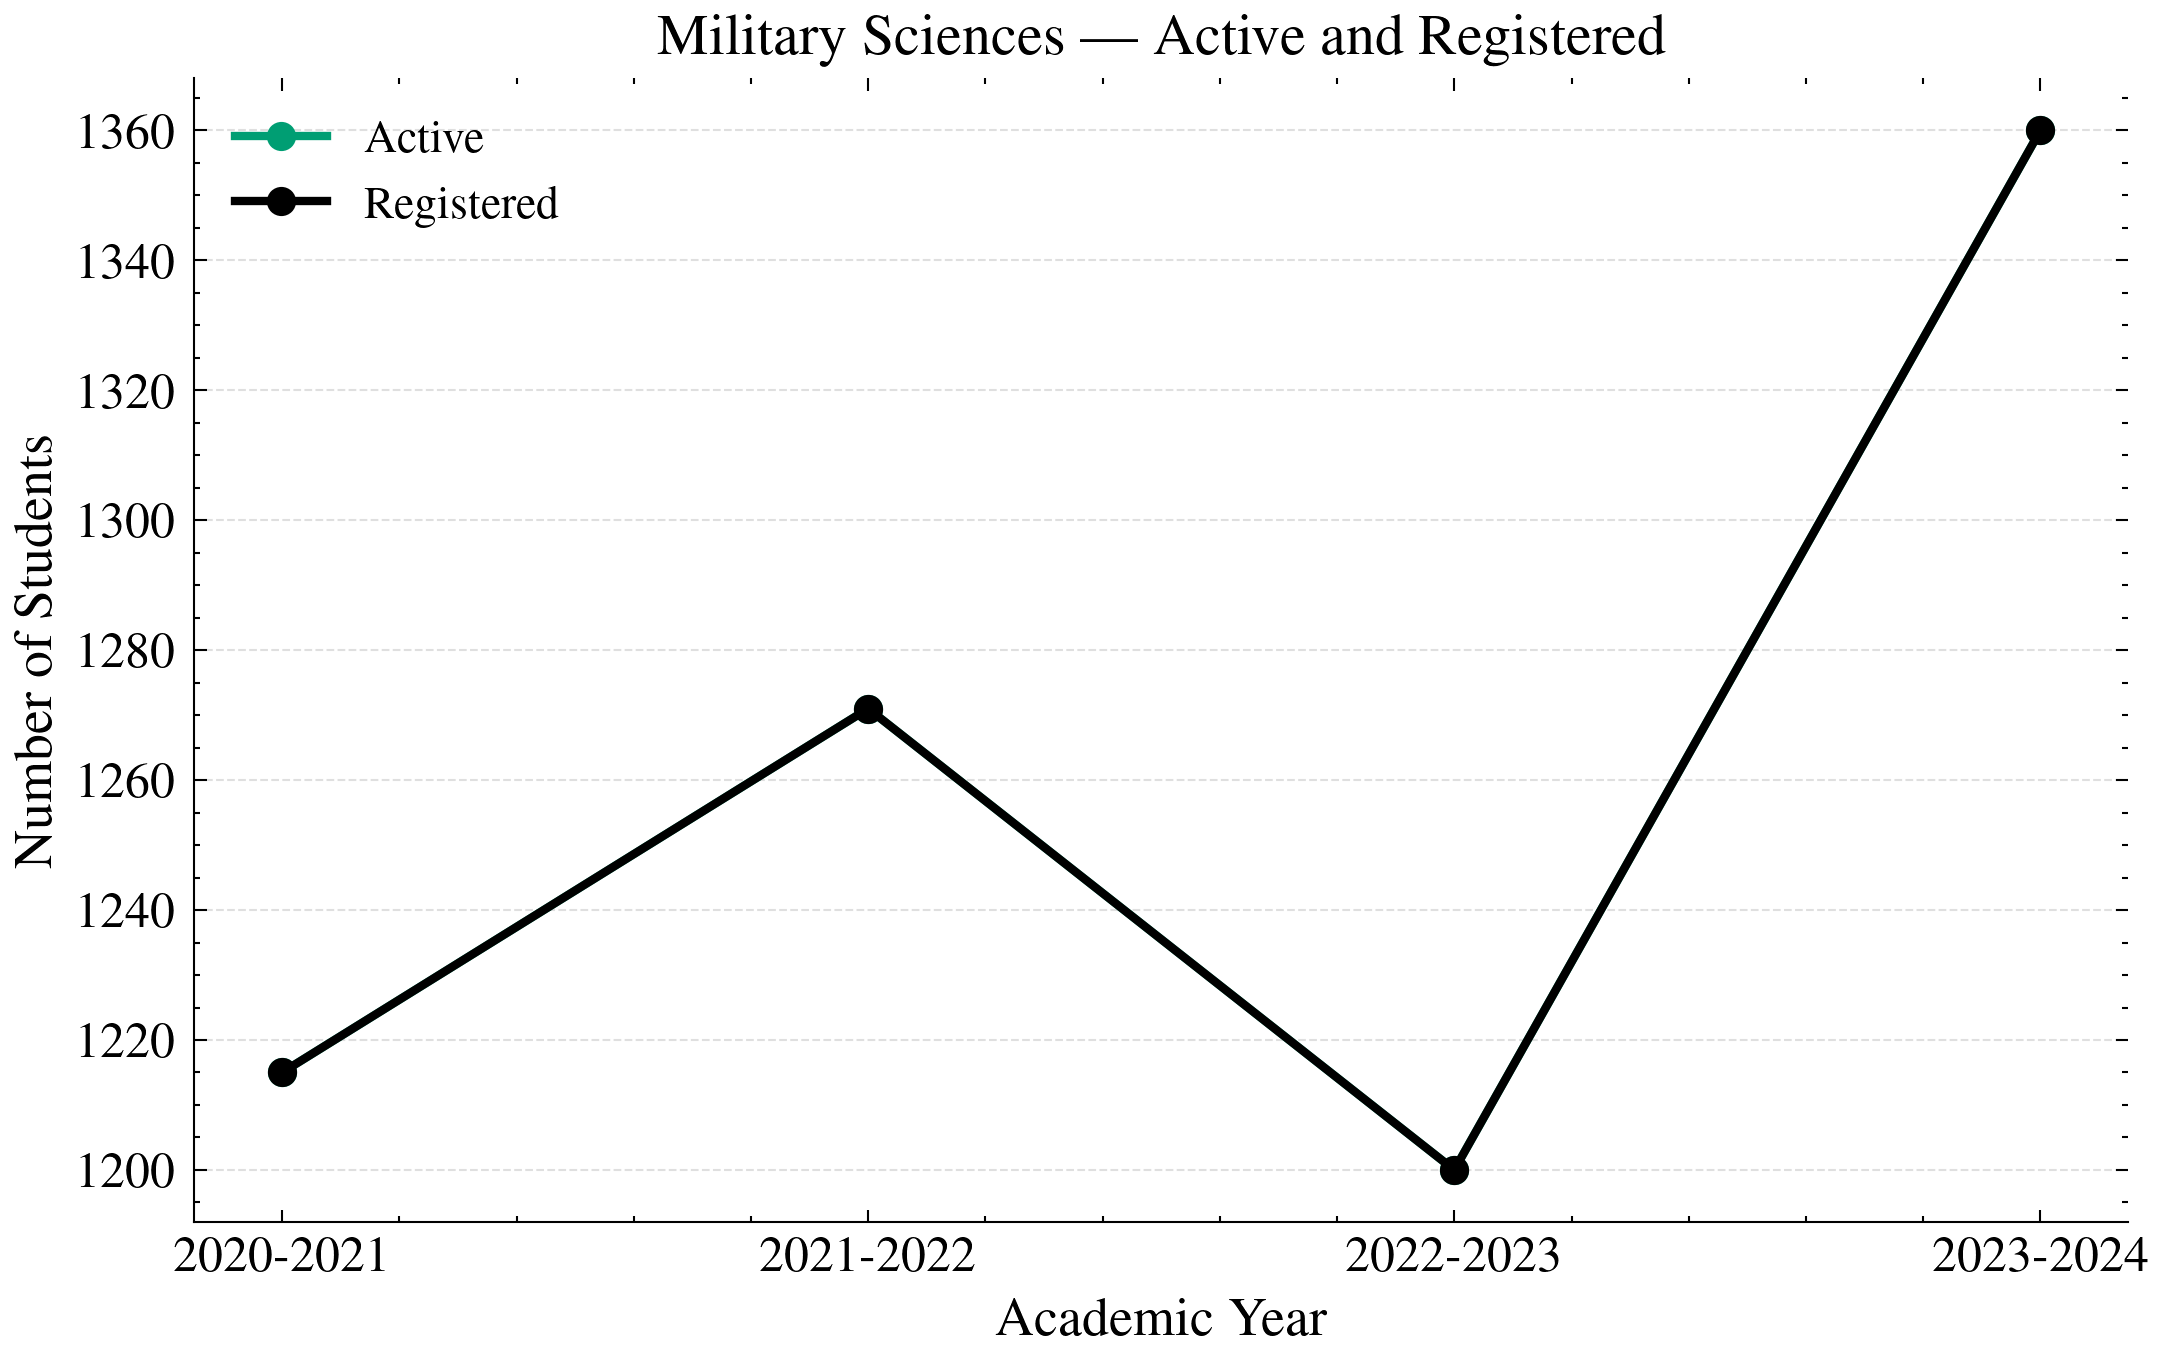

In [13]:
majors = [
    ["Law"],
    ["Informatics", "Computer Science"],
    ["Medicine"],
    ["Engineering"],
    ["Business"],
    ["Marketing", "Market"],
    ["Literature"],
    ["Psychology"],
    ["Economics", "Finance", "Financial", "Econom", "Accounting"],
    ["Military Sciences", "Aviation Sciences", "Naval Sciences"],
]

for m in majors:
    # plot_stats_by_major(m, df, YEARS)

    plot_stats_by_major(
        program_themes=m,
        df=df,
        years=YEARS,
    )

In [14]:
def compute_rate_by_year(
    df_filtered: pd.DataFrame, numerator: str, denominator: str, years: list
) -> pd.Series:
    """
    Compute percentage rate = numerator / denominator * 100
    aggregated by academic year.
    """

    summary = (
        df_filtered.groupby("academic_year", as_index=False)[[numerator, denominator]]
        .sum()
        .set_index("academic_year")
        .reindex(years)
    )

    rate = np.where(
        summary[denominator] > 0, (summary[numerator] / summary[denominator]) * 100, 0.0
    )

    return pd.Series(rate, index=years)

In [15]:
def plot_rate_by_major(
    rates: dict, years: list, ylabel: str, title: str, ylim: tuple, filename: str
):
    fig, ax = plt.subplots(figsize=(8.5, 5.5))

    for i, (major, rate_series) in enumerate(rates.items()):
        ax.plot(
            years,
            rate_series.values,
            marker="o",
            linewidth=2,
            color=COLORBLIND[i % len(COLORBLIND)],
            label=major,
        )

    ax.set_xlabel("Academic Year")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_ylim(*ylim)

    clean_axis(ax, grid_axis="y")
    ax.legend(frameon=False, loc="center left", bbox_to_anchor=(1.02, 0.5))

    fig.tight_layout()
    fig.savefig(os.path.join(OUT_DIR, f"{filename}.pdf"), bbox_inches="tight")
    fig.savefig(os.path.join(OUT_DIR, f"{filename}.pdf"), bbox_inches="tight")
    plt.show()

In [16]:
act_rates = {}
grad_rates = {}

for major in majors:
    theme_regex = "|".join(major)
    major_name = major[0]

    df_filtered = df[df["program"].str.contains(theme_regex, na=False, regex=True)]

    act_rates[major_name] = compute_rate_by_year(
        df_filtered, numerator="active", denominator="registered", years=YEARS
    )

    grad_rates[major_name] = compute_rate_by_year(
        df_filtered, numerator="graduate", denominator="active", years=YEARS
    )

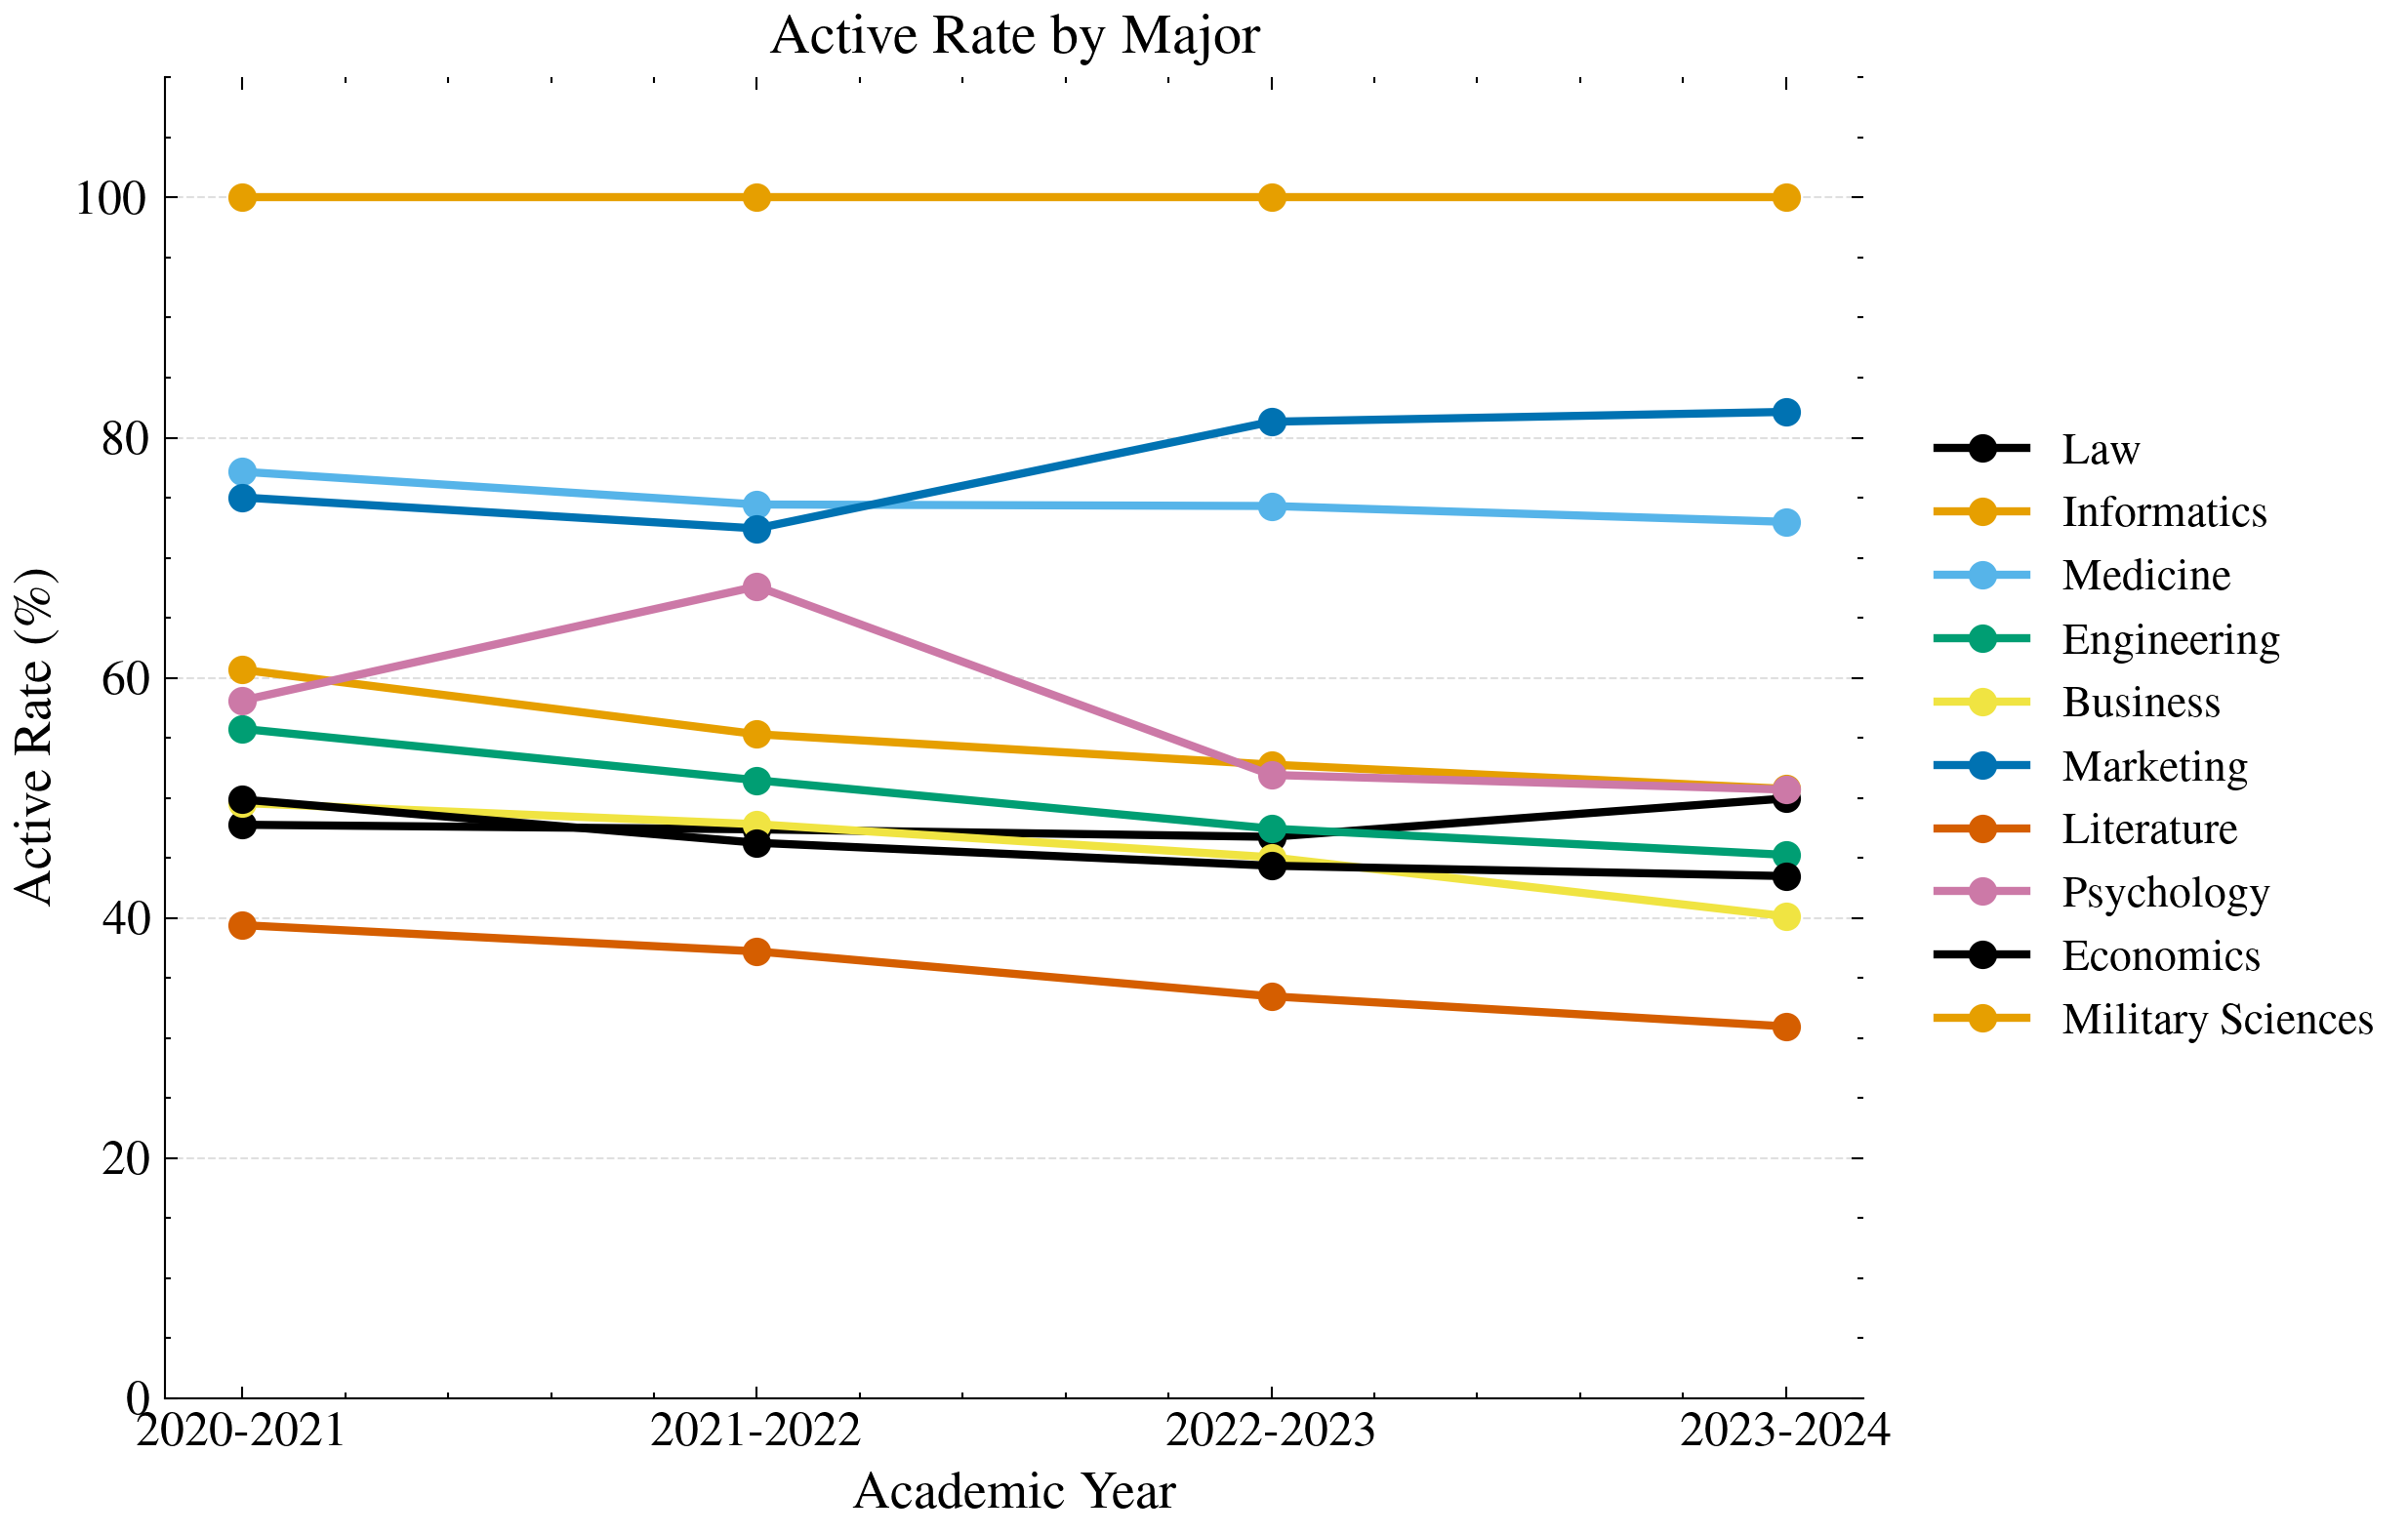

In [17]:
plot_rate_by_major(
    rates=act_rates,
    years=YEARS,
    ylabel="Active Rate (\\%)",
    title="Active Rate by Major",
    ylim=(0, 110),
    filename="active_rate_by_major",
)

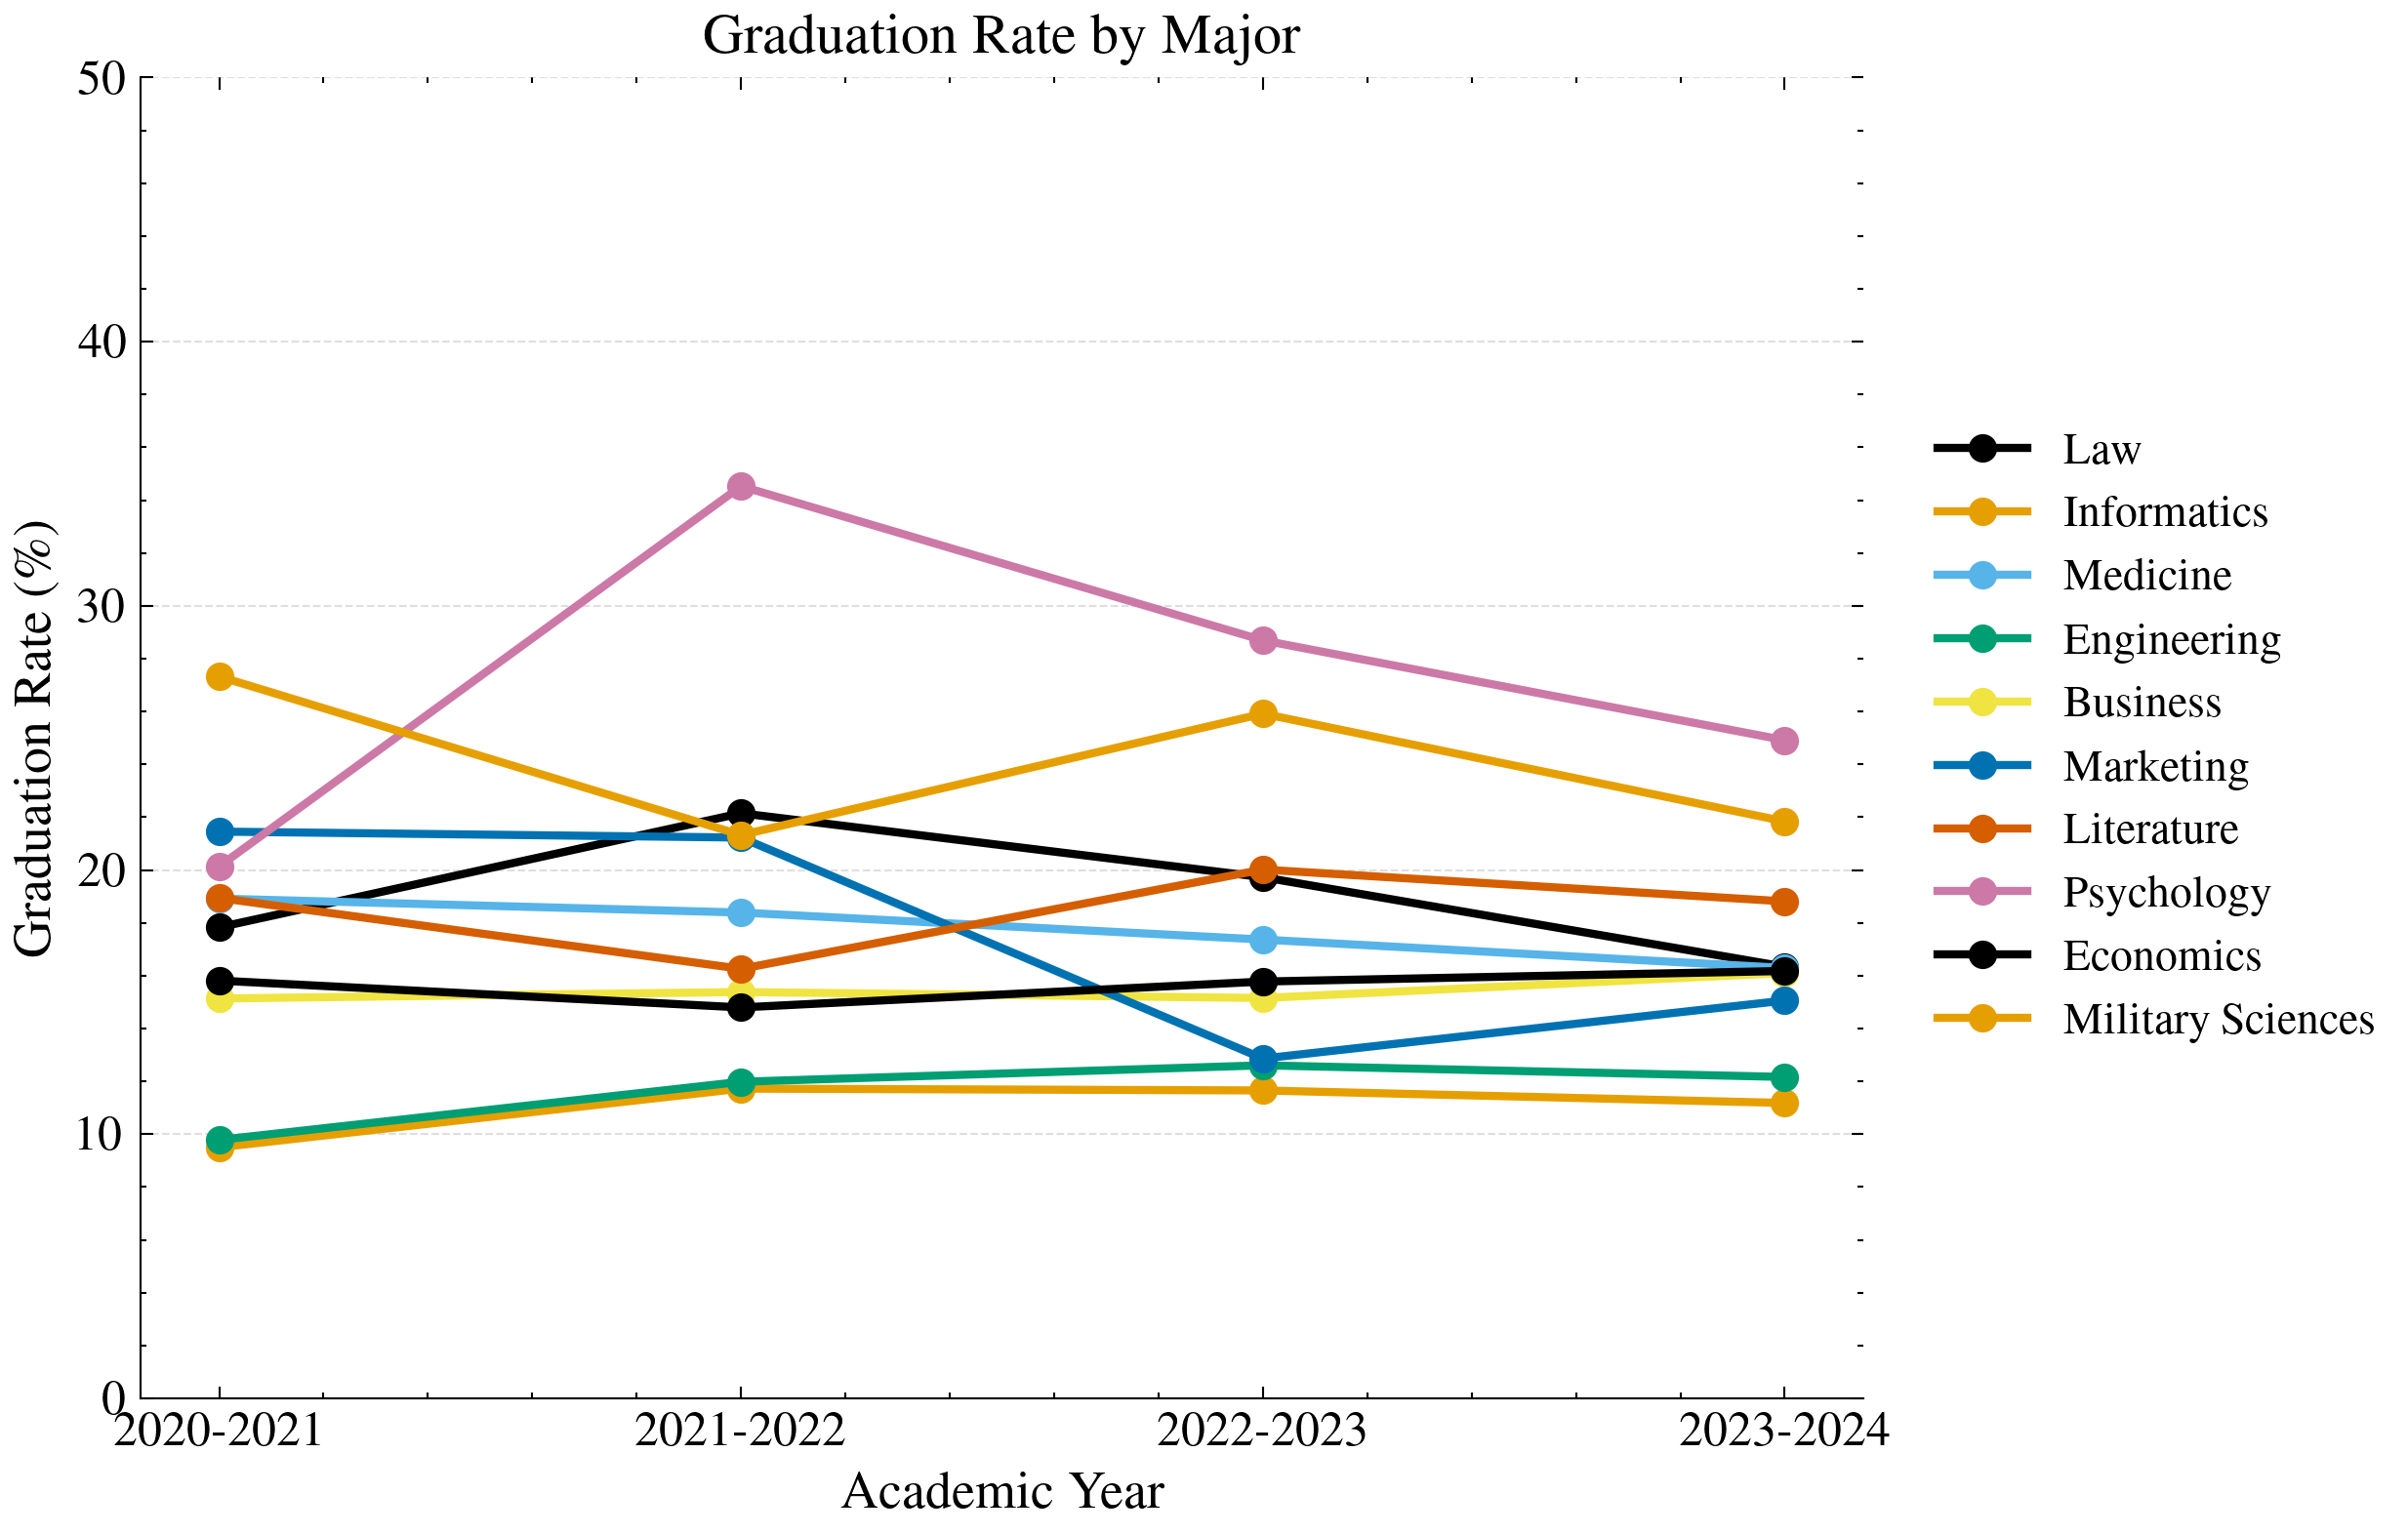

In [18]:
plot_rate_by_major(
    rates=grad_rates,
    years=YEARS,
    ylabel="Graduation Rate (\\%)",
    title="Graduation Rate by Major",
    ylim=(0, 50),
    filename="graduation_rate_by_major",
)

In [19]:
def prepare_grouped_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepare institution-level yearly aggregates.
    """

    df = df.copy()

    df["established"] = pd.to_datetime(
        df["established"], format="%d/%m/%Y", errors="coerce"
    )

    grouped = df.groupby(["institution", "academic_year"], as_index=False).agg(
        established=("established", "min"),
        programs=("program", "count"),
        graduate=("graduate", "sum"),
        registered=("registered", "sum"),
        enrolled=("enrolled", "sum"),
        active=("active", "sum"),
    )

    return grouped

In [20]:
df_grouped = prepare_grouped_dataset(df)

In [21]:
def compute_topk_share(df: pd.DataFrame, metric: str, k: int = 6):
    """
    Compute top-k institutions + 'Other' share (percentage).
    """

    total = df[metric].sum()

    topk = df.sort_values(metric, ascending=False).head(k)
    rest = df.sort_values(metric, ascending=False).iloc[k:]

    labels = list(topk["institution"]) + ["Other"]
    values = list(topk[metric]) + [rest[metric].sum()]

    percentages = [(v / total) * 100 if total > 0 else 0 for v in values]

    return labels, percentages

In [22]:
def wrap_label(label: str, words_per_line: int = 3) -> str:
    words = label.split()
    return "\n".join(
        " ".join(words[i : i + words_per_line])
        for i in range(0, len(words), words_per_line)
    )

In [23]:
def plot_institution_metric_panels(
    df: pd.DataFrame,
    years: list,
    metrics: list,
    top_k: int = 6,
    output_prefix: str = "fig",
):
    """
    Multi-panel horizontal bar plots:
    Rows    → Academic years
    Columns → Metrics
    """

    n_years = len(years)
    n_metrics = len(metrics)

    fig, axes = plt.subplots(
        n_years, n_metrics, figsize=(5.8 * n_metrics, 4.8 * n_years), sharex=False
    )

    if n_years == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, year in enumerate(years):
        df_year = df[df["academic_year"] == year]

        for j, metric in enumerate(metrics):
            ax = axes[i, j]

            labels, values = compute_topk_share(df_year, metric, k=top_k)

            y_pos = np.arange(len(labels))

            ax.barh(
                y_pos,
                values,
                color=COLORBLIND[j % len(COLORBLIND)],
                edgecolor="black",
                linewidth=0.4,
            )

            wrapped = [
                wrap_label(lbl, 2 if len(lbl.split()) == 3 else 3) for lbl in labels
            ]

            ax.set_yticks(y_pos)
            ax.set_yticklabels(wrapped)
            ax.invert_yaxis()

            for v, y in zip(values, y_pos):
                ax.text(v + 0.8, y, f"{v:.1f}%", va="center", fontsize=11)

            ax.set_title(f"{metric.title()} — {year}")
            ax.set_xlim(0, max(values) * 1.25)

            clean_axis(ax, grid_axis="x")

    fig.tight_layout()
    fig.savefig(os.path.join(OUT_DIR, f"{output_prefix}_institution_metrics.pdf"), bbox_inches="tight")
    fig.savefig(os.path.join(OUT_DIR, f"{output_prefix}_institution_metrics.png"), bbox_inches="tight")
    plt.show()

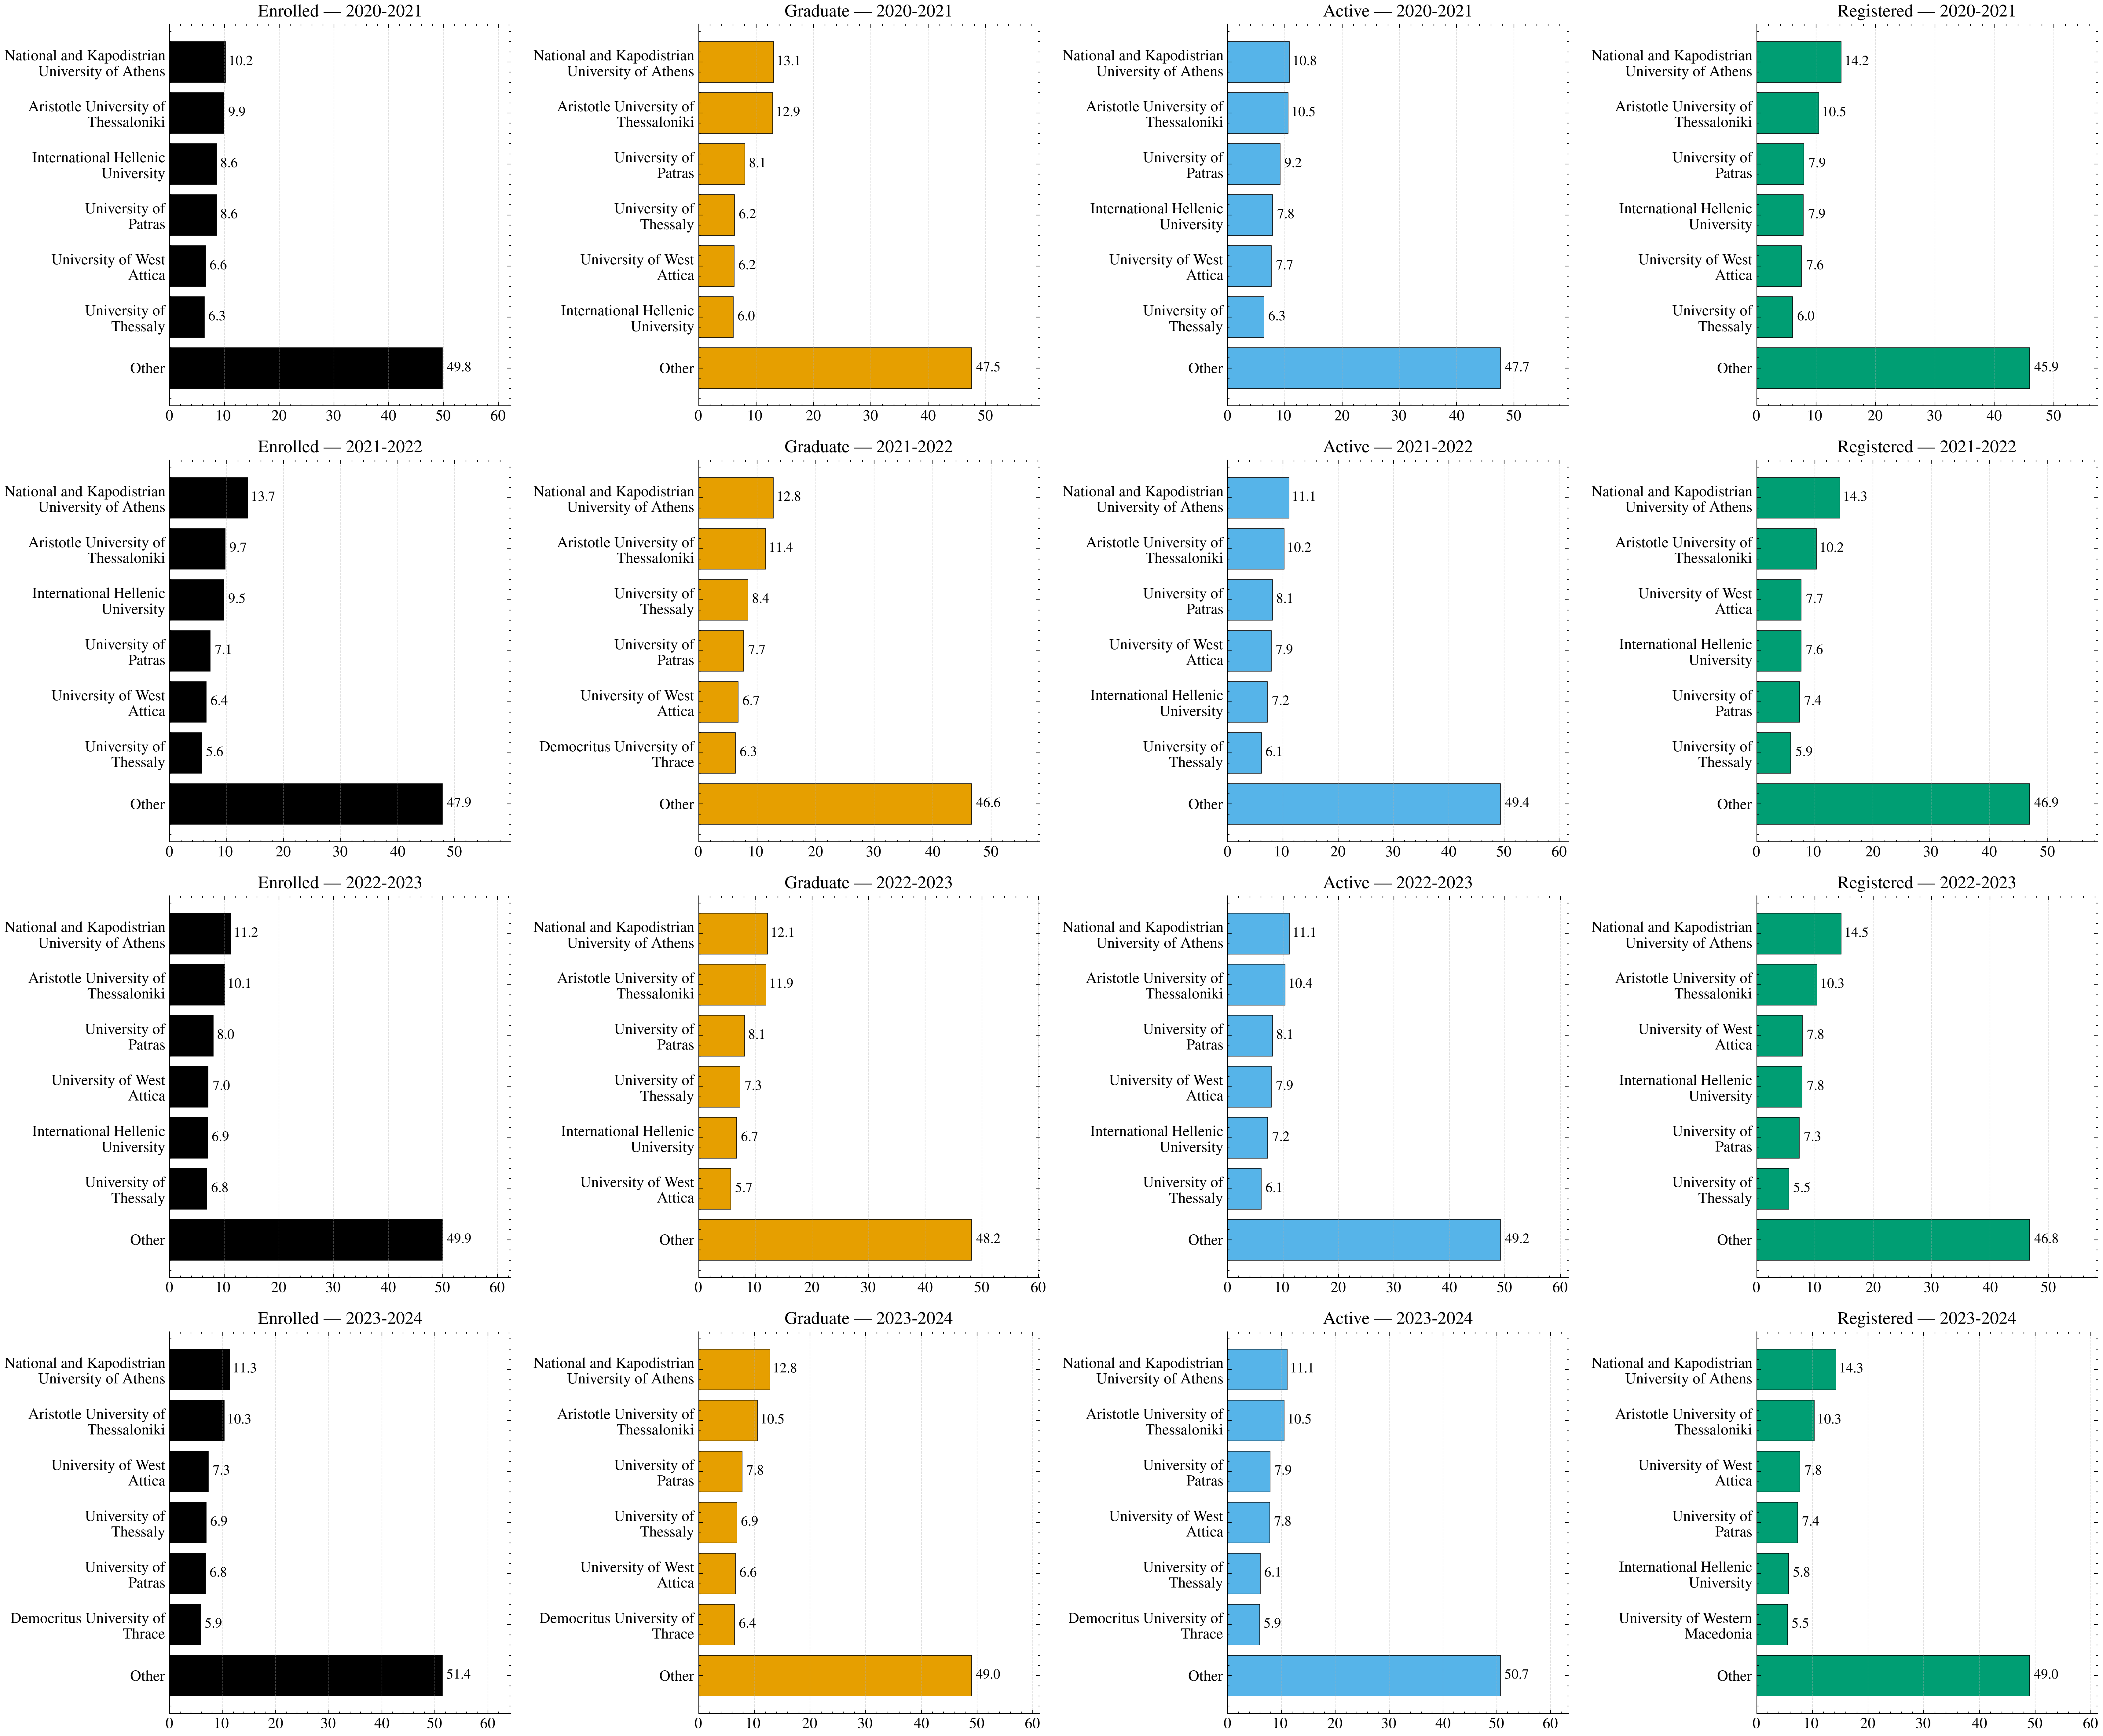

In [24]:
plot_institution_metric_panels(
    df=df_grouped,
    years=YEARS,
    metrics=METRICS,
    top_k=6,
    output_prefix="institution_share",
)

In [25]:
def add_rates(df):
    df = df.copy()

    df["active_rate"] = np.where(
        df["registered"] > 0, (df["active"] / df["registered"]) * 100, 0
    )

    df["graduate_rate"] = np.where(
        df["active"] > 0, (df["graduate"] / df["active"]) * 100, 0
    )

    return df


df_grouped_rates = add_rates(df_grouped)

In [26]:
def plot_rate_by_year(df, rate_col, title_prefix, x_label="Percentage"):
    if rate_col == "graduate_rate":
        color = COLORBLIND[1]
    elif rate_col == "active_rate":
        color = COLORBLIND[3]

    n_years = len(YEARS)
    n_cols = 2
    n_rows = int(np.ceil(n_years / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
    axes = axes.flatten()

    for ax, year in zip(axes, YEARS):
        df_filtered = df[df["academic_year"] == year].sort_values(
            by=rate_col, ascending=False
        )

        y_pos = np.arange(len(df_filtered))

        bars = ax.barh(y_pos, df_filtered[rate_col], align="center", color=color)

        ax.set_yticks(y_pos)
        ax.set_yticklabels(df_filtered["institution"])
        ax.invert_yaxis()
        ax.set_xlabel(x_label)
        ax.set_title(f"{title_prefix} – {year}")
        ax.grid(axis="x", linestyle="--", alpha=0.4)

        # Annotate bars
        for bar in bars:
            width = bar.get_width()
            ax.text(
                width + 0.5,
                bar.get_y() + bar.get_height() / 2,
                f"{width:.1f}%",
                va="center",
                fontsize=9,
            )

        max_value = df_filtered[rate_col].max()
        ax.set_xlim(0, max_value * 1.15 if max_value > 0 else 1)

    # Hide unused axes
    for ax in axes[len(YEARS) :]:
        ax.axis("off")
    fig.savefig(os.path.join(OUT_DIR, f"{rate_col}_all.pdf"), bbox_inches="tight")
    fig.savefig(os.path.join(OUT_DIR, f"{rate_col}_all.png"), bbox_inches="tight")
    plt.tight_layout()
    plt.show()

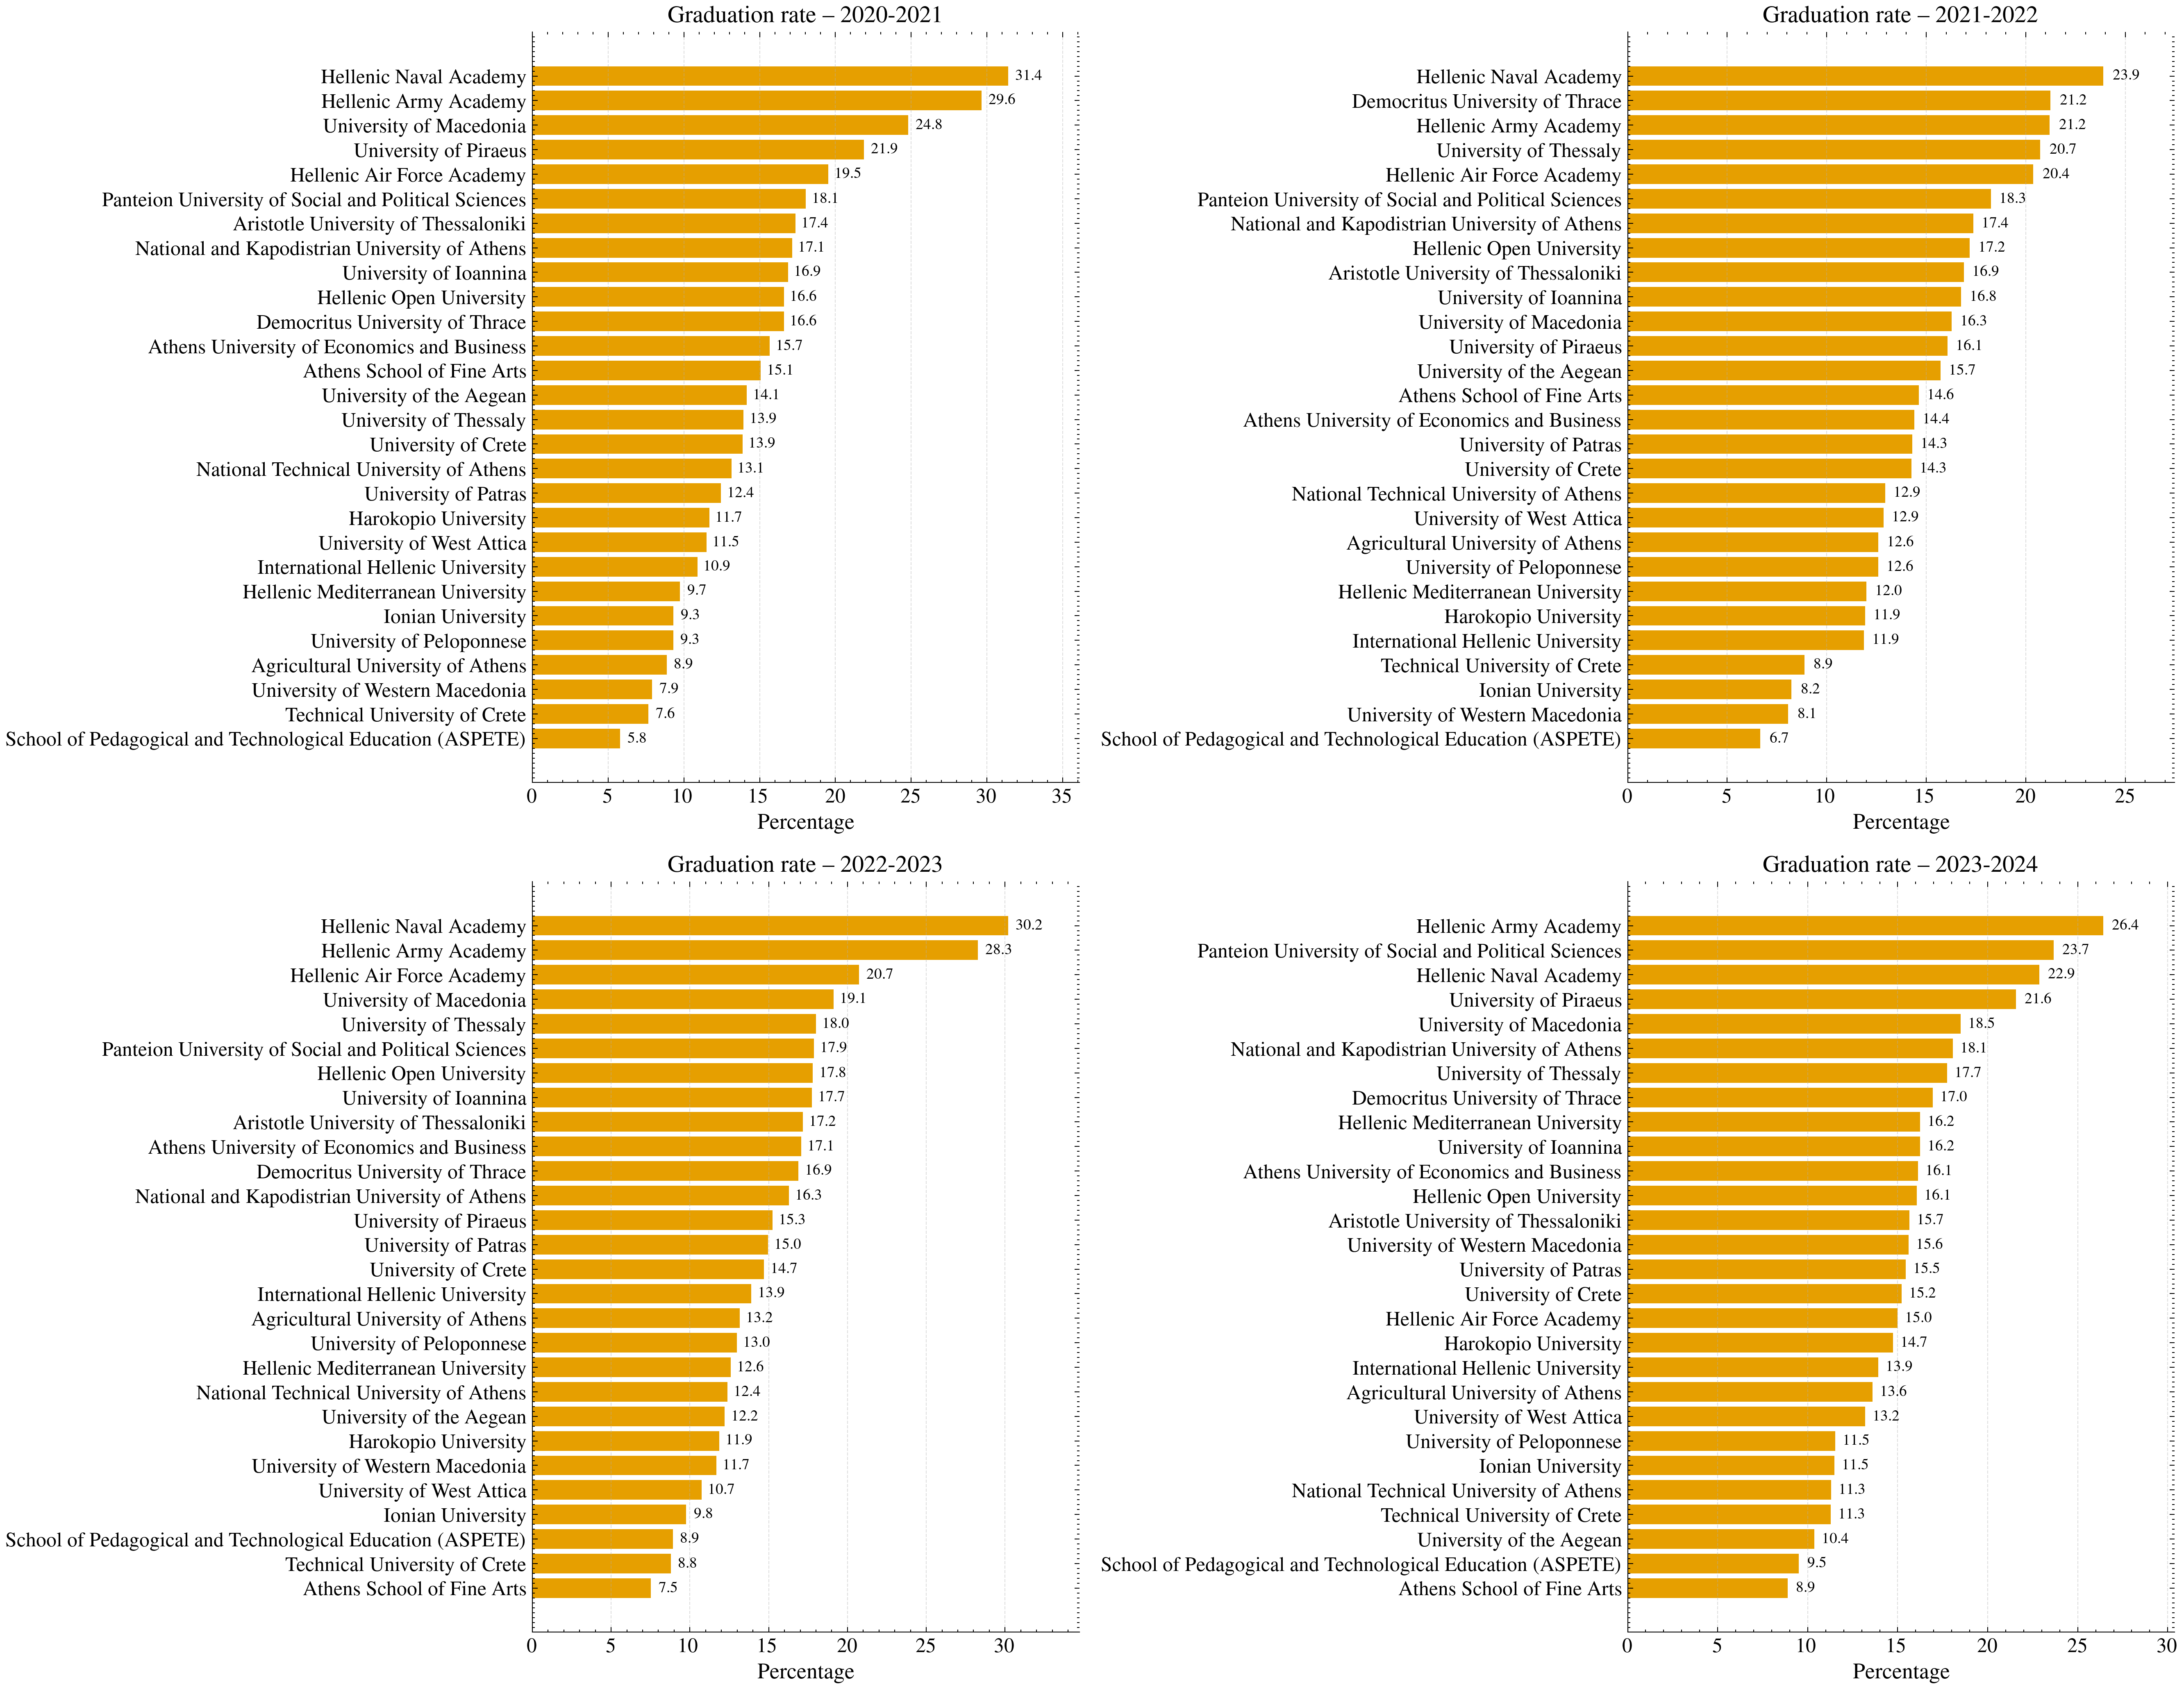

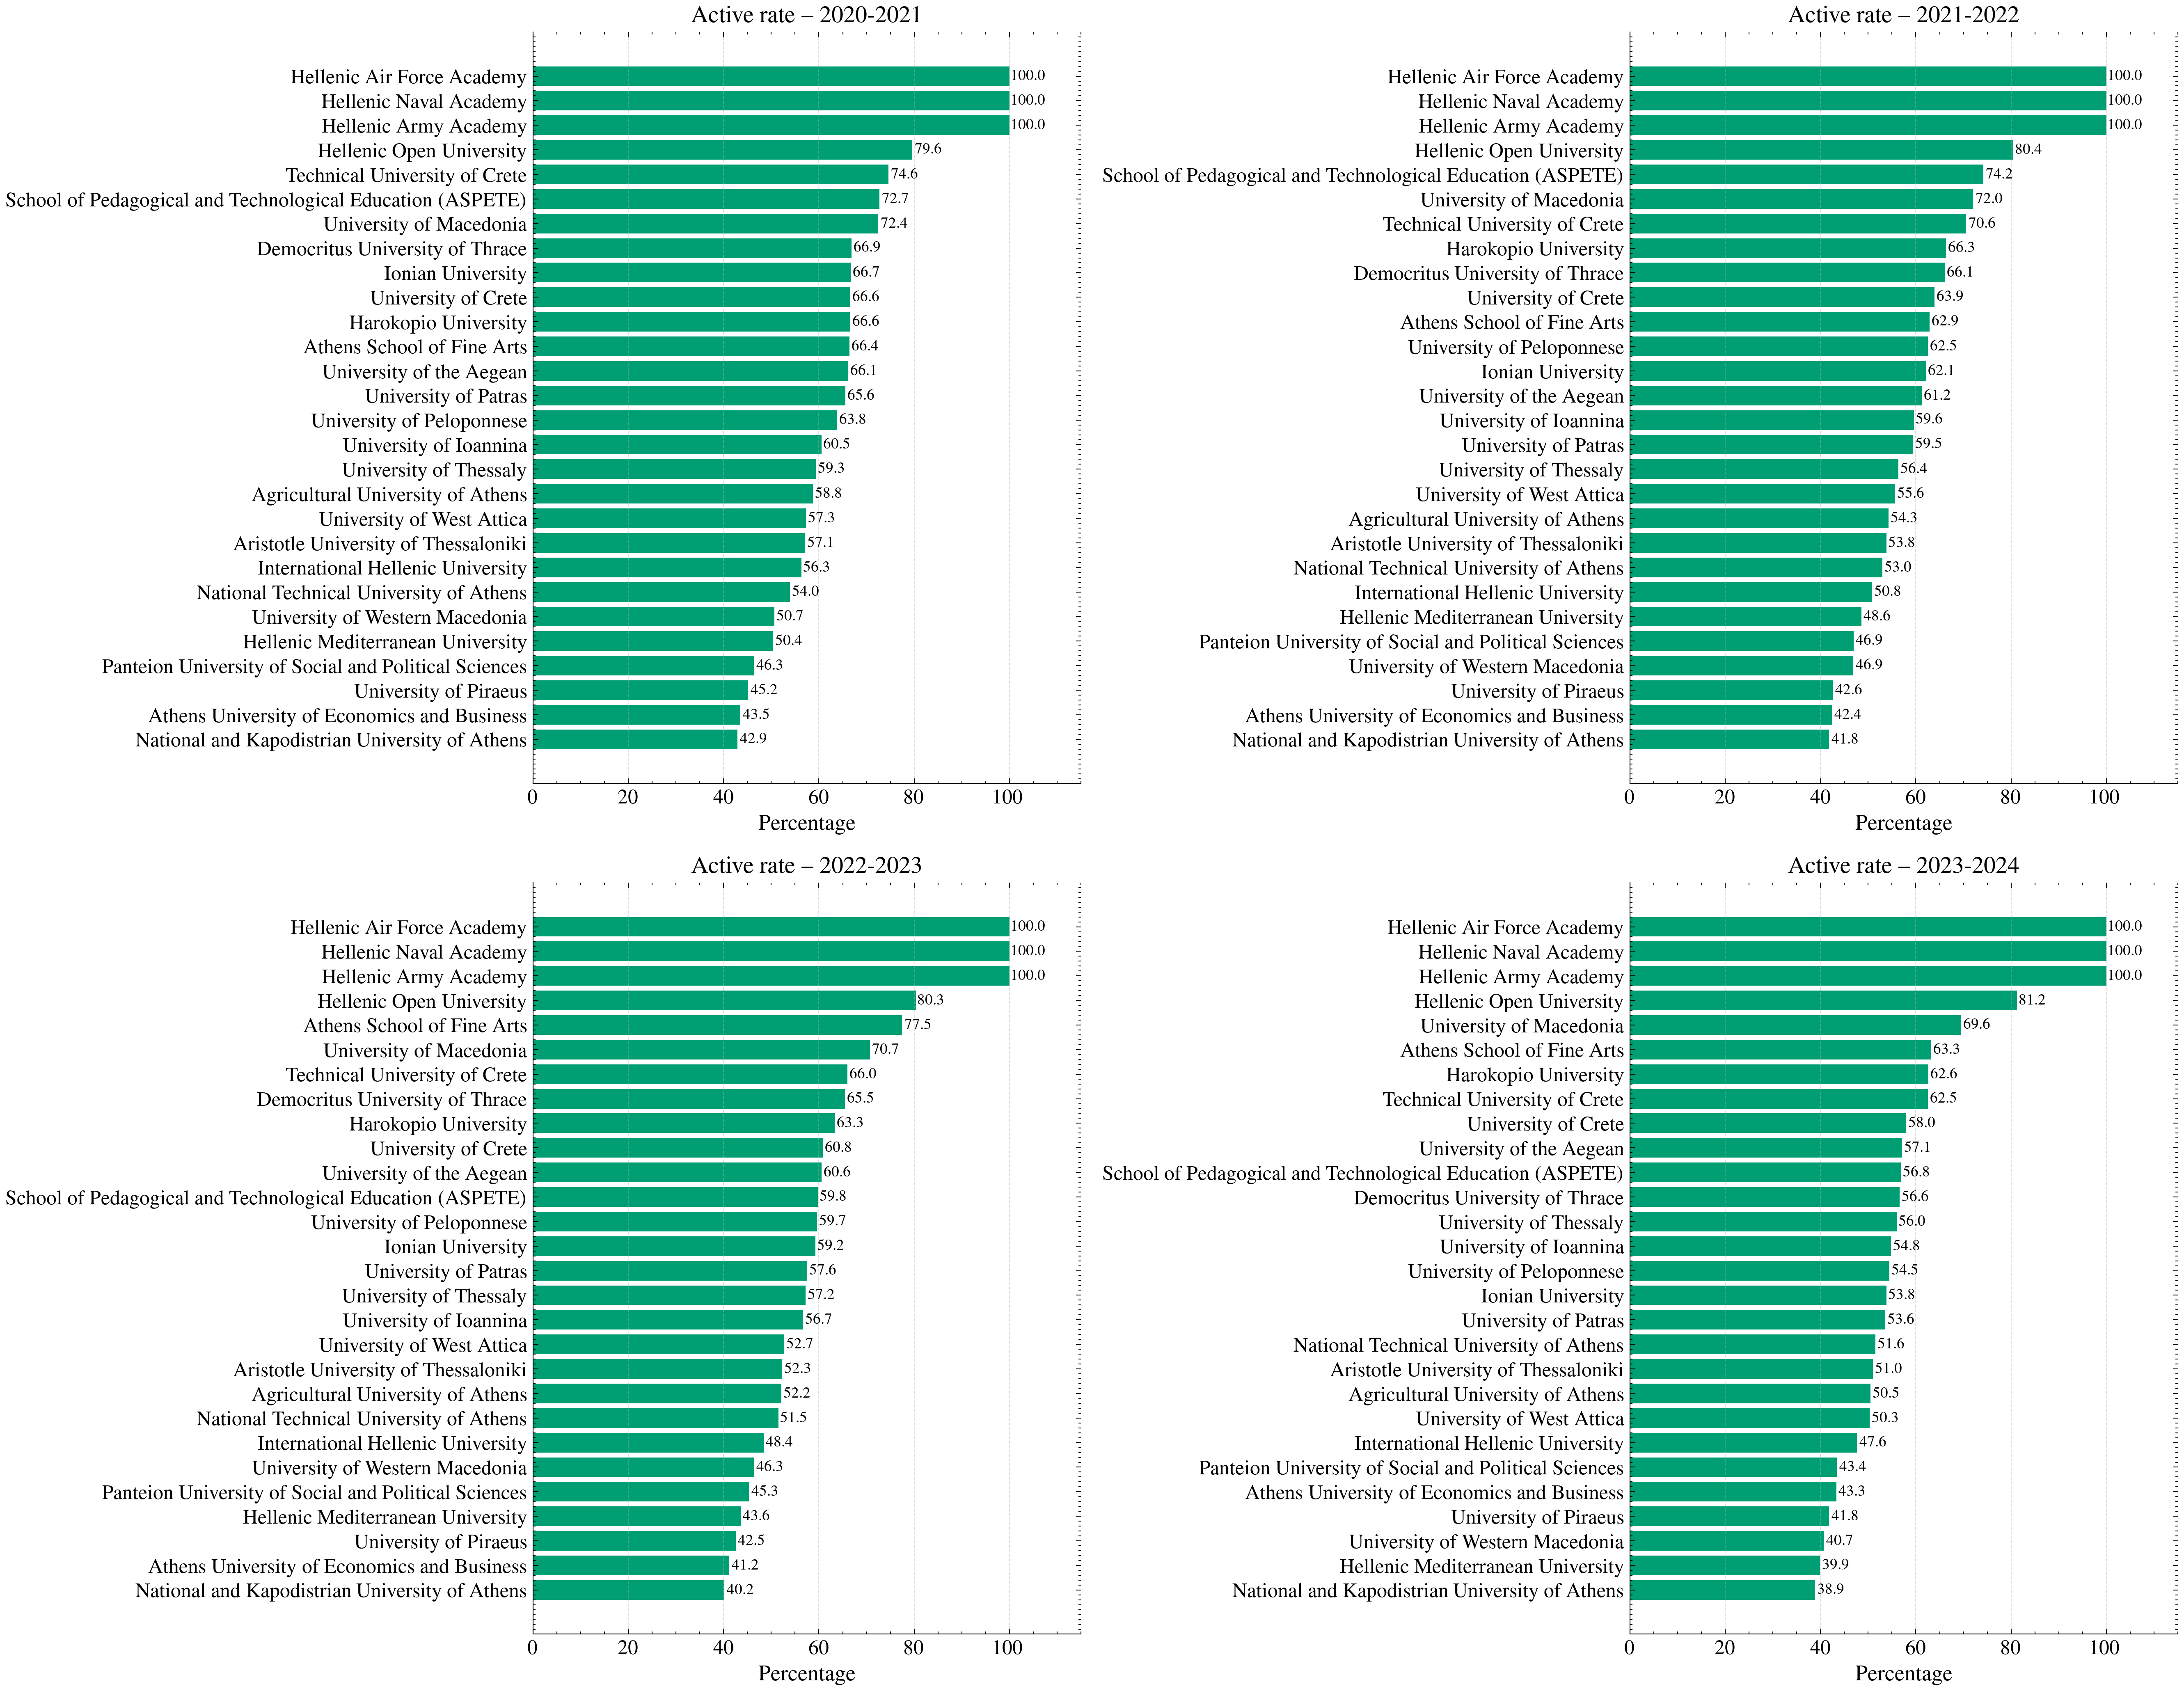

In [27]:
plot_rate_by_year(
    df_grouped_rates, rate_col="graduate_rate", title_prefix="Graduation rate"
)

plot_rate_by_year(
    df_grouped_rates, rate_col="active_rate", title_prefix="Active rate"
)

In [28]:
def compute_overall_rates(df):
    df_overall = df.groupby("academic_year", as_index=False).agg(
        {"graduate": "sum", "registered": "sum", "enrolled": "sum", "active": "sum"}
    )

    df_overall["graduate_rate"] = (df_overall["graduate"] / df_overall["active"]) * 100
    df_overall["active_rate"] = (df_overall["active"] / df_overall["registered"]) * 100

    return df_overall

In [29]:
df_overall = compute_overall_rates(df)
df_overall

academic_year  graduate  registered  enrolled  active  graduate_rate  \
0     2020-2021     56728      707197     91541  400242      14.173425   
1     2021-2022     57377      705318     81012  380830      15.066303   
2     2022-2023     54289      696779     69877  363209      14.947042   
3     2023-2024     55095      703857     68759  352099      15.647588   

   active_rate  
0    56.595546  
1    53.994085  
2    52.126858  
3    50.024224

In [30]:
def plot_sorted_bar_chart(
    df_grouped,
    metric_column,
    output_prefix,
):
    for year in YEARS:
        df_plot = df_grouped[df_grouped["academic_year"] == year].sort_values(
            by=metric_column, ascending=True
        )

        x = np.arange(len(df_plot))
        y = df_plot[metric_column]
        labels = df_plot["institution"]

        fig, ax = plt.subplots(figsize=(10, 10))

        bars = ax.bar(x, y, color=COLORBLIND[2], edgecolor="black", linewidth=0.6)

        # Labels
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45, ha="right")
        ax.set_ylabel("Number of students")
        ax.set_title(
            f"{metric_column.replace('_', ' ').title()} per institution ({year})",
            pad=12,
        )

        # Value annotations
        max_height = y.max()

        for bar in bars:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2

            ax.text(
                x,
                height + 0.5,
                f"{int(height)}",
                ha="center",  # anchor from left edge of text
                va="bottom",
                rotation=45,  # slight left rotation
                # rotation_mode="anchor",
                fontsize=8,
                color="black",
            )

        # Remove chart junk
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.grid(False)

        plt.tight_layout()

        plt.savefig(os.path.join(OUT_DIR, f"{output_prefix}_{year}.pdf"), dpi=300, bbox_inches="tight")
        plt.savefig(os.path.join(OUT_DIR, f"{output_prefix}_{year}.png"), dpi=300, bbox_inches="tight")
        plt.show()

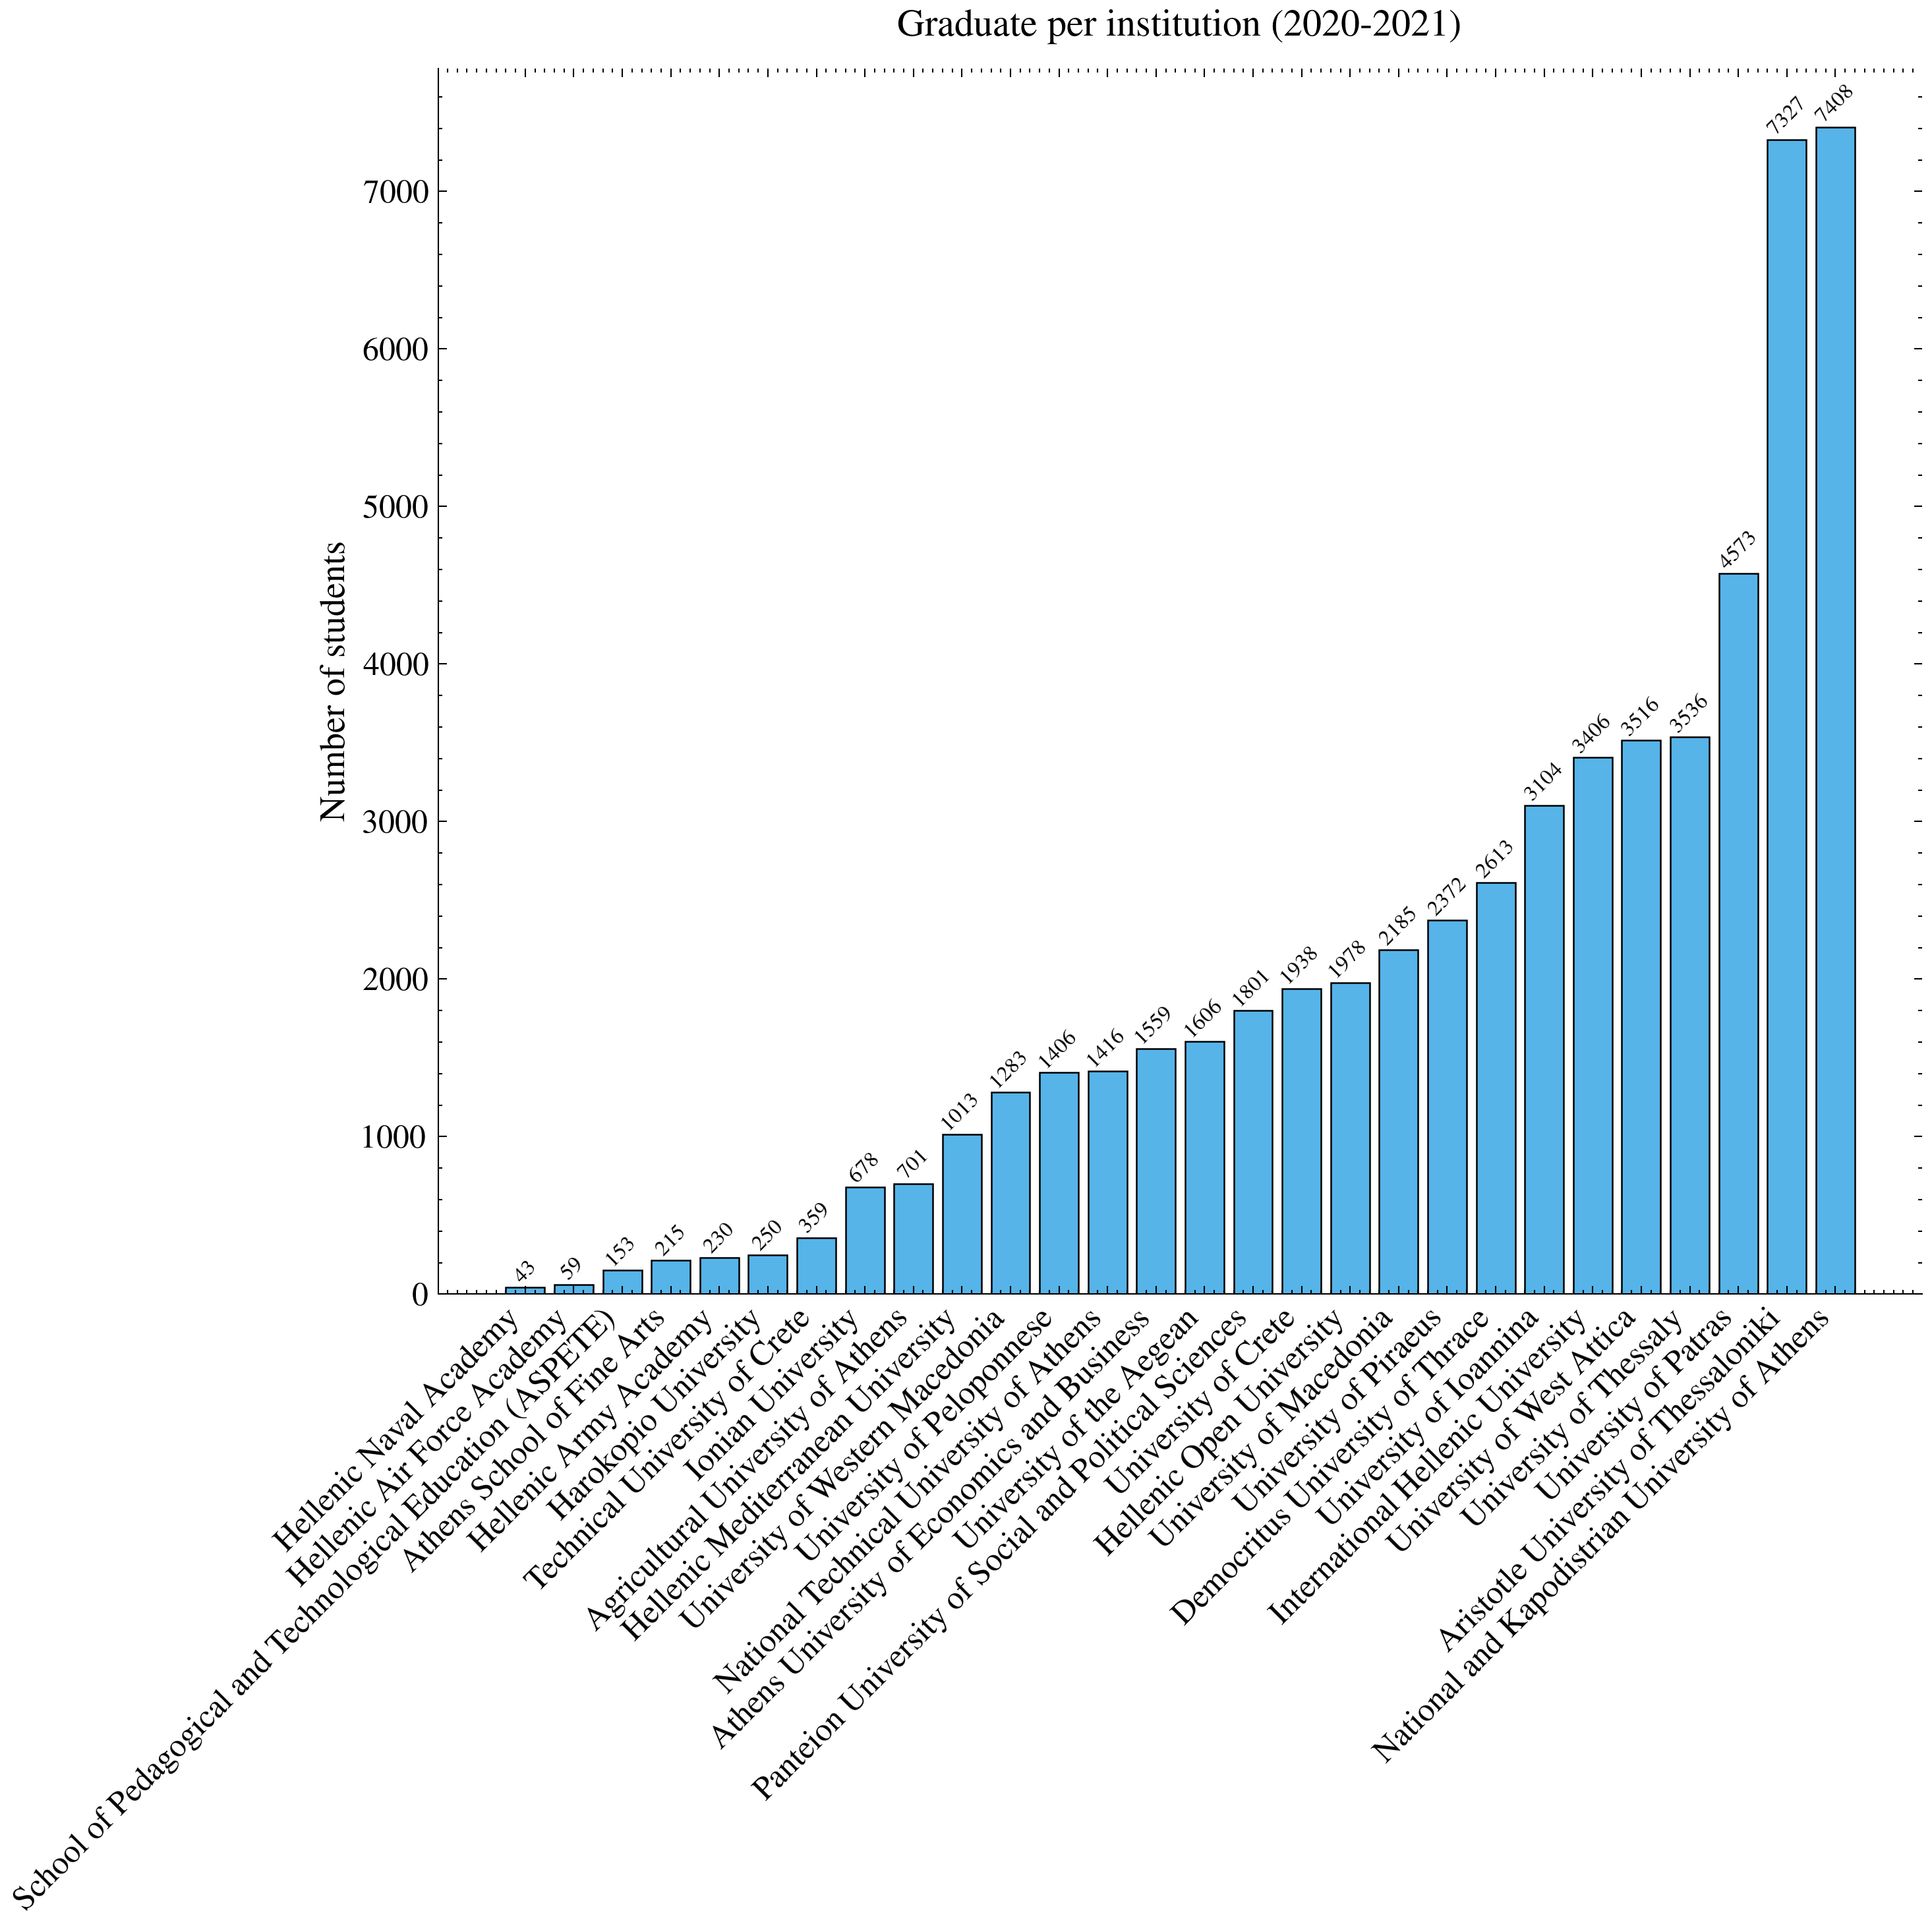

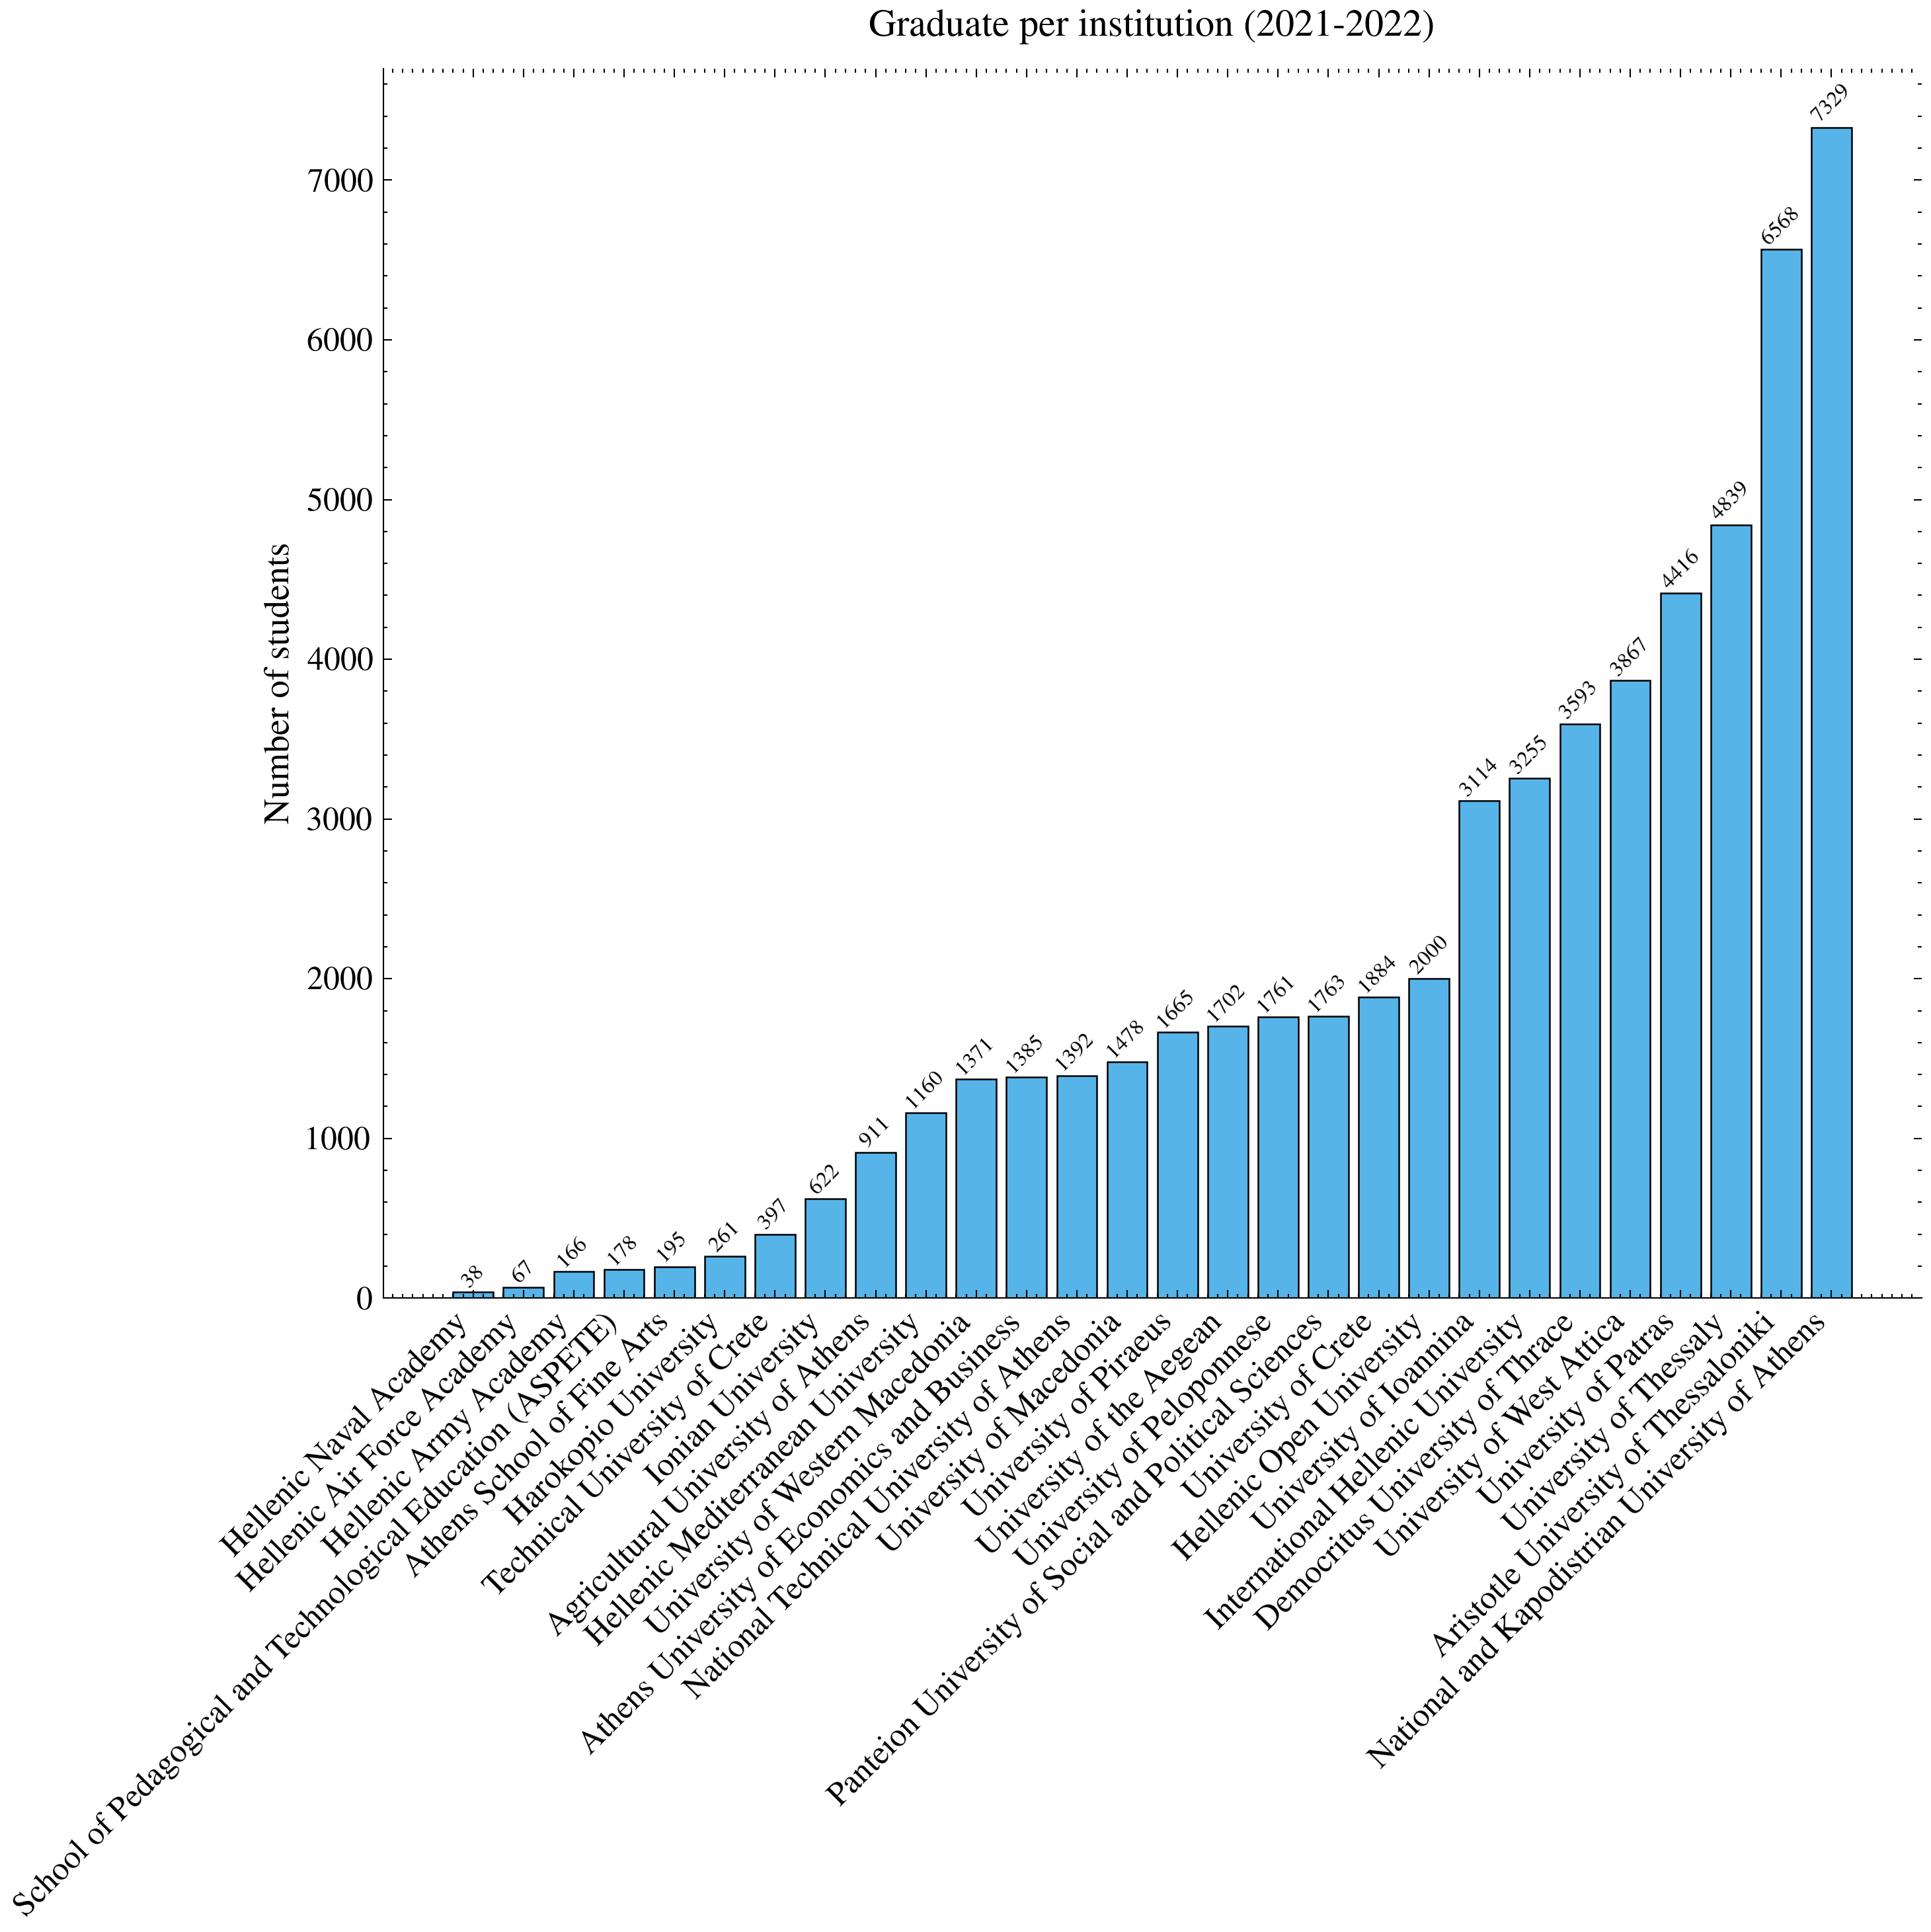

In [ ]:
plot_sorted_bar_chart(
    df_grouped=df_grouped,
    metric_column="graduate",
    output_prefix="graduates_by_institution",
)

In [ ]:
plot_sorted_bar_chart(
    df_grouped=df_grouped,
    metric_column="enrolled",
    output_prefix="enrolled_by_institution",
)

In [ ]:
def compute_graduation_rate(df):
    df_graduation_rate = df.copy()

    df_graduation_rate["graduation_rate"] = np.where(
        df_graduation_rate["active"] > 0,
        (df_graduation_rate["graduate"] / df_graduation_rate["active"]) * 100,
        np.nan,
    )

    df_graduation_rate["graduation_rate"] = df_graduation_rate["graduation_rate"].clip(
        upper=100
    )

    return df_graduation_rate

In [ ]:
df_graduation_rate = compute_graduation_rate(df)
df_graduation_rate

In [ ]:
summary = df_graduation_rate.groupby("institution")["graduation_rate"].agg(
    mean="mean", std=lambda x: np.std(x, ddof=1)
)
print(summary)

In [ ]:
def plot_efficient_frontier(summary):
    markers = ["o", "s", "^", "D", "v", "P", "X", "*", "H", "<", ">", "8"]

    fig, ax = plt.subplots(figsize=(9, 7))  # taller than before

    for i, institution in enumerate(summary.index):
        ax.scatter(
            summary["std"].iloc[i],
            summary["mean"].iloc[i],
            color=COLORBLIND[i % len(COLORBLIND)],
            marker=markers[i % len(markers)],
            s=120,
            edgecolor="black",
            linewidth=0.6,
            label=institution,
            zorder=3,
        )

    # Axis labels (journal-sized)
    ax.set_xlabel("Standard Deviation (Risk)", fontsize=13)
    ax.set_ylabel("Mean Graduation Rate (Return)", fontsize=13)

    # Titles
    ax.set_title("Graduation Rate Efficient Frontier", fontsize=15, pad=10)

    # Remove chart junk
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Improve tick readability
    ax.tick_params(axis="both", labelsize=12)

    # Slight margins for readability
    ax.margins(x=0.08, y=0.12)

    # Legend outside plot
    ax.legend(
        title="Institution",
        fontsize=11,
        title_fontsize=12,
        frameon=False,
        bbox_to_anchor=(1.02, 0.5),
        loc="center left",
    )

    # Layout & export
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, "efficient_frontier.pdf"), dpi=300, bbox_inches="tight")
    plt.savefig(os.path.join(OUT_DIR, "efficient_frontier.png"), dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
plot_efficient_frontier(summary)

In [ ]:
def plot_efficient_frontier(summary: pd.DataFrame):
    """
    Plot the Efficient Frontier for institutions based on mean vs standard deviation.
    """

    # Identify efficient (Pareto-optimal) institutions
    efficient = []
    for i in range(len(summary)):
        dominated = False
        for j in range(len(summary)):
            if (
                summary["mean"].iloc[j] >= summary["mean"].iloc[i]
                and summary["std"].iloc[j] <= summary["std"].iloc[i]
                and (
                    summary["mean"].iloc[j] > summary["mean"].iloc[i]
                    or summary["std"].iloc[j] < summary["std"].iloc[i]
                )
            ):
                dominated = True
                break
        efficient.append(not dominated)

    summary["efficient"] = efficient

    fig, ax = plt.subplots(figsize=(9, 7))

    # Plot all institutions (background)
    ax.scatter(summary["std"], summary["mean"], s=60, label="Non-efficient", zorder=1)

    # Plot efficient institutions
    efficient_summary = summary[summary["efficient"]]
    ax.scatter(
        efficient_summary["std"],
        efficient_summary["mean"],
        color=COLORBLIND[3],
        s=120,
        label="Efficient institutions",
        zorder=2,
    )

    # Annotate efficient institutions
    for inst, row in efficient_summary.iterrows():
        ax.annotate(
            inst,
            (row["std"], row["mean"]),
            textcoords="offset points",
            xytext=(6, 6),
            fontsize=10,
        )

    # Labels and title
    ax.set_xlabel("Standard Deviation (Risk)", fontsize=13)
    ax.set_ylabel("Mean Graduation Rate (Return)", fontsize=13)
    ax.set_title("Graduation Rate Efficient Frontier", fontsize=15, pad=10)

    # Remove top/right spines for cleaner style
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.tick_params(axis="both", labelsize=12)
    ax.margins(x=0.08, y=0.12)

    ax.legend(frameon=False, fontsize=11)

    plt.tight_layout()

    # Save figure if path provided
    plt.savefig(os.path.join(OUT_DIR, f"efficient_frontier_line.pdf"), dpi=300, bbox_inches="tight")
    plt.savefig(os.path.join(OUT_DIR, f"efficient_frontier_line.png"), dpi=300, bbox_inches="tight")

    plt.show()

    return summary

In [ ]:
plot_efficient_frontier(summary)